<a href="https://colab.research.google.com/github/vikas-kr-yadav/currency/blob/main/Final_Year_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install --upgrade --no-cache-dir gdown

In [ ]:
!pip install path

In [ ]:
!pip install tensorflow==2.7

Upload necessart file

In [ ]:
! gdown --id 1I4F2lryXoHRlgEZDTUqiIh2muv5R4iFU

In [ ]:
! gdown --id 1MhlTtY7T08nBQfyHm7PQGS4bNx2wfcv1

In [ ]:
! gdown --id 1f1YDGhEcCtSXP31Fn7T6FWV-CVpWvuvD

Unzip the files

In [8]:
import zipfile
import os
import shutil
with zipfile.ZipFile("Indian currency dataset v1.zip","r") as f:
  f.extractall('.')

In [9]:
import zipfile
import os
import shutil
with zipfile.ZipFile("resnet_weight file.zip","r") as f:
  f.extractall('.')

Import basic essential libraries 

In [11]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import path
import os
%matplotlib inline

Import  keras libraries to build model and conv net

In [12]:
import tensorflow as tf
from tensorflow.python import keras
from tensorflow.python.keras.models import Sequential
from tensorflow.python.keras.layers import Dense,Conv2D,MaxPooling2D,Dropout,Flatten
from pathlib import Path

Current dataset only has 4k images
so image agumentation to virtually increase size of dataset 
help (ImageDataGenerator?)

In [13]:
from tensorflow.python.keras.preprocessing.image import ImageDataGenerator

data_agumentation=ImageDataGenerator(rescale=0./255,
                             shear_range=0.2,
                             zoom_range=0.2,
                             horizontal_flip=True,
                             vertical_flip=True

)


#load dataset and image agumentaion

Load training data


In [14]:
train_data=data_agumentation.flow_from_directory(directory='../content/training/',
                                                 target_size=(256,256),
                                                 class_mode='categorical',
                                                batch_size=32 
                                               )

Found 3566 images belonging to 8 classes.


Load validation data

In [15]:
val_data=ImageDataGenerator().flow_from_directory(directory='../content/validation/',
                                                      target_size=(256,256),
                                                       class_mode='categorical'
                                                      )       

Found 345 images belonging to 8 classes.


Model 
Early stopping and callback
import modelcheckpoint and earlystopping  



In [16]:
from tensorflow.python.keras.callbacks import ModelCheckpoint,EarlyStopping

Checkpoint monitors the given parameter and save the model automatically



Here given parameter to monitor is val_loss


It moniters the  val loss of each epoch and val_loss is lower than previous one it save the current model ad wieght

In [17]:
checkpoint=ModelCheckpoint("/content/currency_detector_2.4GB_earlyStopping_model.h5", monitor='val_loss',verbose=1, save_best_only=True,save_weights_only=False,mode='auto', save_freq=1)

Early stopping .. it stops the trainng phase if there is no improvement in the model. 
Patience defines how many epoch can b ignored before forcefully stoping the model



In [18]:
early = EarlyStopping(monitor='val_loss', min_delta=0, patience=10, verbose=1, mode='auto')

#define model add layers and compile

In [19]:
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, GlobalAveragePooling2D


num_classes = 8
resnet_weights_path = '/resnet50/resnet50_weights_tf_dim_ordering_tf_kernels_notop.h5'


my_new_model = Sequential()
my_new_model.add(ResNet50(include_top=False, pooling='avg', weights=))
my_new_model.add(Dense(num_classes, activation='softmax'))


# Say not to train first layer (ResNet) model. It is already trained
my_new_model.layers[0].trainable = False


In [20]:
my_new_model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

#Fit the model with train and validate dataset

In [21]:
my_new_model.fit(
        train_data,
        epochs = 50,
        validation_data=val_data,
        callbacks=[checkpoint,early])

Epoch 1/50


  1/112 [..............................] - ETA: 29:00 - loss: 8.2874 - accuracy: 0.1875

  2/112 [..............................] - ETA: 15:23 - loss: 10.1058 - accuracy: 0.1562

  3/112 [..............................] - ETA: 15:40 - loss: 9.1444 - accuracy: 0.1562 

  4/112 [>.............................] - ETA: 15:30 - loss: 9.1195 - accuracy: 0.1797

  5/112 [>.............................] - ETA: 15:24 - loss: 10.2164 - accuracy: 0.1625

  6/112 [>.............................] - ETA: 15:14 - loss: 10.1239 - accuracy: 0.1562

  7/112 [>.............................] - ETA: 15:41 - loss: 11.7983 - accuracy: 0.1473

  8/112 [=>............................] - ETA: 15:27 - loss: 12.0434 - accuracy: 0.1484

  9/112 [=>............................] - ETA: 15:14 - loss: 11.6204 - accuracy: 0.1632

 10/112 [=>............................] - ETA: 15:01 - loss: 11.2138 - accuracy: 0.1625

 11/112 [=>............................] - ETA: 14:48 - loss: 11.0622 - accuracy: 0.1562

 12/112 [==>...........................] - ETA: 14:37 - loss: 10.8967 - accuracy: 0.1589

 13/112 [==>...........................] - ETA: 14:25 - loss: 10.5708 - accuracy: 0.1562

 14/112 [==>...........................] - ETA: 14:19 - loss: 10.1519 - accuracy: 0.1540

 15/112 [===>..........................] - ETA: 14:13 - loss: 9.7242 - accuracy: 0.1500 

 16/112 [===>..........................] - ETA: 14:07 - loss: 9.3955 - accuracy: 0.1562

 17/112 [===>..........................] - ETA: 13:57 - loss: 9.2268 - accuracy: 0.1562

 18/112 [===>..........................] - ETA: 13:51 - loss: 9.1656 - accuracy: 0.1493

 19/112 [====>.........................] - ETA: 13:43 - loss: 9.0526 - accuracy: 0.1431

 20/112 [====>.........................] - ETA: 13:35 - loss: 8.8648 - accuracy: 0.1422

 21/112 [====>.........................] - ETA: 13:26 - loss: 8.7027 - accuracy: 0.1354

 22/112 [====>.........................] - ETA: 13:36 - loss: 8.5457 - accuracy: 0.1321

 23/112 [=====>........................] - ETA: 13:49 - loss: 8.3732 - accuracy: 0.1304

 24/112 [=====>........................] - ETA: 13:53 - loss: 8.2014 - accuracy: 0.1315

 25/112 [=====>........................] - ETA: 13:41 - loss: 8.0236 - accuracy: 0.1325

 26/112 [=====>........................] - ETA: 13:31 - loss: 7.8438 - accuracy: 0.1370

 27/112 [======>.......................] - ETA: 13:21 - loss: 7.7192 - accuracy: 0.1400

 28/112 [======>.......................] - ETA: 13:09 - loss: 7.5502 - accuracy: 0.1440

 29/112 [======>.......................] - ETA: 12:57 - loss: 7.3884 - accuracy: 0.1422

 30/112 [=======>......................] - ETA: 12:46 - loss: 7.2660 - accuracy: 0.1417

 31/112 [=======>......................] - ETA: 12:34 - loss: 7.1499 - accuracy: 0.1381

 32/112 [=======>......................] - ETA: 12:23 - loss: 7.0043 - accuracy: 0.1396

 33/112 [=======>......................] - ETA: 12:12 - loss: 6.8849 - accuracy: 0.1411

 34/112 [========>.....................] - ETA: 12:05 - loss: 6.7660 - accuracy: 0.1443

 35/112 [========>.....................] - ETA: 11:58 - loss: 6.6568 - accuracy: 0.1429

 36/112 [========>.....................] - ETA: 11:48 - loss: 6.5664 - accuracy: 0.1441

 37/112 [========>.....................] - ETA: 11:38 - loss: 6.4779 - accuracy: 0.1436

 38/112 [=========>....................] - ETA: 11:26 - loss: 6.3763 - accuracy: 0.1456

 39/112 [=========>....................] - ETA: 11:15 - loss: 6.2842 - accuracy: 0.1458

 40/112 [=========>....................] - ETA: 11:04 - loss: 6.2136 - accuracy: 0.1437

 41/112 [=========>....................] - ETA: 10:54 - loss: 6.1341 - accuracy: 0.1433

 42/112 [==========>...................] - ETA: 10:45 - loss: 6.0574 - accuracy: 0.1429

 43/112 [==========>...................] - ETA: 10:37 - loss: 5.9883 - accuracy: 0.1424

 44/112 [==========>...................] - ETA: 10:30 - loss: 5.9034 - accuracy: 0.1428

 45/112 [===========>..................] - ETA: 10:20 - loss: 5.8341 - accuracy: 0.1437

 46/112 [===========>..................] - ETA: 10:10 - loss: 5.7661 - accuracy: 0.1427

 47/112 [===========>..................] - ETA: 10:00 - loss: 5.7090 - accuracy: 0.1423

 48/112 [===========>..................] - ETA: 9:50 - loss: 5.6322 - accuracy: 0.1465 

 49/112 [============>.................] - ETA: 9:40 - loss: 5.5668 - accuracy: 0.1467

 50/112 [============>.................] - ETA: 9:30 - loss: 5.5005 - accuracy: 0.1456

 51/112 [============>.................] - ETA: 9:20 - loss: 5.4356 - accuracy: 0.1471

 52/112 [============>.................] - ETA: 9:10 - loss: 5.3793 - accuracy: 0.1478

 53/112 [=============>................] - ETA: 9:01 - loss: 5.3261 - accuracy: 0.1462

 54/112 [=============>................] - ETA: 8:51 - loss: 5.2709 - accuracy: 0.1464

 55/112 [=============>................] - ETA: 8:42 - loss: 5.2189 - accuracy: 0.1472

 56/112 [==============>...............] - ETA: 8:31 - loss: 5.1746 - accuracy: 0.1468

 57/112 [==============>...............] - ETA: 8:21 - loss: 5.1304 - accuracy: 0.1469

 58/112 [==============>...............] - ETA: 8:12 - loss: 5.0811 - accuracy: 0.1482

 59/112 [==============>...............] - ETA: 8:02 - loss: 5.0321 - accuracy: 0.1504

 60/112 [===============>..............] - ETA: 7:52 - loss: 4.9957 - accuracy: 0.1490

 61/112 [===============>..............] - ETA: 7:39 - loss: 4.9790 - accuracy: 0.1489

 62/112 [===============>..............] - ETA: 7:30 - loss: 4.9361 - accuracy: 0.1485

 63/112 [===============>..............] - ETA: 7:22 - loss: 4.9000 - accuracy: 0.1476

 64/112 [================>.............] - ETA: 7:12 - loss: 4.8666 - accuracy: 0.1478

 65/112 [================>.............] - ETA: 7:03 - loss: 4.8282 - accuracy: 0.1469

 66/112 [================>.............] - ETA: 6:54 - loss: 4.7890 - accuracy: 0.1476

 67/112 [================>.............] - ETA: 6:46 - loss: 4.7538 - accuracy: 0.1472

 68/112 [=================>............] - ETA: 6:37 - loss: 4.7169 - accuracy: 0.1478

 69/112 [=================>............] - ETA: 6:27 - loss: 4.6956 - accuracy: 0.1466

 70/112 [=================>............] - ETA: 6:18 - loss: 4.6642 - accuracy: 0.1463

 71/112 [==================>...........] - ETA: 6:08 - loss: 4.6291 - accuracy: 0.1486

 72/112 [==================>...........] - ETA: 6:00 - loss: 4.6008 - accuracy: 0.1479

 73/112 [==================>...........] - ETA: 5:50 - loss: 4.5757 - accuracy: 0.1462

 74/112 [==================>...........] - ETA: 5:41 - loss: 4.5546 - accuracy: 0.1455

 75/112 [===================>..........] - ETA: 5:32 - loss: 4.5280 - accuracy: 0.1453

 76/112 [===================>..........] - ETA: 5:23 - loss: 4.4978 - accuracy: 0.1466

 77/112 [===================>..........] - ETA: 5:14 - loss: 4.4793 - accuracy: 0.1464

 78/112 [===================>..........] - ETA: 5:05 - loss: 4.4546 - accuracy: 0.1461

 79/112 [====================>.........] - ETA: 4:55 - loss: 4.4305 - accuracy: 0.1466

 80/112 [====================>.........] - ETA: 4:46 - loss: 4.4096 - accuracy: 0.1463

 81/112 [====================>.........] - ETA: 4:37 - loss: 4.3864 - accuracy: 0.1472

 82/112 [====================>.........] - ETA: 4:28 - loss: 4.3610 - accuracy: 0.1474

 83/112 [=====================>........] - ETA: 4:19 - loss: 4.3388 - accuracy: 0.1482

 84/112 [=====================>........] - ETA: 4:10 - loss: 4.3214 - accuracy: 0.1468

 85/112 [=====================>........] - ETA: 4:01 - loss: 4.3020 - accuracy: 0.1466

 86/112 [======================>.......] - ETA: 3:52 - loss: 4.2816 - accuracy: 0.1474

 87/112 [======================>.......] - ETA: 3:43 - loss: 4.2586 - accuracy: 0.1497

 88/112 [======================>.......] - ETA: 3:34 - loss: 4.2350 - accuracy: 0.1497

 89/112 [======================>.......] - ETA: 3:25 - loss: 4.2143 - accuracy: 0.1495

 90/112 [=======================>......] - ETA: 3:16 - loss: 4.1915 - accuracy: 0.1506

 91/112 [=======================>......] - ETA: 3:08 - loss: 4.1675 - accuracy: 0.1520

 92/112 [=======================>......] - ETA: 2:59 - loss: 4.1488 - accuracy: 0.1521

 93/112 [=======================>......] - ETA: 2:50 - loss: 4.1328 - accuracy: 0.1521

 94/112 [========================>.....] - ETA: 2:41 - loss: 4.1123 - accuracy: 0.1542

 95/112 [========================>.....] - ETA: 2:32 - loss: 4.0919 - accuracy: 0.1542

 96/112 [========================>.....] - ETA: 2:23 - loss: 4.0733 - accuracy: 0.1532

 97/112 [========================>.....] - ETA: 2:14 - loss: 4.0564 - accuracy: 0.1526

 98/112 [=========================>....] - ETA: 2:05 - loss: 4.0395 - accuracy: 0.1520

 99/112 [=========================>....] - ETA: 1:56 - loss: 4.0217 - accuracy: 0.1521

100/112 [=========================>....] - ETA: 1:47 - loss: 4.0042 - accuracy: 0.1524

101/112 [==========================>...] - ETA: 1:38 - loss: 3.9888 - accuracy: 0.1534

102/112 [==========================>...] - ETA: 1:29 - loss: 3.9737 - accuracy: 0.1543

103/112 [==========================>...] - ETA: 1:20 - loss: 3.9631 - accuracy: 0.1544

104/112 [==========================>...] - ETA: 1:11 - loss: 3.9432 - accuracy: 0.1550

105/112 [===========================>..] - ETA: 1:02 - loss: 3.9332 - accuracy: 0.1544

106/112 [===========================>..] - ETA: 53s - loss: 3.9195 - accuracy: 0.1547 

107/112 [===========================>..] - ETA: 44s - loss: 3.9088 - accuracy: 0.1550

108/112 [===========================>..] - ETA: 35s - loss: 3.8975 - accuracy: 0.1553

109/112 [============================>.] - ETA: 26s - loss: 3.8854 - accuracy: 0.1548

110/112 [============================>.] - ETA: 17s - loss: 3.8714 - accuracy: 0.1539

111/112 [============================>.] - ETA: 8s - loss: 3.8556 - accuracy: 0.1551 

112/112 [==============================] - ETA: 0s - loss: 3.8428 - accuracy: 0.1568

/usr/local/lib/python3.8/dist-packages/PIL/TiffImagePlugin.py:788: UserWarning: Corrupt EXIF data.  Expecting to read 4 bytes but only got 0. 
  warnings.warn(str(msg))


112/112 [==============================] - 1105s 10s/step - loss: 3.8428 - accuracy: 0.1568 - val_loss: 2.2982 - val_accuracy: 0.2493
Epoch 2/50


  1/112 [..............................] - ETA: 20:18 - loss: 2.5304 - accuracy: 0.2500

  2/112 [..............................] - ETA: 16:11 - loss: 2.3184 - accuracy: 0.2188

  3/112 [..............................] - ETA: 15:50 - loss: 2.2969 - accuracy: 0.1979

  4/112 [>.............................] - ETA: 15:41 - loss: 2.2932 - accuracy: 0.1953

  5/112 [>.............................] - ETA: 15:55 - loss: 2.3352 - accuracy: 0.1813

  6/112 [>.............................] - ETA: 15:48 - loss: 2.2819 - accuracy: 0.2083

  7/112 [>.............................] - ETA: 15:32 - loss: 2.2933 - accuracy: 0.2188

  8/112 [=>............................] - ETA: 15:15 - loss: 2.3020 - accuracy: 0.2148

  9/112 [=>............................] - ETA: 15:02 - loss: 2.2886 - accuracy: 0.2083

 10/112 [=>............................] - ETA: 14:57 - loss: 2.3198 - accuracy: 0.2094

 11/112 [=>............................] - ETA: 14:45 - loss: 2.3294 - accuracy: 0.2131

 12/112 [==>...........................] - ETA: 14:36 - loss: 2.3781 - accuracy: 0.2135

 13/112 [==>...........................] - ETA: 14:48 - loss: 2.4305 - accuracy: 0.2163

 14/112 [==>...........................] - ETA: 14:40 - loss: 2.4790 - accuracy: 0.2098

 15/112 [===>..........................] - ETA: 14:31 - loss: 2.4757 - accuracy: 0.2083

 16/112 [===>..........................] - ETA: 14:18 - loss: 2.4939 - accuracy: 0.2070

 17/112 [===>..........................] - ETA: 14:09 - loss: 2.5721 - accuracy: 0.2004

 18/112 [===>..........................] - ETA: 13:59 - loss: 2.6233 - accuracy: 0.1927

 19/112 [====>.........................] - ETA: 13:53 - loss: 2.5990 - accuracy: 0.1957

 20/112 [====>.........................] - ETA: 13:41 - loss: 2.6343 - accuracy: 0.1922

 21/112 [====>.........................] - ETA: 13:31 - loss: 2.6789 - accuracy: 0.1905

 22/112 [====>.........................] - ETA: 13:21 - loss: 2.7399 - accuracy: 0.1889

 23/112 [=====>........................] - ETA: 13:12 - loss: 2.7849 - accuracy: 0.1861

 24/112 [=====>........................] - ETA: 13:02 - loss: 2.7850 - accuracy: 0.1836

 25/112 [=====>........................] - ETA: 12:53 - loss: 2.7977 - accuracy: 0.1850

 26/112 [=====>........................] - ETA: 12:44 - loss: 2.7886 - accuracy: 0.1851

 27/112 [======>.......................] - ETA: 12:33 - loss: 2.7832 - accuracy: 0.1806

 28/112 [======>.......................] - ETA: 12:25 - loss: 2.8013 - accuracy: 0.1797

 29/112 [======>.......................] - ETA: 12:15 - loss: 2.8077 - accuracy: 0.1756

 30/112 [=======>......................] - ETA: 12:06 - loss: 2.7931 - accuracy: 0.1771

 31/112 [=======>......................] - ETA: 11:54 - loss: 2.7838 - accuracy: 0.1754

 32/112 [=======>......................] - ETA: 11:34 - loss: 2.7796 - accuracy: 0.1750

 33/112 [=======>......................] - ETA: 11:25 - loss: 2.7713 - accuracy: 0.1724

 34/112 [========>.....................] - ETA: 11:17 - loss: 2.7868 - accuracy: 0.1720

 35/112 [========>.....................] - ETA: 11:08 - loss: 2.8002 - accuracy: 0.1679

 36/112 [========>.....................] - ETA: 11:06 - loss: 2.7940 - accuracy: 0.1675

 37/112 [========>.....................] - ETA: 10:58 - loss: 2.7854 - accuracy: 0.1681

 38/112 [=========>....................] - ETA: 10:50 - loss: 2.7786 - accuracy: 0.1669

 39/112 [=========>....................] - ETA: 10:40 - loss: 2.7786 - accuracy: 0.1634

 40/112 [=========>....................] - ETA: 10:32 - loss: 2.7606 - accuracy: 0.1648

 41/112 [=========>....................] - ETA: 10:22 - loss: 2.7600 - accuracy: 0.1631

 42/112 [==========>...................] - ETA: 10:15 - loss: 2.7584 - accuracy: 0.1644

 43/112 [==========>...................] - ETA: 10:07 - loss: 2.7359 - accuracy: 0.1664

 44/112 [==========>...................] - ETA: 9:58 - loss: 2.7272 - accuracy: 0.1669 

 45/112 [===========>..................] - ETA: 9:49 - loss: 2.7135 - accuracy: 0.1681

 46/112 [===========>..................] - ETA: 9:40 - loss: 2.6977 - accuracy: 0.1699

 47/112 [===========>..................] - ETA: 9:31 - loss: 2.6813 - accuracy: 0.1723

 48/112 [===========>..................] - ETA: 9:22 - loss: 2.6872 - accuracy: 0.1700

 49/112 [============>.................] - ETA: 9:14 - loss: 2.6735 - accuracy: 0.1723

 50/112 [============>.................] - ETA: 9:04 - loss: 2.6611 - accuracy: 0.1738

 51/112 [============>.................] - ETA: 8:58 - loss: 2.6601 - accuracy: 0.1741

 52/112 [============>.................] - ETA: 8:49 - loss: 2.6515 - accuracy: 0.1774

 53/112 [=============>................] - ETA: 8:40 - loss: 2.6496 - accuracy: 0.1776

 54/112 [=============>................] - ETA: 8:30 - loss: 2.6404 - accuracy: 0.1795

 55/112 [=============>................] - ETA: 8:22 - loss: 2.6314 - accuracy: 0.1797

 56/112 [==============>...............] - ETA: 8:13 - loss: 2.6250 - accuracy: 0.1815

 57/112 [==============>...............] - ETA: 8:06 - loss: 2.6149 - accuracy: 0.1822

 58/112 [==============>...............] - ETA: 8:00 - loss: 2.6069 - accuracy: 0.1823

 59/112 [==============>...............] - ETA: 7:50 - loss: 2.5944 - accuracy: 0.1845

 60/112 [===============>..............] - ETA: 7:42 - loss: 2.5867 - accuracy: 0.1861

 61/112 [===============>..............] - ETA: 7:32 - loss: 2.5800 - accuracy: 0.1872

 62/112 [===============>..............] - ETA: 7:24 - loss: 2.5799 - accuracy: 0.1857

 63/112 [===============>..............] - ETA: 7:15 - loss: 2.5740 - accuracy: 0.1852

 64/112 [================>.............] - ETA: 7:06 - loss: 2.5657 - accuracy: 0.1857

 65/112 [================>.............] - ETA: 6:57 - loss: 2.5657 - accuracy: 0.1857

 66/112 [================>.............] - ETA: 6:48 - loss: 2.5585 - accuracy: 0.1877

 67/112 [================>.............] - ETA: 6:39 - loss: 2.5535 - accuracy: 0.1863

 68/112 [=================>............] - ETA: 6:30 - loss: 2.5454 - accuracy: 0.1858

 69/112 [=================>............] - ETA: 6:22 - loss: 2.5373 - accuracy: 0.1858

 70/112 [=================>............] - ETA: 6:13 - loss: 2.5322 - accuracy: 0.1854

 71/112 [==================>...........] - ETA: 6:04 - loss: 2.5280 - accuracy: 0.1863

 72/112 [==================>...........] - ETA: 5:55 - loss: 2.5210 - accuracy: 0.1855

 73/112 [==================>...........] - ETA: 5:46 - loss: 2.5233 - accuracy: 0.1846

 74/112 [==================>...........] - ETA: 5:37 - loss: 2.5175 - accuracy: 0.1872

 75/112 [===================>..........] - ETA: 5:29 - loss: 2.5181 - accuracy: 0.1877

 76/112 [===================>..........] - ETA: 5:20 - loss: 2.5174 - accuracy: 0.1860

 77/112 [===================>..........] - ETA: 5:10 - loss: 2.5154 - accuracy: 0.1881

 78/112 [===================>..........] - ETA: 5:01 - loss: 2.5207 - accuracy: 0.1877

 79/112 [====================>.........] - ETA: 4:53 - loss: 2.5168 - accuracy: 0.1876

 80/112 [====================>.........] - ETA: 4:44 - loss: 2.5148 - accuracy: 0.1876

 81/112 [====================>.........] - ETA: 4:35 - loss: 2.5210 - accuracy: 0.1865

 82/112 [====================>.........] - ETA: 4:27 - loss: 2.5173 - accuracy: 0.1865

 83/112 [=====================>........] - ETA: 4:18 - loss: 2.5281 - accuracy: 0.1857

 84/112 [=====================>........] - ETA: 4:09 - loss: 2.5315 - accuracy: 0.1850

 85/112 [=====================>........] - ETA: 4:00 - loss: 2.5302 - accuracy: 0.1843

 86/112 [======================>.......] - ETA: 3:51 - loss: 2.5399 - accuracy: 0.1829

 87/112 [======================>.......] - ETA: 3:42 - loss: 2.5375 - accuracy: 0.1840

 88/112 [======================>.......] - ETA: 3:33 - loss: 2.5486 - accuracy: 0.1833

 89/112 [======================>.......] - ETA: 3:24 - loss: 2.5561 - accuracy: 0.1830

 90/112 [=======================>......] - ETA: 3:15 - loss: 2.5584 - accuracy: 0.1827

 91/112 [=======================>......] - ETA: 3:06 - loss: 2.5585 - accuracy: 0.1818

 92/112 [=======================>......] - ETA: 2:57 - loss: 2.5596 - accuracy: 0.1815

 93/112 [=======================>......] - ETA: 2:48 - loss: 2.5590 - accuracy: 0.1822

 94/112 [========================>.....] - ETA: 2:39 - loss: 2.5645 - accuracy: 0.1803

 95/112 [========================>.....] - ETA: 2:30 - loss: 2.5607 - accuracy: 0.1813

 96/112 [========================>.....] - ETA: 2:21 - loss: 2.5587 - accuracy: 0.1814

 97/112 [========================>.....] - ETA: 2:13 - loss: 2.5589 - accuracy: 0.1821

 98/112 [=========================>....] - ETA: 2:04 - loss: 2.5569 - accuracy: 0.1818

 99/112 [=========================>....] - ETA: 1:55 - loss: 2.5610 - accuracy: 0.1813

100/112 [=========================>....] - ETA: 1:46 - loss: 2.5593 - accuracy: 0.1816

101/112 [==========================>...] - ETA: 1:37 - loss: 2.5522 - accuracy: 0.1823

102/112 [==========================>...] - ETA: 1:28 - loss: 2.5479 - accuracy: 0.1818

103/112 [==========================>...] - ETA: 1:20 - loss: 2.5427 - accuracy: 0.1827

104/112 [==========================>...] - ETA: 1:11 - loss: 2.5490 - accuracy: 0.1840

105/112 [===========================>..] - ETA: 1:02 - loss: 2.5455 - accuracy: 0.1846

106/112 [===========================>..] - ETA: 53s - loss: 2.5459 - accuracy: 0.1855 

107/112 [===========================>..] - ETA: 44s - loss: 2.5438 - accuracy: 0.1850

108/112 [===========================>..] - ETA: 35s - loss: 2.5435 - accuracy: 0.1844

109/112 [============================>.] - ETA: 26s - loss: 2.5435 - accuracy: 0.1839

110/112 [============================>.] - ETA: 17s - loss: 2.5425 - accuracy: 0.1845

111/112 [============================>.] - ETA: 8s - loss: 2.5454 - accuracy: 0.1836 

112/112 [==============================] - 1090s 10s/step - loss: 2.5483 - accuracy: 0.1831 - val_loss: 2.9424 - val_accuracy: 0.1449
Epoch 3/50


  1/112 [..............................] - ETA: 23:02 - loss: 2.9094 - accuracy: 0.0938

  2/112 [..............................] - ETA: 15:20 - loss: 2.5300 - accuracy: 0.1094

  3/112 [..............................] - ETA: 15:43 - loss: 2.4021 - accuracy: 0.1146

  4/112 [>.............................] - ETA: 15:31 - loss: 2.5670 - accuracy: 0.1484

  5/112 [>.............................] - ETA: 15:31 - loss: 2.6503 - accuracy: 0.1375

  6/112 [>.............................] - ETA: 15:23 - loss: 2.6665 - accuracy: 0.1562

  7/112 [>.............................] - ETA: 15:21 - loss: 2.5759 - accuracy: 0.1652

  8/112 [=>............................] - ETA: 15:15 - loss: 2.6721 - accuracy: 0.1602

  9/112 [=>............................] - ETA: 15:03 - loss: 2.6312 - accuracy: 0.1597

 10/112 [=>............................] - ETA: 14:49 - loss: 2.6578 - accuracy: 0.1531

 11/112 [=>............................] - ETA: 14:34 - loss: 2.5889 - accuracy: 0.1733

 12/112 [==>...........................] - ETA: 14:29 - loss: 2.6215 - accuracy: 0.1719

 13/112 [==>...........................] - ETA: 14:22 - loss: 2.5928 - accuracy: 0.1851

 14/112 [==>...........................] - ETA: 14:09 - loss: 2.5869 - accuracy: 0.1830

 15/112 [===>..........................] - ETA: 13:59 - loss: 2.5978 - accuracy: 0.1833

 16/112 [===>..........................] - ETA: 13:51 - loss: 2.5604 - accuracy: 0.1875

 17/112 [===>..........................] - ETA: 13:42 - loss: 2.5635 - accuracy: 0.1949

 18/112 [===>..........................] - ETA: 13:29 - loss: 2.5543 - accuracy: 0.1979

 19/112 [====>.........................] - ETA: 13:21 - loss: 2.5633 - accuracy: 0.1924

 20/112 [====>.........................] - ETA: 13:22 - loss: 2.5491 - accuracy: 0.2000

 21/112 [====>.........................] - ETA: 13:17 - loss: 2.5274 - accuracy: 0.2009

 22/112 [====>.........................] - ETA: 12:50 - loss: 2.5224 - accuracy: 0.2012

 23/112 [=====>........................] - ETA: 12:46 - loss: 2.5231 - accuracy: 0.1964

 24/112 [=====>........................] - ETA: 12:37 - loss: 2.5016 - accuracy: 0.1973

 25/112 [=====>........................] - ETA: 12:27 - loss: 2.4859 - accuracy: 0.1995

 26/112 [=====>........................] - ETA: 12:18 - loss: 2.4787 - accuracy: 0.2002

 27/112 [======>.......................] - ETA: 12:10 - loss: 2.4670 - accuracy: 0.2045

 28/112 [======>.......................] - ETA: 12:02 - loss: 2.4584 - accuracy: 0.2096

 29/112 [======>.......................] - ETA: 11:55 - loss: 2.4746 - accuracy: 0.2055

 30/112 [=======>......................] - ETA: 11:47 - loss: 2.4555 - accuracy: 0.2081

 31/112 [=======>......................] - ETA: 11:38 - loss: 2.4400 - accuracy: 0.2064

 32/112 [=======>......................] - ETA: 11:31 - loss: 2.4226 - accuracy: 0.2117

 33/112 [=======>......................] - ETA: 11:22 - loss: 2.4078 - accuracy: 0.2139

 34/112 [========>.....................] - ETA: 11:13 - loss: 2.4022 - accuracy: 0.2187

 35/112 [========>.....................] - ETA: 11:04 - loss: 2.3997 - accuracy: 0.2169

 36/112 [========>.....................] - ETA: 10:55 - loss: 2.3962 - accuracy: 0.2178

 37/112 [========>.....................] - ETA: 10:47 - loss: 2.4027 - accuracy: 0.2161

 38/112 [=========>....................] - ETA: 10:41 - loss: 2.4054 - accuracy: 0.2154

 39/112 [=========>....................] - ETA: 10:32 - loss: 2.4121 - accuracy: 0.2114

 40/112 [=========>....................] - ETA: 10:25 - loss: 2.4117 - accuracy: 0.2084

 41/112 [=========>....................] - ETA: 10:22 - loss: 2.4095 - accuracy: 0.2094

 42/112 [==========>...................] - ETA: 10:13 - loss: 2.4144 - accuracy: 0.2112

 43/112 [==========>...................] - ETA: 10:05 - loss: 2.4039 - accuracy: 0.2106

 44/112 [==========>...................] - ETA: 9:58 - loss: 2.4061 - accuracy: 0.2108 

 45/112 [===========>..................] - ETA: 9:49 - loss: 2.4098 - accuracy: 0.2075

 46/112 [===========>..................] - ETA: 9:39 - loss: 2.4143 - accuracy: 0.2077

 47/112 [===========>..................] - ETA: 9:31 - loss: 2.4066 - accuracy: 0.2059

 48/112 [===========>..................] - ETA: 9:22 - loss: 2.4024 - accuracy: 0.2062

 49/112 [============>.................] - ETA: 9:12 - loss: 2.4150 - accuracy: 0.2071

 50/112 [============>.................] - ETA: 9:03 - loss: 2.4266 - accuracy: 0.2080

 51/112 [============>.................] - ETA: 8:55 - loss: 2.4291 - accuracy: 0.2051

 52/112 [============>.................] - ETA: 8:47 - loss: 2.4213 - accuracy: 0.2035

 53/112 [=============>................] - ETA: 8:37 - loss: 2.4219 - accuracy: 0.2014

 54/112 [=============>................] - ETA: 8:28 - loss: 2.4196 - accuracy: 0.2023

 55/112 [=============>................] - ETA: 8:20 - loss: 2.4252 - accuracy: 0.2009

 56/112 [==============>...............] - ETA: 8:11 - loss: 2.4227 - accuracy: 0.2007

 57/112 [==============>...............] - ETA: 8:03 - loss: 2.4119 - accuracy: 0.2060

 58/112 [==============>...............] - ETA: 7:54 - loss: 2.4180 - accuracy: 0.2067

 59/112 [==============>...............] - ETA: 7:45 - loss: 2.4170 - accuracy: 0.2053

 60/112 [===============>..............] - ETA: 7:36 - loss: 2.4289 - accuracy: 0.2050

 61/112 [===============>..............] - ETA: 7:30 - loss: 2.4459 - accuracy: 0.2048

 62/112 [===============>..............] - ETA: 7:21 - loss: 2.4451 - accuracy: 0.2050

 63/112 [===============>..............] - ETA: 7:13 - loss: 2.4487 - accuracy: 0.2042

 64/112 [================>.............] - ETA: 7:07 - loss: 2.4510 - accuracy: 0.2025

 65/112 [================>.............] - ETA: 6:58 - loss: 2.4425 - accuracy: 0.2032

 66/112 [================>.............] - ETA: 6:49 - loss: 2.4426 - accuracy: 0.2030

 67/112 [================>.............] - ETA: 6:41 - loss: 2.4341 - accuracy: 0.2046

 68/112 [=================>............] - ETA: 6:31 - loss: 2.4357 - accuracy: 0.2053

 69/112 [=================>............] - ETA: 6:22 - loss: 2.4453 - accuracy: 0.2059

 70/112 [=================>............] - ETA: 6:13 - loss: 2.4451 - accuracy: 0.2070

 71/112 [==================>...........] - ETA: 6:04 - loss: 2.4432 - accuracy: 0.2063

 72/112 [==================>...........] - ETA: 5:55 - loss: 2.4361 - accuracy: 0.2087

 73/112 [==================>...........] - ETA: 5:46 - loss: 2.4339 - accuracy: 0.2075

 74/112 [==================>...........] - ETA: 5:38 - loss: 2.4324 - accuracy: 0.2064

 75/112 [===================>..........] - ETA: 5:29 - loss: 2.4257 - accuracy: 0.2061

 76/112 [===================>..........] - ETA: 5:20 - loss: 2.4182 - accuracy: 0.2088

 77/112 [===================>..........] - ETA: 5:11 - loss: 2.4257 - accuracy: 0.2077

 78/112 [===================>..........] - ETA: 5:02 - loss: 2.4239 - accuracy: 0.2103

 79/112 [====================>.........] - ETA: 4:53 - loss: 2.4289 - accuracy: 0.2104

 80/112 [====================>.........] - ETA: 4:44 - loss: 2.4257 - accuracy: 0.2109

 81/112 [====================>.........] - ETA: 4:36 - loss: 2.4258 - accuracy: 0.2098

 82/112 [====================>.........] - ETA: 4:27 - loss: 2.4289 - accuracy: 0.2084

 83/112 [=====================>........] - ETA: 4:18 - loss: 2.4211 - accuracy: 0.2100

 84/112 [=====================>........] - ETA: 4:09 - loss: 2.4118 - accuracy: 0.2127

 85/112 [=====================>........] - ETA: 4:00 - loss: 2.4159 - accuracy: 0.2135

 86/112 [======================>.......] - ETA: 3:51 - loss: 2.4208 - accuracy: 0.2147

 87/112 [======================>.......] - ETA: 3:42 - loss: 2.4230 - accuracy: 0.2158

 88/112 [======================>.......] - ETA: 3:33 - loss: 2.4212 - accuracy: 0.2155

 89/112 [======================>.......] - ETA: 3:24 - loss: 2.4158 - accuracy: 0.2184

 90/112 [=======================>......] - ETA: 3:15 - loss: 2.4155 - accuracy: 0.2194

 91/112 [=======================>......] - ETA: 3:06 - loss: 2.4138 - accuracy: 0.2222

 92/112 [=======================>......] - ETA: 2:57 - loss: 2.4130 - accuracy: 0.2225

 93/112 [=======================>......] - ETA: 2:48 - loss: 2.4125 - accuracy: 0.2224

 94/112 [========================>.....] - ETA: 2:40 - loss: 2.4133 - accuracy: 0.2224

 95/112 [========================>.....] - ETA: 2:31 - loss: 2.4096 - accuracy: 0.2220

 96/112 [========================>.....] - ETA: 2:22 - loss: 2.4120 - accuracy: 0.2213

 97/112 [========================>.....] - ETA: 2:14 - loss: 2.4097 - accuracy: 0.2229

 98/112 [=========================>....] - ETA: 2:05 - loss: 2.4168 - accuracy: 0.2235

 99/112 [=========================>....] - ETA: 1:56 - loss: 2.4143 - accuracy: 0.2238

100/112 [=========================>....] - ETA: 1:47 - loss: 2.4141 - accuracy: 0.2225

101/112 [==========================>...] - ETA: 1:38 - loss: 2.4138 - accuracy: 0.2215

102/112 [==========================>...] - ETA: 1:29 - loss: 2.4150 - accuracy: 0.2215

103/112 [==========================>...] - ETA: 1:20 - loss: 2.4249 - accuracy: 0.2212

104/112 [==========================>...] - ETA: 1:11 - loss: 2.4267 - accuracy: 0.2218

105/112 [===========================>..] - ETA: 1:02 - loss: 2.4274 - accuracy: 0.2211

106/112 [===========================>..] - ETA: 53s - loss: 2.4278 - accuracy: 0.2211 

107/112 [===========================>..] - ETA: 44s - loss: 2.4248 - accuracy: 0.2225

108/112 [===========================>..] - ETA: 35s - loss: 2.4276 - accuracy: 0.2228

109/112 [============================>.] - ETA: 26s - loss: 2.4280 - accuracy: 0.2236

110/112 [============================>.] - ETA: 17s - loss: 2.4229 - accuracy: 0.2253

111/112 [============================>.] - ETA: 8s - loss: 2.4286 - accuracy: 0.2247 

112/112 [==============================] - 1101s 10s/step - loss: 2.4278 - accuracy: 0.2249 - val_loss: 2.9273 - val_accuracy: 0.1652
Epoch 4/50


  1/112 [..............................] - ETA: 21:11 - loss: 3.0214 - accuracy: 0.0938

  2/112 [..............................] - ETA: 16:24 - loss: 2.7083 - accuracy: 0.1562

  3/112 [..............................] - ETA: 16:23 - loss: 2.8106 - accuracy: 0.1562

  4/112 [>.............................] - ETA: 15:53 - loss: 2.9551 - accuracy: 0.1562

  5/112 [>.............................] - ETA: 15:33 - loss: 2.9328 - accuracy: 0.1562

  6/112 [>.............................] - ETA: 15:14 - loss: 2.9430 - accuracy: 0.1875

  7/112 [>.............................] - ETA: 15:15 - loss: 2.9624 - accuracy: 0.1920

  8/112 [=>............................] - ETA: 15:59 - loss: 2.8462 - accuracy: 0.1914

  9/112 [=>............................] - ETA: 15:48 - loss: 2.7991 - accuracy: 0.1875

 10/112 [=>............................] - ETA: 15:29 - loss: 2.8686 - accuracy: 0.1781

 11/112 [=>............................] - ETA: 15:15 - loss: 2.8799 - accuracy: 0.1761

 12/112 [==>...........................] - ETA: 15:02 - loss: 2.8759 - accuracy: 0.1823

 13/112 [==>...........................] - ETA: 14:53 - loss: 2.8771 - accuracy: 0.1731

 14/112 [==>...........................] - ETA: 14:43 - loss: 2.8470 - accuracy: 0.1719

 15/112 [===>..........................] - ETA: 14:34 - loss: 2.8479 - accuracy: 0.1708

 16/112 [===>..........................] - ETA: 14:24 - loss: 2.8446 - accuracy: 0.1680

 17/112 [===>..........................] - ETA: 14:33 - loss: 2.8392 - accuracy: 0.1654

 18/112 [===>..........................] - ETA: 14:24 - loss: 2.8564 - accuracy: 0.1632

 19/112 [====>.........................] - ETA: 14:11 - loss: 2.8197 - accuracy: 0.1711

 20/112 [====>.........................] - ETA: 14:02 - loss: 2.8333 - accuracy: 0.1688

 21/112 [====>.........................] - ETA: 13:52 - loss: 2.7948 - accuracy: 0.1726

 22/112 [====>.........................] - ETA: 13:41 - loss: 2.7574 - accuracy: 0.1776

 23/112 [=====>........................] - ETA: 13:31 - loss: 2.7449 - accuracy: 0.1807

 24/112 [=====>........................] - ETA: 13:21 - loss: 2.7430 - accuracy: 0.1823

 25/112 [=====>........................] - ETA: 13:11 - loss: 2.7248 - accuracy: 0.1825

 26/112 [=====>........................] - ETA: 13:00 - loss: 2.6899 - accuracy: 0.1875

 27/112 [======>.......................] - ETA: 12:51 - loss: 2.6595 - accuracy: 0.1910

 28/112 [======>.......................] - ETA: 12:42 - loss: 2.6587 - accuracy: 0.1864

 29/112 [======>.......................] - ETA: 12:32 - loss: 2.6467 - accuracy: 0.1897

 30/112 [=======>......................] - ETA: 12:24 - loss: 2.6248 - accuracy: 0.1927

 31/112 [=======>......................] - ETA: 12:15 - loss: 2.6069 - accuracy: 0.1895

 32/112 [=======>......................] - ETA: 12:07 - loss: 2.5971 - accuracy: 0.1885

 33/112 [=======>......................] - ETA: 11:58 - loss: 2.5792 - accuracy: 0.1884

 34/112 [========>.....................] - ETA: 11:56 - loss: 2.5641 - accuracy: 0.1903

 35/112 [========>.....................] - ETA: 11:47 - loss: 2.5443 - accuracy: 0.1955

 36/112 [========>.....................] - ETA: 11:42 - loss: 2.5358 - accuracy: 0.1962

 37/112 [========>.....................] - ETA: 11:36 - loss: 2.5213 - accuracy: 0.2010

 38/112 [=========>....................] - ETA: 11:25 - loss: 2.5114 - accuracy: 0.2023

 39/112 [=========>....................] - ETA: 11:16 - loss: 2.5022 - accuracy: 0.1987

 40/112 [=========>....................] - ETA: 11:06 - loss: 2.4945 - accuracy: 0.1977

 41/112 [=========>....................] - ETA: 10:55 - loss: 2.4912 - accuracy: 0.1974

 42/112 [==========>...................] - ETA: 10:43 - loss: 2.4907 - accuracy: 0.1979

 43/112 [==========>...................] - ETA: 10:26 - loss: 2.4946 - accuracy: 0.1973

 44/112 [==========>...................] - ETA: 10:17 - loss: 2.4791 - accuracy: 0.1986

 45/112 [===========>..................] - ETA: 10:07 - loss: 2.4724 - accuracy: 0.1976

 46/112 [===========>..................] - ETA: 9:58 - loss: 2.4695 - accuracy: 0.1974 

 47/112 [===========>..................] - ETA: 9:48 - loss: 2.4641 - accuracy: 0.1992

 48/112 [===========>..................] - ETA: 9:39 - loss: 2.4594 - accuracy: 0.2016

 49/112 [============>.................] - ETA: 9:30 - loss: 2.4506 - accuracy: 0.2013

 50/112 [============>.................] - ETA: 9:21 - loss: 2.4480 - accuracy: 0.2010

 51/112 [============>.................] - ETA: 9:11 - loss: 2.4397 - accuracy: 0.2014

 52/112 [============>.................] - ETA: 9:03 - loss: 2.4333 - accuracy: 0.2005

 53/112 [=============>................] - ETA: 8:53 - loss: 2.4182 - accuracy: 0.2062

 54/112 [=============>................] - ETA: 8:44 - loss: 2.4114 - accuracy: 0.2076

 55/112 [=============>................] - ETA: 8:35 - loss: 2.4049 - accuracy: 0.2090

 56/112 [==============>...............] - ETA: 8:29 - loss: 2.3968 - accuracy: 0.2125

 57/112 [==============>...............] - ETA: 8:21 - loss: 2.3917 - accuracy: 0.2132

 58/112 [==============>...............] - ETA: 8:11 - loss: 2.3925 - accuracy: 0.2149

 59/112 [==============>...............] - ETA: 8:02 - loss: 2.3979 - accuracy: 0.2144

 60/112 [===============>..............] - ETA: 7:53 - loss: 2.3952 - accuracy: 0.2150

 61/112 [===============>..............] - ETA: 7:43 - loss: 2.3897 - accuracy: 0.2172

 62/112 [===============>..............] - ETA: 7:34 - loss: 2.3969 - accuracy: 0.2162

 63/112 [===============>..............] - ETA: 7:24 - loss: 2.3993 - accuracy: 0.2147

 64/112 [================>.............] - ETA: 7:15 - loss: 2.3984 - accuracy: 0.2143

 65/112 [================>.............] - ETA: 7:06 - loss: 2.3903 - accuracy: 0.2153

 66/112 [================>.............] - ETA: 6:57 - loss: 2.3943 - accuracy: 0.2154

 67/112 [================>.............] - ETA: 6:47 - loss: 2.3913 - accuracy: 0.2140

 68/112 [=================>............] - ETA: 6:38 - loss: 2.3976 - accuracy: 0.2136

 69/112 [=================>............] - ETA: 6:29 - loss: 2.3971 - accuracy: 0.2146

 70/112 [=================>............] - ETA: 6:19 - loss: 2.3948 - accuracy: 0.2151

 71/112 [==================>...........] - ETA: 6:10 - loss: 2.3898 - accuracy: 0.2152

 72/112 [==================>...........] - ETA: 6:01 - loss: 2.3932 - accuracy: 0.2165

 73/112 [==================>...........] - ETA: 5:52 - loss: 2.4083 - accuracy: 0.2144

 74/112 [==================>...........] - ETA: 5:43 - loss: 2.3997 - accuracy: 0.2166

 75/112 [===================>..........] - ETA: 5:37 - loss: 2.3965 - accuracy: 0.2158

 76/112 [===================>..........] - ETA: 5:29 - loss: 2.3953 - accuracy: 0.2175

 77/112 [===================>..........] - ETA: 5:20 - loss: 2.3938 - accuracy: 0.2187

 78/112 [===================>..........] - ETA: 5:11 - loss: 2.4071 - accuracy: 0.2179

 79/112 [====================>.........] - ETA: 5:02 - loss: 2.4167 - accuracy: 0.2179

 80/112 [====================>.........] - ETA: 4:53 - loss: 2.4194 - accuracy: 0.2175

 81/112 [====================>.........] - ETA: 4:44 - loss: 2.4167 - accuracy: 0.2176

 82/112 [====================>.........] - ETA: 4:34 - loss: 2.4406 - accuracy: 0.2157

 83/112 [=====================>........] - ETA: 4:25 - loss: 2.4449 - accuracy: 0.2142

 84/112 [=====================>........] - ETA: 4:16 - loss: 2.4444 - accuracy: 0.2142

 85/112 [=====================>........] - ETA: 4:06 - loss: 2.4492 - accuracy: 0.2135

 86/112 [======================>.......] - ETA: 3:57 - loss: 2.4519 - accuracy: 0.2162

 87/112 [======================>.......] - ETA: 3:48 - loss: 2.4672 - accuracy: 0.2162

 88/112 [======================>.......] - ETA: 3:39 - loss: 2.4749 - accuracy: 0.2173

 89/112 [======================>.......] - ETA: 3:29 - loss: 2.4749 - accuracy: 0.2170

 90/112 [=======================>......] - ETA: 3:20 - loss: 2.4800 - accuracy: 0.2156

 91/112 [=======================>......] - ETA: 3:11 - loss: 2.4733 - accuracy: 0.2156

 92/112 [=======================>......] - ETA: 3:02 - loss: 2.4674 - accuracy: 0.2174

 93/112 [=======================>......] - ETA: 2:52 - loss: 2.4766 - accuracy: 0.2167

 94/112 [========================>.....] - ETA: 2:44 - loss: 2.4769 - accuracy: 0.2154

 95/112 [========================>.....] - ETA: 2:35 - loss: 2.4736 - accuracy: 0.2158

 96/112 [========================>.....] - ETA: 2:26 - loss: 2.4787 - accuracy: 0.2164

 97/112 [========================>.....] - ETA: 2:16 - loss: 2.4728 - accuracy: 0.2181

 98/112 [=========================>....] - ETA: 2:07 - loss: 2.4715 - accuracy: 0.2165

 99/112 [=========================>....] - ETA: 1:58 - loss: 2.4678 - accuracy: 0.2162

100/112 [=========================>....] - ETA: 1:49 - loss: 2.4675 - accuracy: 0.2153

101/112 [==========================>...] - ETA: 1:40 - loss: 2.4649 - accuracy: 0.2159

102/112 [==========================>...] - ETA: 1:30 - loss: 2.4607 - accuracy: 0.2175

103/112 [==========================>...] - ETA: 1:21 - loss: 2.4555 - accuracy: 0.2181

104/112 [==========================>...] - ETA: 1:12 - loss: 2.4519 - accuracy: 0.2181

105/112 [===========================>..] - ETA: 1:03 - loss: 2.4496 - accuracy: 0.2175

106/112 [===========================>..] - ETA: 54s - loss: 2.4451 - accuracy: 0.2181 

107/112 [===========================>..] - ETA: 45s - loss: 2.4396 - accuracy: 0.2193

108/112 [===========================>..] - ETA: 36s - loss: 2.4381 - accuracy: 0.2193

109/112 [============================>.] - ETA: 27s - loss: 2.4368 - accuracy: 0.2190

110/112 [============================>.] - ETA: 18s - loss: 2.4370 - accuracy: 0.2187

111/112 [============================>.] - ETA: 9s - loss: 2.4315 - accuracy: 0.2187 

112/112 [==============================] - 1111s 10s/step - loss: 2.4268 - accuracy: 0.2190 - val_loss: 2.8290 - val_accuracy: 0.2029
Epoch 5/50


  1/112 [..............................] - ETA: 21:41 - loss: 2.6214 - accuracy: 0.2188

  2/112 [..............................] - ETA: 15:52 - loss: 2.3926 - accuracy: 0.2500

  3/112 [..............................] - ETA: 15:54 - loss: 2.2917 - accuracy: 0.2917

  4/112 [>.............................] - ETA: 15:54 - loss: 2.2959 - accuracy: 0.2812

  5/112 [>.............................] - ETA: 17:39 - loss: 2.2076 - accuracy: 0.2750

  6/112 [>.............................] - ETA: 17:18 - loss: 2.1975 - accuracy: 0.2656

  7/112 [>.............................] - ETA: 16:56 - loss: 2.1737 - accuracy: 0.2857

  8/112 [=>............................] - ETA: 16:32 - loss: 2.1689 - accuracy: 0.2812

  9/112 [=>............................] - ETA: 16:14 - loss: 2.1620 - accuracy: 0.2743

 10/112 [=>............................] - ETA: 15:56 - loss: 2.2246 - accuracy: 0.2656

 11/112 [=>............................] - ETA: 15:39 - loss: 2.2741 - accuracy: 0.2472

 12/112 [==>...........................] - ETA: 15:26 - loss: 2.2874 - accuracy: 0.2396

 13/112 [==>...........................] - ETA: 15:12 - loss: 2.2906 - accuracy: 0.2284

 14/112 [==>...........................] - ETA: 15:32 - loss: 2.3217 - accuracy: 0.2277

 15/112 [===>..........................] - ETA: 15:19 - loss: 2.3844 - accuracy: 0.2292

 16/112 [===>..........................] - ETA: 15:05 - loss: 2.4156 - accuracy: 0.2227

 17/112 [===>..........................] - ETA: 14:53 - loss: 2.3970 - accuracy: 0.2224

 18/112 [===>..........................] - ETA: 14:43 - loss: 2.4190 - accuracy: 0.2188

 19/112 [====>.........................] - ETA: 14:30 - loss: 2.4399 - accuracy: 0.2188

 20/112 [====>.........................] - ETA: 14:19 - loss: 2.4697 - accuracy: 0.2172

 21/112 [====>.........................] - ETA: 14:10 - loss: 2.4878 - accuracy: 0.2202

 22/112 [====>.........................] - ETA: 14:00 - loss: 2.5006 - accuracy: 0.2173

 23/112 [=====>........................] - ETA: 14:00 - loss: 2.4898 - accuracy: 0.2160

 24/112 [=====>........................] - ETA: 13:49 - loss: 2.4955 - accuracy: 0.2122

 25/112 [=====>........................] - ETA: 13:37 - loss: 2.4660 - accuracy: 0.2175

 26/112 [=====>........................] - ETA: 13:26 - loss: 2.4667 - accuracy: 0.2175

 27/112 [======>.......................] - ETA: 13:16 - loss: 2.4667 - accuracy: 0.2188

 28/112 [======>.......................] - ETA: 13:03 - loss: 2.4683 - accuracy: 0.2210

 29/112 [======>.......................] - ETA: 12:51 - loss: 2.4972 - accuracy: 0.2220

 30/112 [=======>......................] - ETA: 12:44 - loss: 2.4996 - accuracy: 0.2229

 31/112 [=======>......................] - ETA: 12:34 - loss: 2.4923 - accuracy: 0.2238

 32/112 [=======>......................] - ETA: 12:22 - loss: 2.4873 - accuracy: 0.2236

 33/112 [=======>......................] - ETA: 12:11 - loss: 2.4816 - accuracy: 0.2254

 34/112 [========>.....................] - ETA: 12:00 - loss: 2.4907 - accuracy: 0.2215

 35/112 [========>.....................] - ETA: 11:49 - loss: 2.5075 - accuracy: 0.2214

 36/112 [========>.....................] - ETA: 11:37 - loss: 2.5334 - accuracy: 0.2161

 37/112 [========>.....................] - ETA: 11:27 - loss: 2.5220 - accuracy: 0.2179

 38/112 [=========>....................] - ETA: 11:17 - loss: 2.5197 - accuracy: 0.2171

 39/112 [=========>....................] - ETA: 11:07 - loss: 2.5106 - accuracy: 0.2212

 40/112 [=========>....................] - ETA: 10:57 - loss: 2.5190 - accuracy: 0.2219

 41/112 [=========>....................] - ETA: 10:47 - loss: 2.5094 - accuracy: 0.2248

 42/112 [==========>...................] - ETA: 10:39 - loss: 2.5173 - accuracy: 0.2247

 43/112 [==========>...................] - ETA: 10:33 - loss: 2.5066 - accuracy: 0.2253

 44/112 [==========>...................] - ETA: 10:24 - loss: 2.4995 - accuracy: 0.2244

 45/112 [===========>..................] - ETA: 10:14 - loss: 2.5004 - accuracy: 0.2208

 46/112 [===========>..................] - ETA: 10:04 - loss: 2.4908 - accuracy: 0.2249

 47/112 [===========>..................] - ETA: 9:54 - loss: 2.4795 - accuracy: 0.2274 

 48/112 [===========>..................] - ETA: 9:44 - loss: 2.4779 - accuracy: 0.2279

 49/112 [============>.................] - ETA: 9:34 - loss: 2.4709 - accuracy: 0.2296

 50/112 [============>.................] - ETA: 9:25 - loss: 2.4599 - accuracy: 0.2344

 51/112 [============>.................] - ETA: 9:15 - loss: 2.4502 - accuracy: 0.2353

 52/112 [============>.................] - ETA: 9:06 - loss: 2.4416 - accuracy: 0.2368

 53/112 [=============>................] - ETA: 8:55 - loss: 2.4337 - accuracy: 0.2364

 54/112 [=============>................] - ETA: 8:47 - loss: 2.4259 - accuracy: 0.2378

 55/112 [=============>................] - ETA: 8:38 - loss: 2.4165 - accuracy: 0.2392

 56/112 [==============>...............] - ETA: 8:28 - loss: 2.4019 - accuracy: 0.2416

 57/112 [==============>...............] - ETA: 8:19 - loss: 2.3920 - accuracy: 0.2440

 58/112 [==============>...............] - ETA: 8:10 - loss: 2.3927 - accuracy: 0.2435

 59/112 [==============>...............] - ETA: 8:01 - loss: 2.3991 - accuracy: 0.2405

 60/112 [===============>..............] - ETA: 7:52 - loss: 2.4004 - accuracy: 0.2396

 61/112 [===============>..............] - ETA: 7:42 - loss: 2.3951 - accuracy: 0.2423

 62/112 [===============>..............] - ETA: 7:35 - loss: 2.3983 - accuracy: 0.2434

 63/112 [===============>..............] - ETA: 7:27 - loss: 2.3917 - accuracy: 0.2455

 64/112 [================>.............] - ETA: 7:17 - loss: 2.3853 - accuracy: 0.2456

 65/112 [================>.............] - ETA: 7:08 - loss: 2.3835 - accuracy: 0.2447

 66/112 [================>.............] - ETA: 6:59 - loss: 2.3824 - accuracy: 0.2438

 67/112 [================>.............] - ETA: 6:49 - loss: 2.3836 - accuracy: 0.2416

 68/112 [=================>............] - ETA: 6:41 - loss: 2.3776 - accuracy: 0.2413

 69/112 [=================>............] - ETA: 6:32 - loss: 2.3699 - accuracy: 0.2437

 70/112 [=================>............] - ETA: 6:23 - loss: 2.3718 - accuracy: 0.2451

 71/112 [==================>...........] - ETA: 6:14 - loss: 2.3733 - accuracy: 0.2447

 72/112 [==================>...........] - ETA: 6:04 - loss: 2.3798 - accuracy: 0.2448

 73/112 [==================>...........] - ETA: 5:55 - loss: 2.3769 - accuracy: 0.2444

 74/112 [==================>...........] - ETA: 5:46 - loss: 2.3768 - accuracy: 0.2445

 75/112 [===================>..........] - ETA: 5:36 - loss: 2.3756 - accuracy: 0.2438

 76/112 [===================>..........] - ETA: 5:27 - loss: 2.3885 - accuracy: 0.2426

 77/112 [===================>..........] - ETA: 5:18 - loss: 2.3827 - accuracy: 0.2427

 78/112 [===================>..........] - ETA: 5:09 - loss: 2.3765 - accuracy: 0.2452

 79/112 [====================>.........] - ETA: 5:00 - loss: 2.3769 - accuracy: 0.2460

 80/112 [====================>.........] - ETA: 4:50 - loss: 2.3824 - accuracy: 0.2457

 81/112 [====================>.........] - ETA: 4:44 - loss: 2.3833 - accuracy: 0.2454

 82/112 [====================>.........] - ETA: 4:35 - loss: 2.3778 - accuracy: 0.2450

 83/112 [=====================>........] - ETA: 4:25 - loss: 2.3784 - accuracy: 0.2432

 84/112 [=====================>........] - ETA: 4:16 - loss: 2.3729 - accuracy: 0.2426

 85/112 [=====================>........] - ETA: 4:07 - loss: 2.3733 - accuracy: 0.2426

 86/112 [======================>.......] - ETA: 3:58 - loss: 2.3772 - accuracy: 0.2420

 87/112 [======================>.......] - ETA: 3:49 - loss: 2.3777 - accuracy: 0.2432

 88/112 [======================>.......] - ETA: 3:39 - loss: 2.3785 - accuracy: 0.2422

 89/112 [======================>.......] - ETA: 3:30 - loss: 2.3765 - accuracy: 0.2416

 90/112 [=======================>......] - ETA: 3:21 - loss: 2.3782 - accuracy: 0.2403

 91/112 [=======================>......] - ETA: 3:12 - loss: 2.3857 - accuracy: 0.2387

 92/112 [=======================>......] - ETA: 3:02 - loss: 2.3817 - accuracy: 0.2405

 93/112 [=======================>......] - ETA: 2:53 - loss: 2.3785 - accuracy: 0.2409

 94/112 [========================>.....] - ETA: 2:44 - loss: 2.3812 - accuracy: 0.2404

 95/112 [========================>.....] - ETA: 2:35 - loss: 2.3861 - accuracy: 0.2405

 96/112 [========================>.....] - ETA: 2:26 - loss: 2.3935 - accuracy: 0.2402

 97/112 [========================>.....] - ETA: 2:16 - loss: 2.3997 - accuracy: 0.2394

 98/112 [=========================>....] - ETA: 2:07 - loss: 2.3975 - accuracy: 0.2385

 99/112 [=========================>....] - ETA: 1:58 - loss: 2.3941 - accuracy: 0.2402

100/112 [=========================>....] - ETA: 1:49 - loss: 2.4137 - accuracy: 0.2387

101/112 [==========================>...] - ETA: 1:40 - loss: 2.4250 - accuracy: 0.2379

102/112 [==========================>...] - ETA: 1:30 - loss: 2.4211 - accuracy: 0.2391

103/112 [==========================>...] - ETA: 1:21 - loss: 2.4317 - accuracy: 0.2392

104/112 [==========================>...] - ETA: 1:12 - loss: 2.4356 - accuracy: 0.2390

105/112 [===========================>..] - ETA: 1:03 - loss: 2.4522 - accuracy: 0.2382

106/112 [===========================>..] - ETA: 54s - loss: 2.4676 - accuracy: 0.2371 

107/112 [===========================>..] - ETA: 45s - loss: 2.4721 - accuracy: 0.2369

108/112 [===========================>..] - ETA: 36s - loss: 2.4693 - accuracy: 0.2376

109/112 [============================>.] - ETA: 27s - loss: 2.4686 - accuracy: 0.2372

110/112 [============================>.] - ETA: 18s - loss: 2.4733 - accuracy: 0.2370

111/112 [============================>.] - ETA: 9s - loss: 2.4822 - accuracy: 0.2360 

112/112 [==============================] - 1111s 10s/step - loss: 2.4933 - accuracy: 0.2344 - val_loss: 2.7379 - val_accuracy: 0.1710
Epoch 6/50


  1/112 [..............................] - ETA: 20:40 - loss: 2.8434 - accuracy: 0.1250

  2/112 [..............................] - ETA: 16:23 - loss: 2.9635 - accuracy: 0.0781

  3/112 [..............................] - ETA: 15:42 - loss: 2.9663 - accuracy: 0.1042

  4/112 [>.............................] - ETA: 15:29 - loss: 3.1603 - accuracy: 0.1328

  5/112 [>.............................] - ETA: 15:26 - loss: 3.0922 - accuracy: 0.1375

  6/112 [>.............................] - ETA: 15:26 - loss: 2.9829 - accuracy: 0.1458

  7/112 [>.............................] - ETA: 15:18 - loss: 3.1066 - accuracy: 0.1384

  8/112 [=>............................] - ETA: 15:11 - loss: 3.0225 - accuracy: 0.1445

  9/112 [=>............................] - ETA: 14:49 - loss: 2.9972 - accuracy: 0.1458

 10/112 [=>............................] - ETA: 13:56 - loss: 2.9423 - accuracy: 0.1589

 11/112 [=>............................] - ETA: 14:40 - loss: 2.9802 - accuracy: 0.1467

 12/112 [==>...........................] - ETA: 14:28 - loss: 2.9489 - accuracy: 0.1585

 13/112 [==>...........................] - ETA: 14:25 - loss: 2.9401 - accuracy: 0.1709

 14/112 [==>...........................] - ETA: 14:12 - loss: 2.9522 - accuracy: 0.1674

 15/112 [===>..........................] - ETA: 14:04 - loss: 2.9219 - accuracy: 0.1753

 16/112 [===>..........................] - ETA: 13:55 - loss: 2.8847 - accuracy: 0.1781

 17/112 [===>..........................] - ETA: 13:48 - loss: 2.8271 - accuracy: 0.1787

 18/112 [===>..........................] - ETA: 13:40 - loss: 2.8416 - accuracy: 0.1774

 19/112 [====>.........................] - ETA: 13:31 - loss: 2.7834 - accuracy: 0.1797

 20/112 [====>.........................] - ETA: 13:22 - loss: 2.7319 - accuracy: 0.1865

 21/112 [====>.........................] - ETA: 13:15 - loss: 2.6898 - accuracy: 0.1957

 22/112 [====>.........................] - ETA: 13:23 - loss: 2.7173 - accuracy: 0.1924

 23/112 [=====>........................] - ETA: 13:12 - loss: 2.7195 - accuracy: 0.1908

 24/112 [=====>........................] - ETA: 13:02 - loss: 2.6801 - accuracy: 0.1973

 25/112 [=====>........................] - ETA: 12:53 - loss: 2.6499 - accuracy: 0.1957

 26/112 [=====>........................] - ETA: 12:44 - loss: 2.6402 - accuracy: 0.1929

 27/112 [======>.......................] - ETA: 12:34 - loss: 2.6197 - accuracy: 0.1974

 28/112 [======>.......................] - ETA: 12:34 - loss: 2.6056 - accuracy: 0.1970

 29/112 [======>.......................] - ETA: 12:24 - loss: 2.5998 - accuracy: 0.1967

 30/112 [=======>......................] - ETA: 12:17 - loss: 2.5770 - accuracy: 0.2017

 31/112 [=======>......................] - ETA: 12:08 - loss: 2.5582 - accuracy: 0.2064

 32/112 [=======>......................] - ETA: 12:01 - loss: 2.5459 - accuracy: 0.2078

 33/112 [=======>......................] - ETA: 11:52 - loss: 2.5228 - accuracy: 0.2148

 34/112 [========>.....................] - ETA: 11:42 - loss: 2.5148 - accuracy: 0.2140

 35/112 [========>.....................] - ETA: 11:32 - loss: 2.5009 - accuracy: 0.2151

 36/112 [========>.....................] - ETA: 11:23 - loss: 2.4800 - accuracy: 0.2196

 37/112 [========>.....................] - ETA: 11:14 - loss: 2.4691 - accuracy: 0.2238

 38/112 [=========>....................] - ETA: 11:04 - loss: 2.4570 - accuracy: 0.2254

 39/112 [=========>....................] - ETA: 10:54 - loss: 2.4564 - accuracy: 0.2244

 40/112 [=========>....................] - ETA: 10:45 - loss: 2.4416 - accuracy: 0.2274

 41/112 [=========>....................] - ETA: 10:36 - loss: 2.4413 - accuracy: 0.2287

 42/112 [==========>...................] - ETA: 10:27 - loss: 2.4315 - accuracy: 0.2308

 43/112 [==========>...................] - ETA: 10:18 - loss: 2.4259 - accuracy: 0.2305

 44/112 [==========>...................] - ETA: 10:08 - loss: 2.4196 - accuracy: 0.2281

 45/112 [===========>..................] - ETA: 9:58 - loss: 2.4143 - accuracy: 0.2271 

 46/112 [===========>..................] - ETA: 9:54 - loss: 2.4096 - accuracy: 0.2256

 47/112 [===========>..................] - ETA: 9:46 - loss: 2.3911 - accuracy: 0.2295

 48/112 [===========>..................] - ETA: 9:36 - loss: 2.3807 - accuracy: 0.2292

 49/112 [============>.................] - ETA: 9:27 - loss: 2.3714 - accuracy: 0.2323

 50/112 [============>.................] - ETA: 9:17 - loss: 2.3610 - accuracy: 0.2351

 51/112 [============>.................] - ETA: 9:08 - loss: 2.3581 - accuracy: 0.2379

 52/112 [============>.................] - ETA: 8:59 - loss: 2.3658 - accuracy: 0.2375

 53/112 [=============>................] - ETA: 8:50 - loss: 2.3710 - accuracy: 0.2354

 54/112 [=============>................] - ETA: 8:41 - loss: 2.3639 - accuracy: 0.2363

 55/112 [=============>................] - ETA: 8:32 - loss: 2.3653 - accuracy: 0.2359

 56/112 [==============>...............] - ETA: 8:23 - loss: 2.3830 - accuracy: 0.2351

 57/112 [==============>...............] - ETA: 8:14 - loss: 2.3894 - accuracy: 0.2359

 58/112 [==============>...............] - ETA: 8:05 - loss: 2.3879 - accuracy: 0.2361

 59/112 [==============>...............] - ETA: 7:56 - loss: 2.3811 - accuracy: 0.2353

 60/112 [===============>..............] - ETA: 7:46 - loss: 2.3787 - accuracy: 0.2355

 61/112 [===============>..............] - ETA: 7:37 - loss: 2.3759 - accuracy: 0.2363

 62/112 [===============>..............] - ETA: 7:28 - loss: 2.3705 - accuracy: 0.2350

 63/112 [===============>..............] - ETA: 7:20 - loss: 2.3659 - accuracy: 0.2352

 64/112 [================>.............] - ETA: 7:12 - loss: 2.3589 - accuracy: 0.2360

 65/112 [================>.............] - ETA: 7:04 - loss: 2.3590 - accuracy: 0.2347

 66/112 [================>.............] - ETA: 6:54 - loss: 2.3578 - accuracy: 0.2330

 67/112 [================>.............] - ETA: 6:45 - loss: 2.3522 - accuracy: 0.2319

 68/112 [=================>............] - ETA: 6:36 - loss: 2.3620 - accuracy: 0.2298

 69/112 [=================>............] - ETA: 6:26 - loss: 2.3597 - accuracy: 0.2297

 70/112 [=================>............] - ETA: 6:17 - loss: 2.3621 - accuracy: 0.2304

 71/112 [==================>...........] - ETA: 6:08 - loss: 2.3686 - accuracy: 0.2316

 72/112 [==================>...........] - ETA: 5:59 - loss: 2.3695 - accuracy: 0.2327

 73/112 [==================>...........] - ETA: 5:50 - loss: 2.3733 - accuracy: 0.2317

 74/112 [==================>...........] - ETA: 5:41 - loss: 2.3725 - accuracy: 0.2319

 75/112 [===================>..........] - ETA: 5:32 - loss: 2.3695 - accuracy: 0.2317

 76/112 [===================>..........] - ETA: 5:23 - loss: 2.3627 - accuracy: 0.2324

 77/112 [===================>..........] - ETA: 5:14 - loss: 2.3612 - accuracy: 0.2334

 78/112 [===================>..........] - ETA: 5:05 - loss: 2.3577 - accuracy: 0.2341

 79/112 [====================>.........] - ETA: 4:56 - loss: 2.3480 - accuracy: 0.2367

 80/112 [====================>.........] - ETA: 4:46 - loss: 2.3490 - accuracy: 0.2380

 81/112 [====================>.........] - ETA: 4:39 - loss: 2.3526 - accuracy: 0.2397

 82/112 [====================>.........] - ETA: 4:30 - loss: 2.3584 - accuracy: 0.2383

 83/112 [=====================>........] - ETA: 4:21 - loss: 2.3620 - accuracy: 0.2377

 84/112 [=====================>........] - ETA: 4:12 - loss: 2.3573 - accuracy: 0.2386

 85/112 [=====================>........] - ETA: 4:03 - loss: 2.3589 - accuracy: 0.2369

 86/112 [======================>.......] - ETA: 3:54 - loss: 2.3556 - accuracy: 0.2385

 87/112 [======================>.......] - ETA: 3:45 - loss: 2.3589 - accuracy: 0.2379

 88/112 [======================>.......] - ETA: 3:36 - loss: 2.3696 - accuracy: 0.2362

 89/112 [======================>.......] - ETA: 3:28 - loss: 2.3684 - accuracy: 0.2350

 90/112 [=======================>......] - ETA: 3:18 - loss: 2.3720 - accuracy: 0.2334

 91/112 [=======================>......] - ETA: 3:09 - loss: 2.3673 - accuracy: 0.2350

 92/112 [=======================>......] - ETA: 3:00 - loss: 2.3665 - accuracy: 0.2348

 93/112 [=======================>......] - ETA: 2:51 - loss: 2.3642 - accuracy: 0.2339

 94/112 [========================>.....] - ETA: 2:42 - loss: 2.3606 - accuracy: 0.2355

 95/112 [========================>.....] - ETA: 2:33 - loss: 2.3614 - accuracy: 0.2349

 96/112 [========================>.....] - ETA: 2:24 - loss: 2.3588 - accuracy: 0.2364

 97/112 [========================>.....] - ETA: 2:15 - loss: 2.3518 - accuracy: 0.2372

 98/112 [=========================>....] - ETA: 2:06 - loss: 2.3482 - accuracy: 0.2386

 99/112 [=========================>....] - ETA: 1:57 - loss: 2.3486 - accuracy: 0.2381

100/112 [=========================>....] - ETA: 1:48 - loss: 2.3472 - accuracy: 0.2382

101/112 [==========================>...] - ETA: 1:39 - loss: 2.3438 - accuracy: 0.2377

102/112 [==========================>...] - ETA: 1:30 - loss: 2.3411 - accuracy: 0.2375

103/112 [==========================>...] - ETA: 1:21 - loss: 2.3426 - accuracy: 0.2370

104/112 [==========================>...] - ETA: 1:12 - loss: 2.3390 - accuracy: 0.2372

105/112 [===========================>..] - ETA: 1:03 - loss: 2.3338 - accuracy: 0.2382

106/112 [===========================>..] - ETA: 54s - loss: 2.3285 - accuracy: 0.2389 

107/112 [===========================>..] - ETA: 45s - loss: 2.3248 - accuracy: 0.2381

108/112 [===========================>..] - ETA: 36s - loss: 2.3222 - accuracy: 0.2379

109/112 [============================>.] - ETA: 27s - loss: 2.3147 - accuracy: 0.2401

110/112 [============================>.] - ETA: 18s - loss: 2.3077 - accuracy: 0.2421

111/112 [============================>.] - ETA: 9s - loss: 2.3039 - accuracy: 0.2425 

112/112 [==============================] - 1107s 10s/step - loss: 2.2979 - accuracy: 0.2445 - val_loss: 1.7479 - val_accuracy: 0.3797
Epoch 7/50


  1/112 [..............................] - ETA: 20:55 - loss: 1.7046 - accuracy: 0.4375

  2/112 [..............................] - ETA: 17:00 - loss: 1.6513 - accuracy: 0.4375

  3/112 [..............................] - ETA: 15:38 - loss: 1.6496 - accuracy: 0.4479

  4/112 [>.............................] - ETA: 16:13 - loss: 1.6480 - accuracy: 0.4219

  5/112 [>.............................] - ETA: 17:15 - loss: 1.6701 - accuracy: 0.3938

  6/112 [>.............................] - ETA: 16:38 - loss: 1.7037 - accuracy: 0.4010

  7/112 [>.............................] - ETA: 16:11 - loss: 1.7178 - accuracy: 0.3884

  8/112 [=>............................] - ETA: 15:57 - loss: 1.7339 - accuracy: 0.3633

  9/112 [=>............................] - ETA: 15:39 - loss: 1.7243 - accuracy: 0.3611

 10/112 [=>............................] - ETA: 15:30 - loss: 1.7661 - accuracy: 0.3469

 11/112 [=>............................] - ETA: 15:15 - loss: 1.7829 - accuracy: 0.3523

 12/112 [==>...........................] - ETA: 14:58 - loss: 1.7937 - accuracy: 0.3464

 13/112 [==>...........................] - ETA: 14:41 - loss: 1.7969 - accuracy: 0.3341

 14/112 [==>...........................] - ETA: 14:37 - loss: 1.8029 - accuracy: 0.3393

 15/112 [===>..........................] - ETA: 14:31 - loss: 1.8683 - accuracy: 0.3292

 16/112 [===>..........................] - ETA: 14:24 - loss: 1.8771 - accuracy: 0.3281

 17/112 [===>..........................] - ETA: 14:14 - loss: 1.9061 - accuracy: 0.3217

 18/112 [===>..........................] - ETA: 14:05 - loss: 1.8986 - accuracy: 0.3212

 19/112 [====>.........................] - ETA: 13:56 - loss: 1.9294 - accuracy: 0.3125

 20/112 [====>.........................] - ETA: 13:44 - loss: 1.9981 - accuracy: 0.3047

 21/112 [====>.........................] - ETA: 13:36 - loss: 2.0031 - accuracy: 0.3036

 22/112 [====>.........................] - ETA: 13:30 - loss: 2.0051 - accuracy: 0.3026

 23/112 [=====>........................] - ETA: 13:33 - loss: 2.0023 - accuracy: 0.2976

 24/112 [=====>........................] - ETA: 13:20 - loss: 1.9963 - accuracy: 0.2982

 25/112 [=====>........................] - ETA: 13:09 - loss: 1.9862 - accuracy: 0.3000

 26/112 [=====>........................] - ETA: 12:58 - loss: 1.9783 - accuracy: 0.3029

 27/112 [======>.......................] - ETA: 13:01 - loss: 1.9800 - accuracy: 0.3044

 28/112 [======>.......................] - ETA: 12:55 - loss: 1.9823 - accuracy: 0.3058

 29/112 [======>.......................] - ETA: 12:45 - loss: 1.9838 - accuracy: 0.3050

 30/112 [=======>......................] - ETA: 12:36 - loss: 1.9785 - accuracy: 0.3083

 31/112 [=======>......................] - ETA: 12:25 - loss: 1.9825 - accuracy: 0.3085

 32/112 [=======>......................] - ETA: 12:15 - loss: 1.9785 - accuracy: 0.3086

 33/112 [=======>......................] - ETA: 12:05 - loss: 1.9763 - accuracy: 0.3068

 34/112 [========>.....................] - ETA: 11:54 - loss: 1.9837 - accuracy: 0.3070

 35/112 [========>.....................] - ETA: 11:44 - loss: 1.9956 - accuracy: 0.3045

 36/112 [========>.....................] - ETA: 11:34 - loss: 1.9969 - accuracy: 0.3056

 37/112 [========>.....................] - ETA: 11:24 - loss: 2.0027 - accuracy: 0.3015

 38/112 [=========>....................] - ETA: 11:13 - loss: 2.0072 - accuracy: 0.2985

 39/112 [=========>....................] - ETA: 11:04 - loss: 2.0046 - accuracy: 0.2989

 40/112 [=========>....................] - ETA: 11:00 - loss: 2.0064 - accuracy: 0.2969

 41/112 [=========>....................] - ETA: 10:50 - loss: 2.0023 - accuracy: 0.2995

 42/112 [==========>...................] - ETA: 10:41 - loss: 2.0130 - accuracy: 0.2969

 43/112 [==========>...................] - ETA: 10:31 - loss: 2.0143 - accuracy: 0.2958

 44/112 [==========>...................] - ETA: 10:22 - loss: 2.0336 - accuracy: 0.2976

 45/112 [===========>..................] - ETA: 10:12 - loss: 2.0515 - accuracy: 0.2986

 46/112 [===========>..................] - ETA: 10:03 - loss: 2.0651 - accuracy: 0.2996

 47/112 [===========>..................] - ETA: 9:53 - loss: 2.0664 - accuracy: 0.3019 

 48/112 [===========>..................] - ETA: 9:44 - loss: 2.0727 - accuracy: 0.2988

 49/112 [============>.................] - ETA: 9:34 - loss: 2.0788 - accuracy: 0.2985

 50/112 [============>.................] - ETA: 9:25 - loss: 2.0981 - accuracy: 0.2956

 51/112 [============>.................] - ETA: 9:14 - loss: 2.1193 - accuracy: 0.2929

 52/112 [============>.................] - ETA: 9:00 - loss: 2.1182 - accuracy: 0.2934

 53/112 [=============>................] - ETA: 8:51 - loss: 2.1322 - accuracy: 0.2926

 54/112 [=============>................] - ETA: 8:42 - loss: 2.1519 - accuracy: 0.2924

 55/112 [=============>................] - ETA: 8:33 - loss: 2.1705 - accuracy: 0.2928

 56/112 [==============>...............] - ETA: 8:23 - loss: 2.1709 - accuracy: 0.2914

 57/112 [==============>...............] - ETA: 8:14 - loss: 2.1725 - accuracy: 0.2907

 58/112 [==============>...............] - ETA: 8:07 - loss: 2.1882 - accuracy: 0.2873

 59/112 [==============>...............] - ETA: 7:58 - loss: 2.2001 - accuracy: 0.2856

 60/112 [===============>..............] - ETA: 7:48 - loss: 2.2066 - accuracy: 0.2839

 61/112 [===============>..............] - ETA: 7:39 - loss: 2.2110 - accuracy: 0.2834

 62/112 [===============>..............] - ETA: 7:30 - loss: 2.2207 - accuracy: 0.2843

 63/112 [===============>..............] - ETA: 7:21 - loss: 2.2304 - accuracy: 0.2838

 64/112 [================>.............] - ETA: 7:12 - loss: 2.2363 - accuracy: 0.2852

 65/112 [================>.............] - ETA: 7:03 - loss: 2.2427 - accuracy: 0.2837

 66/112 [================>.............] - ETA: 6:54 - loss: 2.2362 - accuracy: 0.2846

 67/112 [================>.............] - ETA: 6:45 - loss: 2.2463 - accuracy: 0.2841

 68/112 [=================>............] - ETA: 6:36 - loss: 2.2526 - accuracy: 0.2841

 69/112 [=================>............] - ETA: 6:26 - loss: 2.2579 - accuracy: 0.2826

 70/112 [=================>............] - ETA: 6:17 - loss: 2.2634 - accuracy: 0.2813

 71/112 [==================>...........] - ETA: 6:08 - loss: 2.2567 - accuracy: 0.2822

 72/112 [==================>...........] - ETA: 5:59 - loss: 2.2568 - accuracy: 0.2817

 73/112 [==================>...........] - ETA: 5:50 - loss: 2.2577 - accuracy: 0.2804

 74/112 [==================>...........] - ETA: 5:41 - loss: 2.2595 - accuracy: 0.2791

 75/112 [===================>..........] - ETA: 5:32 - loss: 2.2549 - accuracy: 0.2796

 76/112 [===================>..........] - ETA: 5:24 - loss: 2.2537 - accuracy: 0.2792

 77/112 [===================>..........] - ETA: 5:15 - loss: 2.2611 - accuracy: 0.2776

 78/112 [===================>..........] - ETA: 5:06 - loss: 2.2683 - accuracy: 0.2768

 79/112 [====================>.........] - ETA: 4:57 - loss: 2.2642 - accuracy: 0.2781

 80/112 [====================>.........] - ETA: 4:48 - loss: 2.2613 - accuracy: 0.2793

 81/112 [====================>.........] - ETA: 4:38 - loss: 2.2646 - accuracy: 0.2778

 82/112 [====================>.........] - ETA: 4:30 - loss: 2.2689 - accuracy: 0.2763

 83/112 [=====================>........] - ETA: 4:21 - loss: 2.2739 - accuracy: 0.2745

 84/112 [=====================>........] - ETA: 4:12 - loss: 2.2820 - accuracy: 0.2738

 85/112 [=====================>........] - ETA: 4:03 - loss: 2.2772 - accuracy: 0.2757

 86/112 [======================>.......] - ETA: 3:54 - loss: 2.2759 - accuracy: 0.2751

 87/112 [======================>.......] - ETA: 3:45 - loss: 2.2831 - accuracy: 0.2751

 88/112 [======================>.......] - ETA: 3:36 - loss: 2.2847 - accuracy: 0.2763

 89/112 [======================>.......] - ETA: 3:27 - loss: 2.2845 - accuracy: 0.2749

 90/112 [=======================>......] - ETA: 3:18 - loss: 2.2823 - accuracy: 0.2753

 91/112 [=======================>......] - ETA: 3:09 - loss: 2.2854 - accuracy: 0.2747

 92/112 [=======================>......] - ETA: 2:59 - loss: 2.2874 - accuracy: 0.2748

 93/112 [=======================>......] - ETA: 2:50 - loss: 2.2860 - accuracy: 0.2755

 94/112 [========================>.....] - ETA: 2:42 - loss: 2.2905 - accuracy: 0.2749

 95/112 [========================>.....] - ETA: 2:34 - loss: 2.2968 - accuracy: 0.2743

 96/112 [========================>.....] - ETA: 2:25 - loss: 2.2931 - accuracy: 0.2747

 97/112 [========================>.....] - ETA: 2:16 - loss: 2.2916 - accuracy: 0.2738

 98/112 [=========================>....] - ETA: 2:07 - loss: 2.2960 - accuracy: 0.2736

 99/112 [=========================>....] - ETA: 1:57 - loss: 2.3006 - accuracy: 0.2740

100/112 [=========================>....] - ETA: 1:48 - loss: 2.3018 - accuracy: 0.2744

101/112 [==========================>...] - ETA: 1:39 - loss: 2.2953 - accuracy: 0.2760

102/112 [==========================>...] - ETA: 1:30 - loss: 2.2999 - accuracy: 0.2760

103/112 [==========================>...] - ETA: 1:21 - loss: 2.3023 - accuracy: 0.2767

104/112 [==========================>...] - ETA: 1:12 - loss: 2.2999 - accuracy: 0.2770

105/112 [===========================>..] - ETA: 1:03 - loss: 2.3053 - accuracy: 0.2762

106/112 [===========================>..] - ETA: 54s - loss: 2.3042 - accuracy: 0.2768 

107/112 [===========================>..] - ETA: 45s - loss: 2.3022 - accuracy: 0.2760

108/112 [===========================>..] - ETA: 36s - loss: 2.3023 - accuracy: 0.2760

109/112 [============================>.] - ETA: 27s - loss: 2.3005 - accuracy: 0.2752

110/112 [============================>.] - ETA: 18s - loss: 2.2989 - accuracy: 0.2756

111/112 [============================>.] - ETA: 9s - loss: 2.2949 - accuracy: 0.2759 

112/112 [==============================] - 1107s 10s/step - loss: 2.2914 - accuracy: 0.2765 - val_loss: 1.7048 - val_accuracy: 0.3739
Epoch 8/50


  1/112 [..............................] - ETA: 22:48 - loss: 1.7668 - accuracy: 0.3750

  2/112 [..............................] - ETA: 15:13 - loss: 1.8802 - accuracy: 0.2500

  3/112 [..............................] - ETA: 15:10 - loss: 2.0390 - accuracy: 0.2396

  4/112 [>.............................] - ETA: 15:05 - loss: 2.0960 - accuracy: 0.2344

  5/112 [>.............................] - ETA: 16:35 - loss: 2.0812 - accuracy: 0.2375

  6/112 [>.............................] - ETA: 16:27 - loss: 2.0564 - accuracy: 0.2292

  7/112 [>.............................] - ETA: 16:03 - loss: 2.0950 - accuracy: 0.2366

  8/112 [=>............................] - ETA: 15:48 - loss: 2.0952 - accuracy: 0.2422

  9/112 [=>............................] - ETA: 15:31 - loss: 2.0674 - accuracy: 0.2535

 10/112 [=>............................] - ETA: 15:18 - loss: 2.0711 - accuracy: 0.2625

 11/112 [=>............................] - ETA: 15:08 - loss: 2.0731 - accuracy: 0.2727

 12/112 [==>...........................] - ETA: 14:56 - loss: 2.0611 - accuracy: 0.2760

 13/112 [==>...........................] - ETA: 14:52 - loss: 2.0931 - accuracy: 0.2692

 14/112 [==>...........................] - ETA: 14:43 - loss: 2.1692 - accuracy: 0.2589

 15/112 [===>..........................] - ETA: 14:30 - loss: 2.1715 - accuracy: 0.2646

 16/112 [===>..........................] - ETA: 14:19 - loss: 2.1627 - accuracy: 0.2715

 17/112 [===>..........................] - ETA: 14:11 - loss: 2.2117 - accuracy: 0.2721

 18/112 [===>..........................] - ETA: 14:01 - loss: 2.2773 - accuracy: 0.2639

 19/112 [====>.........................] - ETA: 13:52 - loss: 2.3016 - accuracy: 0.2582

 20/112 [====>.........................] - ETA: 13:43 - loss: 2.3314 - accuracy: 0.2562

 21/112 [====>.........................] - ETA: 13:34 - loss: 2.3178 - accuracy: 0.2604

 22/112 [====>.........................] - ETA: 13:37 - loss: 2.4075 - accuracy: 0.2543

 23/112 [=====>........................] - ETA: 13:25 - loss: 2.3954 - accuracy: 0.2582

 24/112 [=====>........................] - ETA: 13:15 - loss: 2.4348 - accuracy: 0.2565

 25/112 [=====>........................] - ETA: 13:06 - loss: 2.4898 - accuracy: 0.2488

 26/112 [=====>........................] - ETA: 12:55 - loss: 2.4945 - accuracy: 0.2476

 27/112 [======>.......................] - ETA: 12:45 - loss: 2.5583 - accuracy: 0.2454

 28/112 [======>.......................] - ETA: 12:35 - loss: 2.6182 - accuracy: 0.2433

 29/112 [======>.......................] - ETA: 12:25 - loss: 2.6423 - accuracy: 0.2425

 30/112 [=======>......................] - ETA: 12:14 - loss: 2.7050 - accuracy: 0.2406

 31/112 [=======>......................] - ETA: 12:05 - loss: 2.7210 - accuracy: 0.2399

 32/112 [=======>......................] - ETA: 11:55 - loss: 2.7505 - accuracy: 0.2344

 33/112 [=======>......................] - ETA: 11:46 - loss: 2.7463 - accuracy: 0.2339

 34/112 [========>.....................] - ETA: 11:35 - loss: 2.7643 - accuracy: 0.2307

 35/112 [========>.....................] - ETA: 11:26 - loss: 2.7764 - accuracy: 0.2286

 36/112 [========>.....................] - ETA: 11:17 - loss: 2.7648 - accuracy: 0.2266

 37/112 [========>.....................] - ETA: 11:07 - loss: 2.7563 - accuracy: 0.2255

 38/112 [=========>....................] - ETA: 10:58 - loss: 2.7403 - accuracy: 0.2286

 39/112 [=========>....................] - ETA: 10:51 - loss: 2.7434 - accuracy: 0.2268

 40/112 [=========>....................] - ETA: 10:54 - loss: 2.7347 - accuracy: 0.2266

 41/112 [=========>....................] - ETA: 10:45 - loss: 2.7207 - accuracy: 0.2279

 42/112 [==========>...................] - ETA: 10:36 - loss: 2.7208 - accuracy: 0.2254

 43/112 [==========>...................] - ETA: 10:27 - loss: 2.7098 - accuracy: 0.2260

 44/112 [==========>...................] - ETA: 10:18 - loss: 2.6900 - accuracy: 0.2280

 45/112 [===========>..................] - ETA: 10:08 - loss: 2.6792 - accuracy: 0.2278

 46/112 [===========>..................] - ETA: 9:59 - loss: 2.6778 - accuracy: 0.2262 

 47/112 [===========>..................] - ETA: 9:49 - loss: 2.6658 - accuracy: 0.2287

 48/112 [===========>..................] - ETA: 9:40 - loss: 2.6504 - accuracy: 0.2285

 49/112 [============>.................] - ETA: 9:30 - loss: 2.6392 - accuracy: 0.2290

 50/112 [============>.................] - ETA: 9:22 - loss: 2.6242 - accuracy: 0.2306

 51/112 [============>.................] - ETA: 9:12 - loss: 2.6174 - accuracy: 0.2322

 52/112 [============>.................] - ETA: 9:02 - loss: 2.6131 - accuracy: 0.2314

 53/112 [=============>................] - ETA: 8:53 - loss: 2.6219 - accuracy: 0.2305

 54/112 [=============>................] - ETA: 8:44 - loss: 2.6107 - accuracy: 0.2326

 55/112 [=============>................] - ETA: 8:35 - loss: 2.6018 - accuracy: 0.2324

 56/112 [==============>...............] - ETA: 8:28 - loss: 2.5886 - accuracy: 0.2338

 57/112 [==============>...............] - ETA: 8:19 - loss: 2.5729 - accuracy: 0.2352

 58/112 [==============>...............] - ETA: 8:10 - loss: 2.5644 - accuracy: 0.2355

 59/112 [==============>...............] - ETA: 8:00 - loss: 2.5476 - accuracy: 0.2394

 60/112 [===============>..............] - ETA: 7:51 - loss: 2.5280 - accuracy: 0.2443

 61/112 [===============>..............] - ETA: 7:42 - loss: 2.5181 - accuracy: 0.2464

 62/112 [===============>..............] - ETA: 7:32 - loss: 2.5096 - accuracy: 0.2480

 63/112 [===============>..............] - ETA: 7:23 - loss: 2.4982 - accuracy: 0.2490

 64/112 [================>.............] - ETA: 7:14 - loss: 2.4955 - accuracy: 0.2500

 65/112 [================>.............] - ETA: 7:05 - loss: 2.4909 - accuracy: 0.2510

 66/112 [================>.............] - ETA: 6:56 - loss: 2.4873 - accuracy: 0.2491

 67/112 [================>.............] - ETA: 6:47 - loss: 2.4752 - accuracy: 0.2509

 68/112 [=================>............] - ETA: 6:37 - loss: 2.4831 - accuracy: 0.2495

 69/112 [=================>............] - ETA: 6:28 - loss: 2.4925 - accuracy: 0.2486

 70/112 [=================>............] - ETA: 6:19 - loss: 2.5034 - accuracy: 0.2496

 71/112 [==================>...........] - ETA: 6:09 - loss: 2.5107 - accuracy: 0.2491

 72/112 [==================>...........] - ETA: 6:00 - loss: 2.5152 - accuracy: 0.2504

 73/112 [==================>...........] - ETA: 5:53 - loss: 2.5164 - accuracy: 0.2496

 74/112 [==================>...........] - ETA: 5:44 - loss: 2.5221 - accuracy: 0.2492

 75/112 [===================>..........] - ETA: 5:36 - loss: 2.5181 - accuracy: 0.2496

 76/112 [===================>..........] - ETA: 5:26 - loss: 2.5242 - accuracy: 0.2492

 77/112 [===================>..........] - ETA: 5:17 - loss: 2.5208 - accuracy: 0.2492

 78/112 [===================>..........] - ETA: 5:08 - loss: 2.5219 - accuracy: 0.2484

 79/112 [====================>.........] - ETA: 4:59 - loss: 2.5259 - accuracy: 0.2460

 80/112 [====================>.........] - ETA: 4:50 - loss: 2.5179 - accuracy: 0.2477

 81/112 [====================>.........] - ETA: 4:40 - loss: 2.5166 - accuracy: 0.2477

 82/112 [====================>.........] - ETA: 4:32 - loss: 2.5110 - accuracy: 0.2485

 83/112 [=====================>........] - ETA: 4:23 - loss: 2.5085 - accuracy: 0.2492

 84/112 [=====================>........] - ETA: 4:14 - loss: 2.5081 - accuracy: 0.2500

 85/112 [=====================>........] - ETA: 4:04 - loss: 2.5032 - accuracy: 0.2504

 86/112 [======================>.......] - ETA: 3:55 - loss: 2.5036 - accuracy: 0.2493

 87/112 [======================>.......] - ETA: 3:46 - loss: 2.5003 - accuracy: 0.2489

 88/112 [======================>.......] - ETA: 3:37 - loss: 2.4952 - accuracy: 0.2507

 89/112 [======================>.......] - ETA: 3:28 - loss: 2.4870 - accuracy: 0.2525

 90/112 [=======================>......] - ETA: 3:20 - loss: 2.4898 - accuracy: 0.2517

 91/112 [=======================>......] - ETA: 3:11 - loss: 2.4814 - accuracy: 0.2541

 92/112 [=======================>......] - ETA: 3:01 - loss: 2.4773 - accuracy: 0.2541

 93/112 [=======================>......] - ETA: 2:52 - loss: 2.4693 - accuracy: 0.2537

 94/112 [========================>.....] - ETA: 2:43 - loss: 2.4758 - accuracy: 0.2527

 95/112 [========================>.....] - ETA: 2:34 - loss: 2.4788 - accuracy: 0.2520

 96/112 [========================>.....] - ETA: 2:25 - loss: 2.4785 - accuracy: 0.2510

 97/112 [========================>.....] - ETA: 2:16 - loss: 2.4769 - accuracy: 0.2523

 98/112 [=========================>....] - ETA: 2:06 - loss: 2.4733 - accuracy: 0.2532

 99/112 [=========================>....] - ETA: 1:57 - loss: 2.4842 - accuracy: 0.2519

100/112 [=========================>....] - ETA: 1:48 - loss: 2.4838 - accuracy: 0.2516

101/112 [==========================>...] - ETA: 1:39 - loss: 2.4895 - accuracy: 0.2509

102/112 [==========================>...] - ETA: 1:30 - loss: 2.4945 - accuracy: 0.2503

103/112 [==========================>...] - ETA: 1:21 - loss: 2.4912 - accuracy: 0.2503

104/112 [==========================>...] - ETA: 1:12 - loss: 2.4974 - accuracy: 0.2491

105/112 [===========================>..] - ETA: 1:03 - loss: 2.5004 - accuracy: 0.2491

106/112 [===========================>..] - ETA: 54s - loss: 2.4993 - accuracy: 0.2485 

107/112 [===========================>..] - ETA: 45s - loss: 2.5025 - accuracy: 0.2480

108/112 [===========================>..] - ETA: 36s - loss: 2.5094 - accuracy: 0.2480

109/112 [============================>.] - ETA: 27s - loss: 2.5161 - accuracy: 0.2468

110/112 [============================>.] - ETA: 18s - loss: 2.5179 - accuracy: 0.2476

111/112 [============================>.] - ETA: 9s - loss: 2.5244 - accuracy: 0.2476 

112/112 [==============================] - 1107s 10s/step - loss: 2.5209 - accuracy: 0.2476 - val_loss: 2.5608 - val_accuracy: 0.1855
Epoch 9/50


  1/112 [..............................] - ETA: 21:56 - loss: 2.3298 - accuracy: 0.2812

  2/112 [..............................] - ETA: 15:04 - loss: 2.7031 - accuracy: 0.1875

  3/112 [..............................] - ETA: 15:20 - loss: 2.5461 - accuracy: 0.1979

  4/112 [>.............................] - ETA: 15:32 - loss: 2.5537 - accuracy: 0.2031

  5/112 [>.............................] - ETA: 15:31 - loss: 2.6026 - accuracy: 0.1875

  6/112 [>.............................] - ETA: 15:52 - loss: 2.6097 - accuracy: 0.1979

  7/112 [>.............................] - ETA: 15:35 - loss: 2.5036 - accuracy: 0.2366

  8/112 [=>............................] - ETA: 15:15 - loss: 2.4827 - accuracy: 0.2383

  9/112 [=>............................] - ETA: 15:04 - loss: 2.4137 - accuracy: 0.2569

 10/112 [=>............................] - ETA: 14:55 - loss: 2.4003 - accuracy: 0.2531

 11/112 [=>............................] - ETA: 14:51 - loss: 2.4210 - accuracy: 0.2472

 12/112 [==>...........................] - ETA: 15:07 - loss: 2.4344 - accuracy: 0.2422

 13/112 [==>...........................] - ETA: 14:58 - loss: 2.4269 - accuracy: 0.2524

 14/112 [==>...........................] - ETA: 14:50 - loss: 2.4057 - accuracy: 0.2522

 15/112 [===>..........................] - ETA: 14:40 - loss: 2.4001 - accuracy: 0.2500

 16/112 [===>..........................] - ETA: 14:31 - loss: 2.4074 - accuracy: 0.2461

 17/112 [===>..........................] - ETA: 14:20 - loss: 2.3825 - accuracy: 0.2518

 18/112 [===>..........................] - ETA: 14:09 - loss: 2.3714 - accuracy: 0.2517

 19/112 [====>.........................] - ETA: 13:56 - loss: 2.4004 - accuracy: 0.2484

 20/112 [====>.........................] - ETA: 13:48 - loss: 2.3886 - accuracy: 0.2500

 21/112 [====>.........................] - ETA: 13:37 - loss: 2.3920 - accuracy: 0.2426

 22/112 [====>.........................] - ETA: 13:26 - loss: 2.4008 - accuracy: 0.2401

 23/112 [=====>........................] - ETA: 13:20 - loss: 2.3725 - accuracy: 0.2486

 24/112 [=====>........................] - ETA: 13:09 - loss: 2.3942 - accuracy: 0.2500

 25/112 [=====>........................] - ETA: 13:01 - loss: 2.3723 - accuracy: 0.2562

 26/112 [=====>........................] - ETA: 12:51 - loss: 2.3609 - accuracy: 0.2560

 27/112 [======>.......................] - ETA: 12:40 - loss: 2.3329 - accuracy: 0.2639

 28/112 [======>.......................] - ETA: 12:29 - loss: 2.3195 - accuracy: 0.2645

 29/112 [======>.......................] - ETA: 12:29 - loss: 2.3073 - accuracy: 0.2629

 30/112 [=======>......................] - ETA: 12:21 - loss: 2.2943 - accuracy: 0.2594

 31/112 [=======>......................] - ETA: 12:11 - loss: 2.3008 - accuracy: 0.2560

 32/112 [=======>......................] - ETA: 12:02 - loss: 2.2798 - accuracy: 0.2578

 33/112 [=======>......................] - ETA: 11:54 - loss: 2.2694 - accuracy: 0.2585

 34/112 [========>.....................] - ETA: 11:47 - loss: 2.2631 - accuracy: 0.2583

 35/112 [========>.....................] - ETA: 11:37 - loss: 2.2486 - accuracy: 0.2643

 36/112 [========>.....................] - ETA: 11:26 - loss: 2.2581 - accuracy: 0.2648

 37/112 [========>.....................] - ETA: 11:16 - loss: 2.2839 - accuracy: 0.2660

 38/112 [=========>....................] - ETA: 11:07 - loss: 2.2734 - accuracy: 0.2656

 39/112 [=========>....................] - ETA: 10:57 - loss: 2.2924 - accuracy: 0.2660

 40/112 [=========>....................] - ETA: 10:47 - loss: 2.2939 - accuracy: 0.2688

 41/112 [=========>....................] - ETA: 10:37 - loss: 2.2973 - accuracy: 0.2683

 42/112 [==========>...................] - ETA: 10:29 - loss: 2.2965 - accuracy: 0.2656

 43/112 [==========>...................] - ETA: 10:19 - loss: 2.3109 - accuracy: 0.2631

 44/112 [==========>...................] - ETA: 10:10 - loss: 2.3221 - accuracy: 0.2614

 45/112 [===========>..................] - ETA: 10:02 - loss: 2.3201 - accuracy: 0.2618

 46/112 [===========>..................] - ETA: 10:01 - loss: 2.3231 - accuracy: 0.2602

 47/112 [===========>..................] - ETA: 9:51 - loss: 2.3332 - accuracy: 0.2560 

 48/112 [===========>..................] - ETA: 9:36 - loss: 2.3318 - accuracy: 0.2549

 49/112 [============>.................] - ETA: 9:28 - loss: 2.3281 - accuracy: 0.2561

 50/112 [============>.................] - ETA: 9:20 - loss: 2.3161 - accuracy: 0.2585

 51/112 [============>.................] - ETA: 9:10 - loss: 2.3156 - accuracy: 0.2590

 52/112 [============>.................] - ETA: 9:02 - loss: 2.3043 - accuracy: 0.2606

 53/112 [=============>................] - ETA: 8:53 - loss: 2.2924 - accuracy: 0.2640

 54/112 [=============>................] - ETA: 8:44 - loss: 2.2813 - accuracy: 0.2661

 55/112 [=============>................] - ETA: 8:35 - loss: 2.2739 - accuracy: 0.2681

 56/112 [==============>...............] - ETA: 8:26 - loss: 2.2695 - accuracy: 0.2672

 57/112 [==============>...............] - ETA: 8:17 - loss: 2.2633 - accuracy: 0.2702

 58/112 [==============>...............] - ETA: 8:09 - loss: 2.2551 - accuracy: 0.2715

 59/112 [==============>...............] - ETA: 7:59 - loss: 2.2502 - accuracy: 0.2701

 60/112 [===============>..............] - ETA: 7:50 - loss: 2.2482 - accuracy: 0.2697

 61/112 [===============>..............] - ETA: 7:40 - loss: 2.2426 - accuracy: 0.2709

 62/112 [===============>..............] - ETA: 7:34 - loss: 2.2350 - accuracy: 0.2747

 63/112 [===============>..............] - ETA: 7:25 - loss: 2.2364 - accuracy: 0.2748

 64/112 [================>.............] - ETA: 7:16 - loss: 2.2358 - accuracy: 0.2749

 65/112 [================>.............] - ETA: 7:06 - loss: 2.2296 - accuracy: 0.2759

 66/112 [================>.............] - ETA: 6:57 - loss: 2.2214 - accuracy: 0.2779

 67/112 [================>.............] - ETA: 6:48 - loss: 2.2263 - accuracy: 0.2766

 68/112 [=================>............] - ETA: 6:39 - loss: 2.2243 - accuracy: 0.2753

 69/112 [=================>............] - ETA: 6:29 - loss: 2.2190 - accuracy: 0.2749

 70/112 [=================>............] - ETA: 6:20 - loss: 2.2184 - accuracy: 0.2736

 71/112 [==================>...........] - ETA: 6:11 - loss: 2.2121 - accuracy: 0.2746

 72/112 [==================>...........] - ETA: 6:02 - loss: 2.2129 - accuracy: 0.2756

 73/112 [==================>...........] - ETA: 5:53 - loss: 2.2216 - accuracy: 0.2744

 74/112 [==================>...........] - ETA: 5:44 - loss: 2.2237 - accuracy: 0.2740

 75/112 [===================>..........] - ETA: 5:35 - loss: 2.2318 - accuracy: 0.2725

 76/112 [===================>..........] - ETA: 5:25 - loss: 2.2289 - accuracy: 0.2726

 77/112 [===================>..........] - ETA: 5:16 - loss: 2.2271 - accuracy: 0.2735

 78/112 [===================>..........] - ETA: 5:08 - loss: 2.2388 - accuracy: 0.2724

 79/112 [====================>.........] - ETA: 4:59 - loss: 2.2428 - accuracy: 0.2713

 80/112 [====================>.........] - ETA: 4:50 - loss: 2.2401 - accuracy: 0.2703

 81/112 [====================>.........] - ETA: 4:41 - loss: 2.2447 - accuracy: 0.2673

 82/112 [====================>.........] - ETA: 4:32 - loss: 2.2449 - accuracy: 0.2663

 83/112 [=====================>........] - ETA: 4:22 - loss: 2.2441 - accuracy: 0.2676

 84/112 [=====================>........] - ETA: 4:13 - loss: 2.2359 - accuracy: 0.2693

 85/112 [=====================>........] - ETA: 4:04 - loss: 2.2301 - accuracy: 0.2694

 86/112 [======================>.......] - ETA: 3:55 - loss: 2.2269 - accuracy: 0.2685

 87/112 [======================>.......] - ETA: 3:46 - loss: 2.2198 - accuracy: 0.2701

 88/112 [======================>.......] - ETA: 3:36 - loss: 2.2154 - accuracy: 0.2709

 89/112 [======================>.......] - ETA: 3:27 - loss: 2.2120 - accuracy: 0.2728

 90/112 [=======================>......] - ETA: 3:18 - loss: 2.2098 - accuracy: 0.2746

 91/112 [=======================>......] - ETA: 3:09 - loss: 2.2088 - accuracy: 0.2744

 92/112 [=======================>......] - ETA: 3:00 - loss: 2.2087 - accuracy: 0.2738

 93/112 [=======================>......] - ETA: 2:51 - loss: 2.2066 - accuracy: 0.2745

 94/112 [========================>.....] - ETA: 2:42 - loss: 2.2048 - accuracy: 0.2739

 95/112 [========================>.....] - ETA: 2:34 - loss: 2.2013 - accuracy: 0.2747

 96/112 [========================>.....] - ETA: 2:24 - loss: 2.2045 - accuracy: 0.2744

 97/112 [========================>.....] - ETA: 2:15 - loss: 2.2081 - accuracy: 0.2738

 98/112 [=========================>....] - ETA: 2:06 - loss: 2.2016 - accuracy: 0.2752

 99/112 [=========================>....] - ETA: 1:57 - loss: 2.2031 - accuracy: 0.2752

100/112 [=========================>....] - ETA: 1:48 - loss: 2.2086 - accuracy: 0.2740

101/112 [==========================>...] - ETA: 1:39 - loss: 2.2059 - accuracy: 0.2738

102/112 [==========================>...] - ETA: 1:30 - loss: 2.2018 - accuracy: 0.2748

103/112 [==========================>...] - ETA: 1:21 - loss: 2.1997 - accuracy: 0.2758

104/112 [==========================>...] - ETA: 1:12 - loss: 2.1994 - accuracy: 0.2764

105/112 [===========================>..] - ETA: 1:03 - loss: 2.2028 - accuracy: 0.2765

106/112 [===========================>..] - ETA: 54s - loss: 2.2000 - accuracy: 0.2768 

107/112 [===========================>..] - ETA: 45s - loss: 2.1984 - accuracy: 0.2772

108/112 [===========================>..] - ETA: 36s - loss: 2.2038 - accuracy: 0.2772

109/112 [============================>.] - ETA: 27s - loss: 2.2066 - accuracy: 0.2764

110/112 [============================>.] - ETA: 18s - loss: 2.2074 - accuracy: 0.2756

111/112 [============================>.] - ETA: 9s - loss: 2.2025 - accuracy: 0.2765 

112/112 [==============================] - 1113s 10s/step - loss: 2.2021 - accuracy: 0.2765 - val_loss: 2.8797 - val_accuracy: 0.2696
Epoch 10/50


  1/112 [..............................] - ETA: 22:15 - loss: 2.4383 - accuracy: 0.1875

  2/112 [..............................] - ETA: 15:28 - loss: 2.5554 - accuracy: 0.1875

  3/112 [..............................] - ETA: 15:23 - loss: 2.3914 - accuracy: 0.1875

  4/112 [>.............................] - ETA: 15:39 - loss: 2.4851 - accuracy: 0.1875

  5/112 [>.............................] - ETA: 16:40 - loss: 2.5382 - accuracy: 0.1875

  6/112 [>.............................] - ETA: 16:41 - loss: 2.4791 - accuracy: 0.1771

  7/112 [>.............................] - ETA: 16:35 - loss: 2.4648 - accuracy: 0.1786

  8/112 [=>............................] - ETA: 16:15 - loss: 2.4396 - accuracy: 0.1758

  9/112 [=>............................] - ETA: 15:54 - loss: 2.4353 - accuracy: 0.1736

 10/112 [=>............................] - ETA: 15:47 - loss: 2.5024 - accuracy: 0.1813

 11/112 [=>............................] - ETA: 15:32 - loss: 2.4374 - accuracy: 0.1875

 12/112 [==>...........................] - ETA: 15:19 - loss: 2.4789 - accuracy: 0.1927

 13/112 [==>...........................] - ETA: 15:10 - loss: 2.5239 - accuracy: 0.1923

 14/112 [==>...........................] - ETA: 15:06 - loss: 2.5041 - accuracy: 0.1920

 15/112 [===>..........................] - ETA: 14:50 - loss: 2.4685 - accuracy: 0.2062

 16/112 [===>..........................] - ETA: 14:39 - loss: 2.4677 - accuracy: 0.2031

 17/112 [===>..........................] - ETA: 14:25 - loss: 2.4299 - accuracy: 0.2096

 18/112 [===>..........................] - ETA: 14:18 - loss: 2.4079 - accuracy: 0.2083

 19/112 [====>.........................] - ETA: 14:06 - loss: 2.3939 - accuracy: 0.2089

 20/112 [====>.........................] - ETA: 13:59 - loss: 2.3633 - accuracy: 0.2125

 21/112 [====>.........................] - ETA: 13:47 - loss: 2.3451 - accuracy: 0.2113

 22/112 [====>.........................] - ETA: 13:55 - loss: 2.3356 - accuracy: 0.2145

 23/112 [=====>........................] - ETA: 13:44 - loss: 2.3211 - accuracy: 0.2174

 24/112 [=====>........................] - ETA: 13:33 - loss: 2.3087 - accuracy: 0.2227

 25/112 [=====>........................] - ETA: 13:21 - loss: 2.3141 - accuracy: 0.2225

 26/112 [=====>........................] - ETA: 13:10 - loss: 2.3146 - accuracy: 0.2224

 27/112 [======>.......................] - ETA: 13:02 - loss: 2.3055 - accuracy: 0.2280

 28/112 [======>.......................] - ETA: 12:52 - loss: 2.2957 - accuracy: 0.2310

 29/112 [======>.......................] - ETA: 12:43 - loss: 2.3077 - accuracy: 0.2284

 30/112 [=======>......................] - ETA: 12:31 - loss: 2.3044 - accuracy: 0.2292

 31/112 [=======>......................] - ETA: 12:21 - loss: 2.2947 - accuracy: 0.2298

 32/112 [=======>......................] - ETA: 12:12 - loss: 2.2999 - accuracy: 0.2324

 33/112 [=======>......................] - ETA: 12:02 - loss: 2.2838 - accuracy: 0.2377

 34/112 [========>.....................] - ETA: 11:51 - loss: 2.3000 - accuracy: 0.2335

 35/112 [========>.....................] - ETA: 11:40 - loss: 2.3033 - accuracy: 0.2339

 36/112 [========>.....................] - ETA: 11:30 - loss: 2.2913 - accuracy: 0.2370

 37/112 [========>.....................] - ETA: 11:20 - loss: 2.3008 - accuracy: 0.2348

 38/112 [=========>....................] - ETA: 11:11 - loss: 2.2866 - accuracy: 0.2401

 39/112 [=========>....................] - ETA: 11:09 - loss: 2.2819 - accuracy: 0.2452

 40/112 [=========>....................] - ETA: 10:58 - loss: 2.2761 - accuracy: 0.2484

 41/112 [=========>....................] - ETA: 10:46 - loss: 2.2693 - accuracy: 0.2485

 42/112 [==========>...................] - ETA: 10:29 - loss: 2.2675 - accuracy: 0.2496

 43/112 [==========>...................] - ETA: 10:20 - loss: 2.2612 - accuracy: 0.2518

 44/112 [==========>...................] - ETA: 10:12 - loss: 2.2755 - accuracy: 0.2496

 45/112 [===========>..................] - ETA: 10:04 - loss: 2.2728 - accuracy: 0.2511

 46/112 [===========>..................] - ETA: 9:54 - loss: 2.2743 - accuracy: 0.2524 

 47/112 [===========>..................] - ETA: 9:44 - loss: 2.2664 - accuracy: 0.2544

 48/112 [===========>..................] - ETA: 9:35 - loss: 2.2741 - accuracy: 0.2543

 49/112 [============>.................] - ETA: 9:27 - loss: 2.2852 - accuracy: 0.2529

 50/112 [============>.................] - ETA: 9:18 - loss: 2.2900 - accuracy: 0.2509

 51/112 [============>.................] - ETA: 9:09 - loss: 2.2910 - accuracy: 0.2515

 52/112 [============>.................] - ETA: 9:00 - loss: 2.2996 - accuracy: 0.2527

 53/112 [=============>................] - ETA: 8:51 - loss: 2.3091 - accuracy: 0.2539

 54/112 [=============>................] - ETA: 8:42 - loss: 2.3081 - accuracy: 0.2538

 55/112 [=============>................] - ETA: 8:33 - loss: 2.2971 - accuracy: 0.2555

 56/112 [==============>...............] - ETA: 8:27 - loss: 2.2942 - accuracy: 0.2531

 57/112 [==============>...............] - ETA: 8:17 - loss: 2.2972 - accuracy: 0.2525

 58/112 [==============>...............] - ETA: 8:13 - loss: 2.2963 - accuracy: 0.2508

 59/112 [==============>...............] - ETA: 8:04 - loss: 2.2965 - accuracy: 0.2513

 60/112 [===============>..............] - ETA: 7:54 - loss: 2.2988 - accuracy: 0.2508

 61/112 [===============>..............] - ETA: 7:44 - loss: 2.3054 - accuracy: 0.2518

 62/112 [===============>..............] - ETA: 7:35 - loss: 2.3070 - accuracy: 0.2508

 63/112 [===============>..............] - ETA: 7:26 - loss: 2.3041 - accuracy: 0.2503

 64/112 [================>.............] - ETA: 7:17 - loss: 2.2960 - accuracy: 0.2493

 65/112 [================>.............] - ETA: 7:08 - loss: 2.2981 - accuracy: 0.2483

 66/112 [================>.............] - ETA: 6:59 - loss: 2.2913 - accuracy: 0.2493

 67/112 [================>.............] - ETA: 6:49 - loss: 2.3001 - accuracy: 0.2488

 68/112 [=================>............] - ETA: 6:40 - loss: 2.2983 - accuracy: 0.2493

 69/112 [=================>............] - ETA: 6:32 - loss: 2.2920 - accuracy: 0.2516

 70/112 [=================>............] - ETA: 6:22 - loss: 2.2836 - accuracy: 0.2525

 71/112 [==================>...........] - ETA: 6:13 - loss: 2.2774 - accuracy: 0.2542

 72/112 [==================>...........] - ETA: 6:06 - loss: 2.2780 - accuracy: 0.2546

 73/112 [==================>...........] - ETA: 5:57 - loss: 2.2822 - accuracy: 0.2541

 74/112 [==================>...........] - ETA: 5:47 - loss: 2.2800 - accuracy: 0.2540

 75/112 [===================>..........] - ETA: 5:37 - loss: 2.2882 - accuracy: 0.2540

 76/112 [===================>..........] - ETA: 5:28 - loss: 2.2910 - accuracy: 0.2572

 77/112 [===================>..........] - ETA: 5:19 - loss: 2.2994 - accuracy: 0.2567

 78/112 [===================>..........] - ETA: 5:10 - loss: 2.2949 - accuracy: 0.2571

 79/112 [====================>.........] - ETA: 5:00 - loss: 2.2973 - accuracy: 0.2574

 80/112 [====================>.........] - ETA: 4:51 - loss: 2.2973 - accuracy: 0.2569

 81/112 [====================>.........] - ETA: 4:42 - loss: 2.3002 - accuracy: 0.2580

 82/112 [====================>.........] - ETA: 4:33 - loss: 2.2965 - accuracy: 0.2594

 83/112 [=====================>........] - ETA: 4:24 - loss: 2.2938 - accuracy: 0.2597

 84/112 [=====================>........] - ETA: 4:15 - loss: 2.2924 - accuracy: 0.2592

 85/112 [=====================>........] - ETA: 4:06 - loss: 2.2904 - accuracy: 0.2591

 86/112 [======================>.......] - ETA: 3:56 - loss: 2.2857 - accuracy: 0.2593

 87/112 [======================>.......] - ETA: 3:47 - loss: 2.2783 - accuracy: 0.2599

 88/112 [======================>.......] - ETA: 3:38 - loss: 2.2757 - accuracy: 0.2598

 89/112 [======================>.......] - ETA: 3:30 - loss: 2.2711 - accuracy: 0.2604

 90/112 [=======================>......] - ETA: 3:21 - loss: 2.2711 - accuracy: 0.2600

 91/112 [=======================>......] - ETA: 3:11 - loss: 2.2673 - accuracy: 0.2616

 92/112 [=======================>......] - ETA: 3:02 - loss: 2.2655 - accuracy: 0.2628

 93/112 [=======================>......] - ETA: 2:53 - loss: 2.2623 - accuracy: 0.2627

 94/112 [========================>.....] - ETA: 2:44 - loss: 2.2584 - accuracy: 0.2632

 95/112 [========================>.....] - ETA: 2:35 - loss: 2.2612 - accuracy: 0.2624

 96/112 [========================>.....] - ETA: 2:25 - loss: 2.2610 - accuracy: 0.2623

 97/112 [========================>.....] - ETA: 2:17 - loss: 2.2708 - accuracy: 0.2618

 98/112 [=========================>....] - ETA: 2:07 - loss: 2.2779 - accuracy: 0.2627

 99/112 [=========================>....] - ETA: 1:58 - loss: 2.2823 - accuracy: 0.2632

100/112 [=========================>....] - ETA: 1:49 - loss: 2.2821 - accuracy: 0.2646

101/112 [==========================>...] - ETA: 1:40 - loss: 2.2829 - accuracy: 0.2660

102/112 [==========================>...] - ETA: 1:31 - loss: 2.2874 - accuracy: 0.2656

103/112 [==========================>...] - ETA: 1:22 - loss: 2.2896 - accuracy: 0.2660

104/112 [==========================>...] - ETA: 1:13 - loss: 2.2973 - accuracy: 0.2656

105/112 [===========================>..] - ETA: 1:04 - loss: 2.3009 - accuracy: 0.2657

106/112 [===========================>..] - ETA: 54s - loss: 2.3031 - accuracy: 0.2653 

107/112 [===========================>..] - ETA: 45s - loss: 2.2984 - accuracy: 0.2672

108/112 [===========================>..] - ETA: 36s - loss: 2.3052 - accuracy: 0.2670

109/112 [============================>.] - ETA: 27s - loss: 2.3320 - accuracy: 0.2657

110/112 [============================>.] - ETA: 18s - loss: 2.3324 - accuracy: 0.2664

111/112 [============================>.] - ETA: 9s - loss: 2.3290 - accuracy: 0.2671 

112/112 [==============================] - 1118s 10s/step - loss: 2.3318 - accuracy: 0.2670 - val_loss: 4.6217 - val_accuracy: 0.2174
Epoch 11/50


  1/112 [..............................] - ETA: 22:22 - loss: 3.4058 - accuracy: 0.2188

  2/112 [..............................] - ETA: 16:18 - loss: 3.6116 - accuracy: 0.2031

  3/112 [..............................] - ETA: 15:51 - loss: 3.7192 - accuracy: 0.2292

  4/112 [>.............................] - ETA: 15:37 - loss: 3.3689 - accuracy: 0.2734

  5/112 [>.............................] - ETA: 15:43 - loss: 3.5706 - accuracy: 0.2438

  6/112 [>.............................] - ETA: 15:32 - loss: 3.6644 - accuracy: 0.2292

  7/112 [>.............................] - ETA: 15:29 - loss: 3.5561 - accuracy: 0.2500

  8/112 [=>............................] - ETA: 15:20 - loss: 3.3977 - accuracy: 0.2617

  9/112 [=>............................] - ETA: 15:14 - loss: 3.2188 - accuracy: 0.2708

 10/112 [=>............................] - ETA: 15:08 - loss: 3.1562 - accuracy: 0.2594

 11/112 [=>............................] - ETA: 15:28 - loss: 3.1176 - accuracy: 0.2528

 12/112 [==>...........................] - ETA: 15:22 - loss: 3.0298 - accuracy: 0.2500

 13/112 [==>...........................] - ETA: 15:07 - loss: 2.9363 - accuracy: 0.2644

 14/112 [==>...........................] - ETA: 14:56 - loss: 2.9005 - accuracy: 0.2656

 15/112 [===>..........................] - ETA: 14:51 - loss: 2.9114 - accuracy: 0.2667

 16/112 [===>..........................] - ETA: 14:41 - loss: 2.8506 - accuracy: 0.2676

 17/112 [===>..........................] - ETA: 14:32 - loss: 2.8598 - accuracy: 0.2647

 18/112 [===>..........................] - ETA: 14:23 - loss: 2.8915 - accuracy: 0.2622

 19/112 [====>.........................] - ETA: 14:12 - loss: 2.8803 - accuracy: 0.2599

 20/112 [====>.........................] - ETA: 14:02 - loss: 2.8345 - accuracy: 0.2641

 21/112 [====>.........................] - ETA: 13:50 - loss: 2.7976 - accuracy: 0.2664

 22/112 [====>.........................] - ETA: 13:36 - loss: 2.8408 - accuracy: 0.2614

 23/112 [=====>........................] - ETA: 13:27 - loss: 2.8688 - accuracy: 0.2595

 24/112 [=====>........................] - ETA: 13:16 - loss: 2.8444 - accuracy: 0.2591

 25/112 [=====>........................] - ETA: 13:09 - loss: 2.8593 - accuracy: 0.2525

 26/112 [=====>........................] - ETA: 12:59 - loss: 2.8454 - accuracy: 0.2560

 27/112 [======>.......................] - ETA: 13:01 - loss: 2.8560 - accuracy: 0.2512

 28/112 [======>.......................] - ETA: 12:52 - loss: 2.8659 - accuracy: 0.2500

 29/112 [======>.......................] - ETA: 12:42 - loss: 2.8689 - accuracy: 0.2489

 30/112 [=======>......................] - ETA: 12:32 - loss: 2.8631 - accuracy: 0.2510

 31/112 [=======>......................] - ETA: 12:18 - loss: 2.8408 - accuracy: 0.2510

 32/112 [=======>......................] - ETA: 11:58 - loss: 2.8425 - accuracy: 0.2515

 33/112 [=======>......................] - ETA: 11:48 - loss: 2.8597 - accuracy: 0.2495

 34/112 [========>.....................] - ETA: 11:39 - loss: 2.8497 - accuracy: 0.2477

 35/112 [========>.....................] - ETA: 11:29 - loss: 2.8308 - accuracy: 0.2459

 36/112 [========>.....................] - ETA: 11:20 - loss: 2.8125 - accuracy: 0.2451

 37/112 [========>.....................] - ETA: 11:10 - loss: 2.8098 - accuracy: 0.2436

 38/112 [=========>....................] - ETA: 11:01 - loss: 2.7843 - accuracy: 0.2462

 39/112 [=========>....................] - ETA: 10:54 - loss: 2.7661 - accuracy: 0.2472

 40/112 [=========>....................] - ETA: 10:44 - loss: 2.7451 - accuracy: 0.2504

 41/112 [=========>....................] - ETA: 10:36 - loss: 2.7498 - accuracy: 0.2473

 42/112 [==========>...................] - ETA: 10:26 - loss: 2.7359 - accuracy: 0.2504

 43/112 [==========>...................] - ETA: 10:17 - loss: 2.7171 - accuracy: 0.2496

 44/112 [==========>...................] - ETA: 10:13 - loss: 2.6961 - accuracy: 0.2511

 45/112 [===========>..................] - ETA: 10:04 - loss: 2.6873 - accuracy: 0.2496

 46/112 [===========>..................] - ETA: 9:54 - loss: 2.6861 - accuracy: 0.2497 

 47/112 [===========>..................] - ETA: 9:44 - loss: 2.6932 - accuracy: 0.2510

 48/112 [===========>..................] - ETA: 9:35 - loss: 2.7033 - accuracy: 0.2510

 49/112 [============>.................] - ETA: 9:25 - loss: 2.7097 - accuracy: 0.2497

 50/112 [============>.................] - ETA: 9:16 - loss: 2.7135 - accuracy: 0.2491

 51/112 [============>.................] - ETA: 9:07 - loss: 2.7052 - accuracy: 0.2497

 52/112 [============>.................] - ETA: 8:58 - loss: 2.7205 - accuracy: 0.2479

 53/112 [=============>................] - ETA: 8:48 - loss: 2.7271 - accuracy: 0.2491

 54/112 [=============>................] - ETA: 8:39 - loss: 2.7383 - accuracy: 0.2474

 55/112 [=============>................] - ETA: 8:30 - loss: 2.7359 - accuracy: 0.2497

 56/112 [==============>...............] - ETA: 8:21 - loss: 2.7234 - accuracy: 0.2514

 57/112 [==============>...............] - ETA: 8:13 - loss: 2.7202 - accuracy: 0.2530

 58/112 [==============>...............] - ETA: 8:04 - loss: 2.7222 - accuracy: 0.2530

 59/112 [==============>...............] - ETA: 7:55 - loss: 2.7125 - accuracy: 0.2561

 60/112 [===============>..............] - ETA: 7:45 - loss: 2.7066 - accuracy: 0.2571

 61/112 [===============>..............] - ETA: 7:39 - loss: 2.7013 - accuracy: 0.2585

 62/112 [===============>..............] - ETA: 7:30 - loss: 2.6851 - accuracy: 0.2604

 63/112 [===============>..............] - ETA: 7:20 - loss: 2.6884 - accuracy: 0.2588

 64/112 [================>.............] - ETA: 7:11 - loss: 2.6839 - accuracy: 0.2586

 65/112 [================>.............] - ETA: 7:05 - loss: 2.6844 - accuracy: 0.2585

 66/112 [================>.............] - ETA: 6:56 - loss: 2.6791 - accuracy: 0.2579

 67/112 [================>.............] - ETA: 6:47 - loss: 2.6732 - accuracy: 0.2563

 68/112 [=================>............] - ETA: 6:38 - loss: 2.6603 - accuracy: 0.2595

 69/112 [=================>............] - ETA: 6:29 - loss: 2.6618 - accuracy: 0.2598

 70/112 [=================>............] - ETA: 6:20 - loss: 2.6616 - accuracy: 0.2606

 71/112 [==================>...........] - ETA: 6:11 - loss: 2.6650 - accuracy: 0.2600

 72/112 [==================>...........] - ETA: 6:01 - loss: 2.6698 - accuracy: 0.2598

 73/112 [==================>...........] - ETA: 5:52 - loss: 2.6672 - accuracy: 0.2606

 74/112 [==================>...........] - ETA: 5:43 - loss: 2.6802 - accuracy: 0.2579

 75/112 [===================>..........] - ETA: 5:34 - loss: 2.6877 - accuracy: 0.2561

 76/112 [===================>..........] - ETA: 5:25 - loss: 2.6756 - accuracy: 0.2581

 77/112 [===================>..........] - ETA: 5:17 - loss: 2.6692 - accuracy: 0.2592

 78/112 [===================>..........] - ETA: 5:08 - loss: 2.6644 - accuracy: 0.2587

 79/112 [====================>.........] - ETA: 4:59 - loss: 2.6528 - accuracy: 0.2594

 80/112 [====================>.........] - ETA: 4:50 - loss: 2.6397 - accuracy: 0.2616

 81/112 [====================>.........] - ETA: 4:41 - loss: 2.6301 - accuracy: 0.2626

 82/112 [====================>.........] - ETA: 4:32 - loss: 2.6344 - accuracy: 0.2613

 83/112 [=====================>........] - ETA: 4:22 - loss: 2.6208 - accuracy: 0.2638

 84/112 [=====================>........] - ETA: 4:13 - loss: 2.6135 - accuracy: 0.2652

 85/112 [=====================>........] - ETA: 4:04 - loss: 2.6045 - accuracy: 0.2665

 86/112 [======================>.......] - ETA: 3:55 - loss: 2.5998 - accuracy: 0.2666

 87/112 [======================>.......] - ETA: 3:46 - loss: 2.5973 - accuracy: 0.2672

 88/112 [======================>.......] - ETA: 3:37 - loss: 2.5991 - accuracy: 0.2673

 89/112 [======================>.......] - ETA: 3:27 - loss: 2.5922 - accuracy: 0.2675

 90/112 [=======================>......] - ETA: 3:18 - loss: 2.5826 - accuracy: 0.2669

 91/112 [=======================>......] - ETA: 3:09 - loss: 2.5773 - accuracy: 0.2678

 92/112 [=======================>......] - ETA: 3:00 - loss: 2.5789 - accuracy: 0.2662

 93/112 [=======================>......] - ETA: 2:52 - loss: 2.5745 - accuracy: 0.2664

 94/112 [========================>.....] - ETA: 2:43 - loss: 2.5707 - accuracy: 0.2649

 95/112 [========================>.....] - ETA: 2:34 - loss: 2.5668 - accuracy: 0.2651

 96/112 [========================>.....] - ETA: 2:25 - loss: 2.5634 - accuracy: 0.2649

 97/112 [========================>.....] - ETA: 2:16 - loss: 2.5558 - accuracy: 0.2660

 98/112 [=========================>....] - ETA: 2:06 - loss: 2.5466 - accuracy: 0.2672

 99/112 [=========================>....] - ETA: 1:57 - loss: 2.5401 - accuracy: 0.2670

100/112 [=========================>....] - ETA: 1:48 - loss: 2.5308 - accuracy: 0.2687

101/112 [==========================>...] - ETA: 1:39 - loss: 2.5229 - accuracy: 0.2688

102/112 [==========================>...] - ETA: 1:30 - loss: 2.5143 - accuracy: 0.2702

103/112 [==========================>...] - ETA: 1:21 - loss: 2.5055 - accuracy: 0.2706

104/112 [==========================>...] - ETA: 1:12 - loss: 2.5008 - accuracy: 0.2710

105/112 [===========================>..] - ETA: 1:03 - loss: 2.4965 - accuracy: 0.2711

106/112 [===========================>..] - ETA: 54s - loss: 2.4897 - accuracy: 0.2718 

107/112 [===========================>..] - ETA: 45s - loss: 2.4809 - accuracy: 0.2739

108/112 [===========================>..] - ETA: 36s - loss: 2.4800 - accuracy: 0.2731

109/112 [============================>.] - ETA: 27s - loss: 2.4742 - accuracy: 0.2738

110/112 [============================>.] - ETA: 18s - loss: 2.4733 - accuracy: 0.2733

111/112 [============================>.] - ETA: 9s - loss: 2.4652 - accuracy: 0.2750 

112/112 [==============================] - 1108s 10s/step - loss: 2.4586 - accuracy: 0.2754 - val_loss: 2.4682 - val_accuracy: 0.2145
Epoch 12/50


  1/112 [..............................] - ETA: 22:14 - loss: 2.2771 - accuracy: 0.2500

  2/112 [..............................] - ETA: 16:28 - loss: 2.1020 - accuracy: 0.3281

  3/112 [..............................] - ETA: 16:28 - loss: 2.0891 - accuracy: 0.2917

  4/112 [>.............................] - ETA: 18:24 - loss: 2.0085 - accuracy: 0.3125

  5/112 [>.............................] - ETA: 17:21 - loss: 2.0193 - accuracy: 0.3125

  6/112 [>.............................] - ETA: 16:55 - loss: 2.0790 - accuracy: 0.3021

  7/112 [>.............................] - ETA: 16:26 - loss: 2.1190 - accuracy: 0.3036

  8/112 [=>............................] - ETA: 16:06 - loss: 2.1203 - accuracy: 0.3047

  9/112 [=>............................] - ETA: 15:49 - loss: 2.0926 - accuracy: 0.3160

 10/112 [=>............................] - ETA: 15:42 - loss: 2.1777 - accuracy: 0.3063

 11/112 [=>............................] - ETA: 15:30 - loss: 2.1765 - accuracy: 0.2926

 12/112 [==>...........................] - ETA: 15:20 - loss: 2.1862 - accuracy: 0.2917

 13/112 [==>...........................] - ETA: 15:29 - loss: 2.2078 - accuracy: 0.2885

 14/112 [==>...........................] - ETA: 15:26 - loss: 2.2324 - accuracy: 0.2857

 15/112 [===>..........................] - ETA: 15:14 - loss: 2.2512 - accuracy: 0.2833

 16/112 [===>..........................] - ETA: 15:00 - loss: 2.2948 - accuracy: 0.2812

 17/112 [===>..........................] - ETA: 14:49 - loss: 2.3115 - accuracy: 0.2721

 18/112 [===>..........................] - ETA: 14:37 - loss: 2.3468 - accuracy: 0.2674

 19/112 [====>.........................] - ETA: 14:24 - loss: 2.3748 - accuracy: 0.2664

 20/112 [====>.........................] - ETA: 14:13 - loss: 2.3889 - accuracy: 0.2641

 21/112 [====>.........................] - ETA: 14:02 - loss: 2.3730 - accuracy: 0.2619

 22/112 [====>.........................] - ETA: 13:53 - loss: 2.3721 - accuracy: 0.2642

 23/112 [=====>........................] - ETA: 13:43 - loss: 2.3654 - accuracy: 0.2649

 24/112 [=====>........................] - ETA: 13:34 - loss: 2.3531 - accuracy: 0.2682

 25/112 [=====>........................] - ETA: 13:22 - loss: 2.3607 - accuracy: 0.2713

 26/112 [=====>........................] - ETA: 13:12 - loss: 2.3728 - accuracy: 0.2764

 27/112 [======>.......................] - ETA: 13:01 - loss: 2.3687 - accuracy: 0.2743

 28/112 [======>.......................] - ETA: 12:52 - loss: 2.3577 - accuracy: 0.2746

 29/112 [======>.......................] - ETA: 12:56 - loss: 2.3300 - accuracy: 0.2802

 30/112 [=======>......................] - ETA: 12:46 - loss: 2.3248 - accuracy: 0.2802

 31/112 [=======>......................] - ETA: 12:33 - loss: 2.3229 - accuracy: 0.2823

 32/112 [=======>......................] - ETA: 12:22 - loss: 2.3438 - accuracy: 0.2822

 33/112 [=======>......................] - ETA: 12:10 - loss: 2.3436 - accuracy: 0.2803

 34/112 [========>.....................] - ETA: 12:01 - loss: 2.3323 - accuracy: 0.2822

 35/112 [========>.....................] - ETA: 11:51 - loss: 2.3394 - accuracy: 0.2821

 36/112 [========>.....................] - ETA: 11:41 - loss: 2.3639 - accuracy: 0.2812

 37/112 [========>.....................] - ETA: 11:30 - loss: 2.3692 - accuracy: 0.2812

 38/112 [=========>....................] - ETA: 11:19 - loss: 2.3539 - accuracy: 0.2845

 39/112 [=========>....................] - ETA: 11:10 - loss: 2.3522 - accuracy: 0.2829

 40/112 [=========>....................] - ETA: 10:59 - loss: 2.3604 - accuracy: 0.2781

 41/112 [=========>....................] - ETA: 10:49 - loss: 2.3623 - accuracy: 0.2790

 42/112 [==========>...................] - ETA: 10:39 - loss: 2.3608 - accuracy: 0.2790

 43/112 [==========>...................] - ETA: 10:29 - loss: 2.3607 - accuracy: 0.2791

 44/112 [==========>...................] - ETA: 10:19 - loss: 2.3610 - accuracy: 0.2749

 45/112 [===========>..................] - ETA: 10:10 - loss: 2.3570 - accuracy: 0.2750

 46/112 [===========>..................] - ETA: 10:05 - loss: 2.3658 - accuracy: 0.2731

 47/112 [===========>..................] - ETA: 9:56 - loss: 2.3647 - accuracy: 0.2733 

 48/112 [===========>..................] - ETA: 9:46 - loss: 2.3547 - accuracy: 0.2728

 49/112 [============>.................] - ETA: 9:37 - loss: 2.3516 - accuracy: 0.2730

 50/112 [============>.................] - ETA: 9:27 - loss: 2.3437 - accuracy: 0.2744

 51/112 [============>.................] - ETA: 9:17 - loss: 2.3439 - accuracy: 0.2745

 52/112 [============>.................] - ETA: 9:08 - loss: 2.3420 - accuracy: 0.2734

 53/112 [=============>................] - ETA: 8:59 - loss: 2.3374 - accuracy: 0.2718

 54/112 [=============>................] - ETA: 8:49 - loss: 2.3411 - accuracy: 0.2697

 55/112 [=============>................] - ETA: 8:40 - loss: 2.3344 - accuracy: 0.2722

 56/112 [==============>...............] - ETA: 8:30 - loss: 2.3339 - accuracy: 0.2701

 57/112 [==============>...............] - ETA: 8:21 - loss: 2.3360 - accuracy: 0.2686

 58/112 [==============>...............] - ETA: 8:11 - loss: 2.3272 - accuracy: 0.2705

 59/112 [==============>...............] - ETA: 8:01 - loss: 2.3189 - accuracy: 0.2728

 60/112 [===============>..............] - ETA: 7:52 - loss: 2.3194 - accuracy: 0.2724

 61/112 [===============>..............] - ETA: 7:43 - loss: 2.3150 - accuracy: 0.2715

 62/112 [===============>..............] - ETA: 7:33 - loss: 2.3131 - accuracy: 0.2707

 63/112 [===============>..............] - ETA: 7:27 - loss: 2.3222 - accuracy: 0.2688

 64/112 [================>.............] - ETA: 7:18 - loss: 2.3283 - accuracy: 0.2671

 65/112 [================>.............] - ETA: 7:07 - loss: 2.3303 - accuracy: 0.2649

 66/112 [================>.............] - ETA: 6:58 - loss: 2.3241 - accuracy: 0.2647

 67/112 [================>.............] - ETA: 6:49 - loss: 2.3354 - accuracy: 0.2645

 68/112 [=================>............] - ETA: 6:40 - loss: 2.3386 - accuracy: 0.2638

 69/112 [=================>............] - ETA: 6:30 - loss: 2.3390 - accuracy: 0.2631

 70/112 [=================>............] - ETA: 6:22 - loss: 2.3308 - accuracy: 0.2643

 71/112 [==================>...........] - ETA: 6:15 - loss: 2.3281 - accuracy: 0.2658

 72/112 [==================>...........] - ETA: 6:06 - loss: 2.3252 - accuracy: 0.2674

 73/112 [==================>...........] - ETA: 5:57 - loss: 2.3181 - accuracy: 0.2693

 74/112 [==================>...........] - ETA: 5:47 - loss: 2.3353 - accuracy: 0.2686

 75/112 [===================>..........] - ETA: 5:38 - loss: 2.3350 - accuracy: 0.2692

 76/112 [===================>..........] - ETA: 5:28 - loss: 2.3271 - accuracy: 0.2693

 77/112 [===================>..........] - ETA: 5:19 - loss: 2.3234 - accuracy: 0.2699

 78/112 [===================>..........] - ETA: 5:10 - loss: 2.3280 - accuracy: 0.2692

 79/112 [====================>.........] - ETA: 5:02 - loss: 2.3206 - accuracy: 0.2718

 80/112 [====================>.........] - ETA: 4:53 - loss: 2.3128 - accuracy: 0.2719

 81/112 [====================>.........] - ETA: 4:44 - loss: 2.3174 - accuracy: 0.2720

 82/112 [====================>.........] - ETA: 4:35 - loss: 2.3100 - accuracy: 0.2732

 83/112 [=====================>........] - ETA: 4:25 - loss: 2.3053 - accuracy: 0.2726

 84/112 [=====================>........] - ETA: 4:14 - loss: 2.3053 - accuracy: 0.2723

 85/112 [=====================>........] - ETA: 4:05 - loss: 2.3027 - accuracy: 0.2739

 86/112 [======================>.......] - ETA: 3:56 - loss: 2.3045 - accuracy: 0.2732

 87/112 [======================>.......] - ETA: 3:47 - loss: 2.3028 - accuracy: 0.2722

 88/112 [======================>.......] - ETA: 3:38 - loss: 2.3053 - accuracy: 0.2709

 89/112 [======================>.......] - ETA: 3:29 - loss: 2.3010 - accuracy: 0.2714

 90/112 [=======================>......] - ETA: 3:20 - loss: 2.3001 - accuracy: 0.2697

 91/112 [=======================>......] - ETA: 3:10 - loss: 2.2995 - accuracy: 0.2695

 92/112 [=======================>......] - ETA: 3:01 - loss: 2.2964 - accuracy: 0.2703

 93/112 [=======================>......] - ETA: 2:52 - loss: 2.2982 - accuracy: 0.2705

 94/112 [========================>.....] - ETA: 2:43 - loss: 2.2916 - accuracy: 0.2726

 95/112 [========================>.....] - ETA: 2:35 - loss: 2.2910 - accuracy: 0.2713

 96/112 [========================>.....] - ETA: 2:25 - loss: 2.2865 - accuracy: 0.2721

 97/112 [========================>.....] - ETA: 2:16 - loss: 2.2874 - accuracy: 0.2715

 98/112 [=========================>....] - ETA: 2:07 - loss: 2.2840 - accuracy: 0.2720

 99/112 [=========================>....] - ETA: 1:58 - loss: 2.2831 - accuracy: 0.2711

100/112 [=========================>....] - ETA: 1:49 - loss: 2.2774 - accuracy: 0.2715

101/112 [==========================>...] - ETA: 1:40 - loss: 2.2755 - accuracy: 0.2719

102/112 [==========================>...] - ETA: 1:31 - loss: 2.2711 - accuracy: 0.2717

103/112 [==========================>...] - ETA: 1:21 - loss: 2.2673 - accuracy: 0.2727

104/112 [==========================>...] - ETA: 1:12 - loss: 2.2655 - accuracy: 0.2731

105/112 [===========================>..] - ETA: 1:03 - loss: 2.2615 - accuracy: 0.2741

106/112 [===========================>..] - ETA: 54s - loss: 2.2602 - accuracy: 0.2745 

107/112 [===========================>..] - ETA: 45s - loss: 2.2614 - accuracy: 0.2751

108/112 [===========================>..] - ETA: 36s - loss: 2.2584 - accuracy: 0.2755

109/112 [============================>.] - ETA: 27s - loss: 2.2561 - accuracy: 0.2767

110/112 [============================>.] - ETA: 18s - loss: 2.2534 - accuracy: 0.2764

111/112 [============================>.] - ETA: 9s - loss: 2.2557 - accuracy: 0.2750 

112/112 [==============================] - 1114s 10s/step - loss: 2.2544 - accuracy: 0.2737 - val_loss: 2.0603 - val_accuracy: 0.3188
Epoch 13/50


  1/112 [..............................] - ETA: 21:01 - loss: 2.0168 - accuracy: 0.2500

  2/112 [..............................] - ETA: 16:10 - loss: 1.9407 - accuracy: 0.2969

  3/112 [..............................] - ETA: 15:49 - loss: 2.1388 - accuracy: 0.2812

  4/112 [>.............................] - ETA: 15:49 - loss: 2.1652 - accuracy: 0.2578

  5/112 [>.............................] - ETA: 15:46 - loss: 2.1418 - accuracy: 0.2750

  6/112 [>.............................] - ETA: 15:38 - loss: 2.1325 - accuracy: 0.2604

  7/112 [>.............................] - ETA: 15:40 - loss: 2.0763 - accuracy: 0.2902

  8/112 [=>............................] - ETA: 15:22 - loss: 2.0428 - accuracy: 0.3008

  9/112 [=>............................] - ETA: 15:13 - loss: 2.0166 - accuracy: 0.3125

 10/112 [=>............................] - ETA: 15:45 - loss: 2.0195 - accuracy: 0.3063

 11/112 [=>............................] - ETA: 15:37 - loss: 1.9827 - accuracy: 0.3040

 12/112 [==>...........................] - ETA: 15:19 - loss: 2.0145 - accuracy: 0.2943

 13/112 [==>...........................] - ETA: 15:15 - loss: 2.0118 - accuracy: 0.2933

 14/112 [==>...........................] - ETA: 15:21 - loss: 2.0438 - accuracy: 0.2924

 15/112 [===>..........................] - ETA: 15:10 - loss: 2.0707 - accuracy: 0.2937

 16/112 [===>..........................] - ETA: 14:52 - loss: 2.0748 - accuracy: 0.2969

 17/112 [===>..........................] - ETA: 14:41 - loss: 2.0776 - accuracy: 0.3070

 18/112 [===>..........................] - ETA: 14:30 - loss: 2.0916 - accuracy: 0.3073

 19/112 [====>.........................] - ETA: 14:11 - loss: 2.0956 - accuracy: 0.3059

 20/112 [====>.........................] - ETA: 13:40 - loss: 2.1022 - accuracy: 0.3039

 21/112 [====>.........................] - ETA: 13:38 - loss: 2.1212 - accuracy: 0.3028

 22/112 [====>.........................] - ETA: 13:29 - loss: 2.1872 - accuracy: 0.2974

 23/112 [=====>........................] - ETA: 13:19 - loss: 2.1703 - accuracy: 0.3050

 24/112 [=====>........................] - ETA: 13:09 - loss: 2.2184 - accuracy: 0.2987

 25/112 [=====>........................] - ETA: 13:01 - loss: 2.2073 - accuracy: 0.2941

 26/112 [=====>........................] - ETA: 12:50 - loss: 2.1976 - accuracy: 0.2961

 27/112 [======>.......................] - ETA: 12:41 - loss: 2.2071 - accuracy: 0.2943

 28/112 [======>.......................] - ETA: 12:31 - loss: 2.2178 - accuracy: 0.2904

 29/112 [======>.......................] - ETA: 12:21 - loss: 2.2010 - accuracy: 0.2978

 30/112 [=======>......................] - ETA: 12:20 - loss: 2.2062 - accuracy: 0.2951

 31/112 [=======>......................] - ETA: 12:11 - loss: 2.2143 - accuracy: 0.2926

 32/112 [=======>......................] - ETA: 12:02 - loss: 2.2593 - accuracy: 0.2863

 33/112 [=======>......................] - ETA: 11:53 - loss: 2.2722 - accuracy: 0.2832

 34/112 [========>.....................] - ETA: 11:43 - loss: 2.2550 - accuracy: 0.2860

 35/112 [========>.....................] - ETA: 11:34 - loss: 2.2460 - accuracy: 0.2886

 36/112 [========>.....................] - ETA: 11:24 - loss: 2.2530 - accuracy: 0.2919

 37/112 [========>.....................] - ETA: 11:14 - loss: 2.2605 - accuracy: 0.2925

 38/112 [=========>....................] - ETA: 11:06 - loss: 2.2921 - accuracy: 0.2880

 39/112 [=========>....................] - ETA: 10:56 - loss: 2.2945 - accuracy: 0.2886

 40/112 [=========>....................] - ETA: 10:46 - loss: 2.3060 - accuracy: 0.2876

 41/112 [=========>....................] - ETA: 10:38 - loss: 2.2986 - accuracy: 0.2867

 42/112 [==========>...................] - ETA: 10:28 - loss: 2.2892 - accuracy: 0.2858

 43/112 [==========>...................] - ETA: 10:19 - loss: 2.2838 - accuracy: 0.2857

 44/112 [==========>...................] - ETA: 10:10 - loss: 2.2931 - accuracy: 0.2827

 45/112 [===========>..................] - ETA: 10:06 - loss: 2.2965 - accuracy: 0.2813

 46/112 [===========>..................] - ETA: 9:58 - loss: 2.2917 - accuracy: 0.2772 

 47/112 [===========>..................] - ETA: 9:49 - loss: 2.3012 - accuracy: 0.2732

 48/112 [===========>..................] - ETA: 9:39 - loss: 2.3092 - accuracy: 0.2721

 49/112 [============>.................] - ETA: 9:30 - loss: 2.3149 - accuracy: 0.2723

 50/112 [============>.................] - ETA: 9:21 - loss: 2.3194 - accuracy: 0.2731

 51/112 [============>.................] - ETA: 9:11 - loss: 2.3247 - accuracy: 0.2726

 52/112 [============>.................] - ETA: 9:02 - loss: 2.3295 - accuracy: 0.2722

 53/112 [=============>................] - ETA: 8:53 - loss: 2.3634 - accuracy: 0.2718

 54/112 [=============>................] - ETA: 8:43 - loss: 2.3682 - accuracy: 0.2713

 55/112 [=============>................] - ETA: 8:34 - loss: 2.3831 - accuracy: 0.2715

 56/112 [==============>...............] - ETA: 8:25 - loss: 2.3797 - accuracy: 0.2717

 57/112 [==============>...............] - ETA: 8:16 - loss: 2.3814 - accuracy: 0.2702

 58/112 [==============>...............] - ETA: 8:07 - loss: 2.3850 - accuracy: 0.2693

 59/112 [==============>...............] - ETA: 7:58 - loss: 2.4009 - accuracy: 0.2674

 60/112 [===============>..............] - ETA: 7:48 - loss: 2.3984 - accuracy: 0.2676

 61/112 [===============>..............] - ETA: 7:42 - loss: 2.3921 - accuracy: 0.2668

 62/112 [===============>..............] - ETA: 7:36 - loss: 2.3848 - accuracy: 0.2675

 63/112 [===============>..............] - ETA: 7:26 - loss: 2.3852 - accuracy: 0.2678

 64/112 [================>.............] - ETA: 7:17 - loss: 2.3778 - accuracy: 0.2690

 65/112 [================>.............] - ETA: 7:08 - loss: 2.3815 - accuracy: 0.2667

 66/112 [================>.............] - ETA: 6:59 - loss: 2.3770 - accuracy: 0.2646

 67/112 [================>.............] - ETA: 6:50 - loss: 2.3657 - accuracy: 0.2658

 68/112 [=================>............] - ETA: 6:40 - loss: 2.3568 - accuracy: 0.2660

 69/112 [=================>............] - ETA: 6:31 - loss: 2.3474 - accuracy: 0.2685

 70/112 [=================>............] - ETA: 6:22 - loss: 2.3489 - accuracy: 0.2678

 71/112 [==================>...........] - ETA: 6:12 - loss: 2.3426 - accuracy: 0.2689

 72/112 [==================>...........] - ETA: 6:03 - loss: 2.3339 - accuracy: 0.2695

 73/112 [==================>...........] - ETA: 5:54 - loss: 2.3270 - accuracy: 0.2718

 74/112 [==================>...........] - ETA: 5:45 - loss: 2.3238 - accuracy: 0.2715

 75/112 [===================>..........] - ETA: 5:36 - loss: 2.3200 - accuracy: 0.2729

 76/112 [===================>..........] - ETA: 5:29 - loss: 2.3126 - accuracy: 0.2738

 77/112 [===================>..........] - ETA: 5:21 - loss: 2.3045 - accuracy: 0.2743

 78/112 [===================>..........] - ETA: 5:12 - loss: 2.3000 - accuracy: 0.2748

 79/112 [====================>.........] - ETA: 5:03 - loss: 2.2987 - accuracy: 0.2741

 80/112 [====================>.........] - ETA: 4:53 - loss: 2.2912 - accuracy: 0.2758

 81/112 [====================>.........] - ETA: 4:44 - loss: 2.2897 - accuracy: 0.2782

 82/112 [====================>.........] - ETA: 4:35 - loss: 2.2880 - accuracy: 0.2790

 83/112 [=====================>........] - ETA: 4:25 - loss: 2.2819 - accuracy: 0.2794

 84/112 [=====================>........] - ETA: 4:16 - loss: 2.2824 - accuracy: 0.2809

 85/112 [=====================>........] - ETA: 4:07 - loss: 2.2861 - accuracy: 0.2813

 86/112 [======================>.......] - ETA: 3:57 - loss: 2.2765 - accuracy: 0.2835

 87/112 [======================>.......] - ETA: 3:48 - loss: 2.2794 - accuracy: 0.2824

 88/112 [======================>.......] - ETA: 3:39 - loss: 2.2807 - accuracy: 0.2827

 89/112 [======================>.......] - ETA: 3:29 - loss: 2.2783 - accuracy: 0.2827

 90/112 [=======================>......] - ETA: 3:20 - loss: 2.2746 - accuracy: 0.2820

 91/112 [=======================>......] - ETA: 3:12 - loss: 2.2722 - accuracy: 0.2820

 92/112 [=======================>......] - ETA: 3:03 - loss: 2.2735 - accuracy: 0.2823

 93/112 [=======================>......] - ETA: 2:54 - loss: 2.2652 - accuracy: 0.2843

 94/112 [========================>.....] - ETA: 2:44 - loss: 2.2598 - accuracy: 0.2856

 95/112 [========================>.....] - ETA: 2:35 - loss: 2.2615 - accuracy: 0.2839

 96/112 [========================>.....] - ETA: 2:26 - loss: 2.2612 - accuracy: 0.2845

 97/112 [========================>.....] - ETA: 2:17 - loss: 2.2599 - accuracy: 0.2839

 98/112 [=========================>....] - ETA: 2:07 - loss: 2.2670 - accuracy: 0.2832

 99/112 [=========================>....] - ETA: 1:58 - loss: 2.2754 - accuracy: 0.2825

100/112 [=========================>....] - ETA: 1:49 - loss: 2.2760 - accuracy: 0.2825

101/112 [==========================>...] - ETA: 1:40 - loss: 2.2741 - accuracy: 0.2828

102/112 [==========================>...] - ETA: 1:31 - loss: 2.2775 - accuracy: 0.2828

103/112 [==========================>...] - ETA: 1:22 - loss: 2.2787 - accuracy: 0.2831

104/112 [==========================>...] - ETA: 1:13 - loss: 2.2732 - accuracy: 0.2849

105/112 [===========================>..] - ETA: 1:03 - loss: 2.2716 - accuracy: 0.2852

106/112 [===========================>..] - ETA: 54s - loss: 2.2688 - accuracy: 0.2851 

107/112 [===========================>..] - ETA: 45s - loss: 2.2665 - accuracy: 0.2851

108/112 [===========================>..] - ETA: 36s - loss: 2.2620 - accuracy: 0.2865

109/112 [============================>.] - ETA: 27s - loss: 2.2661 - accuracy: 0.2853

110/112 [============================>.] - ETA: 18s - loss: 2.2647 - accuracy: 0.2858

111/112 [============================>.] - ETA: 9s - loss: 2.2631 - accuracy: 0.2855 

112/112 [==============================] - 1122s 10s/step - loss: 2.2615 - accuracy: 0.2863 - val_loss: 2.0859 - val_accuracy: 0.3420
Epoch 14/50


  1/112 [..............................] - ETA: 20:03 - loss: 1.8319 - accuracy: 0.5938

  2/112 [..............................] - ETA: 16:36 - loss: 1.9770 - accuracy: 0.4688

  3/112 [..............................] - ETA: 15:53 - loss: 2.1033 - accuracy: 0.3750

  4/112 [>.............................] - ETA: 15:52 - loss: 2.0594 - accuracy: 0.3516

  5/112 [>.............................] - ETA: 15:45 - loss: 2.0282 - accuracy: 0.3375

  6/112 [>.............................] - ETA: 15:39 - loss: 2.0744 - accuracy: 0.3333

  7/112 [>.............................] - ETA: 15:30 - loss: 2.0482 - accuracy: 0.3348

  8/112 [=>............................] - ETA: 15:13 - loss: 2.0557 - accuracy: 0.3398

  9/112 [=>............................] - ETA: 15:03 - loss: 2.0268 - accuracy: 0.3403

 10/112 [=>............................] - ETA: 14:54 - loss: 1.9997 - accuracy: 0.3531

 11/112 [=>............................] - ETA: 15:24 - loss: 1.9965 - accuracy: 0.3466

 12/112 [==>...........................] - ETA: 15:09 - loss: 1.9730 - accuracy: 0.3438

 13/112 [==>...........................] - ETA: 14:48 - loss: 1.9977 - accuracy: 0.3341

 14/112 [==>...........................] - ETA: 14:07 - loss: 1.9984 - accuracy: 0.3349

 15/112 [===>..........................] - ETA: 14:05 - loss: 2.0267 - accuracy: 0.3290

 16/112 [===>..........................] - ETA: 13:55 - loss: 2.0112 - accuracy: 0.3300

 17/112 [===>..........................] - ETA: 14:13 - loss: 2.0232 - accuracy: 0.3194

 18/112 [===>..........................] - ETA: 14:06 - loss: 2.0098 - accuracy: 0.3208

 19/112 [====>.........................] - ETA: 13:56 - loss: 2.0203 - accuracy: 0.3169

 20/112 [====>.........................] - ETA: 13:47 - loss: 2.0170 - accuracy: 0.3167

 21/112 [====>.........................] - ETA: 13:37 - loss: 2.0191 - accuracy: 0.3211

 22/112 [====>.........................] - ETA: 13:24 - loss: 2.0293 - accuracy: 0.3207

 23/112 [=====>........................] - ETA: 13:14 - loss: 2.0406 - accuracy: 0.3189

 24/112 [=====>........................] - ETA: 13:02 - loss: 2.0205 - accuracy: 0.3227

 25/112 [=====>........................] - ETA: 12:53 - loss: 2.0415 - accuracy: 0.3184

 26/112 [=====>........................] - ETA: 12:55 - loss: 2.0751 - accuracy: 0.3133

 27/112 [======>.......................] - ETA: 12:47 - loss: 2.0662 - accuracy: 0.3156

 28/112 [======>.......................] - ETA: 12:38 - loss: 2.0691 - accuracy: 0.3166

 29/112 [======>.......................] - ETA: 12:28 - loss: 2.0734 - accuracy: 0.3154

 30/112 [=======>......................] - ETA: 12:18 - loss: 2.0579 - accuracy: 0.3174

 31/112 [=======>......................] - ETA: 12:09 - loss: 2.0559 - accuracy: 0.3162

 32/112 [=======>......................] - ETA: 11:59 - loss: 2.0556 - accuracy: 0.3131

 33/112 [=======>......................] - ETA: 11:50 - loss: 2.0608 - accuracy: 0.3102

 34/112 [========>.....................] - ETA: 11:40 - loss: 2.0537 - accuracy: 0.3121

 35/112 [========>.....................] - ETA: 11:31 - loss: 2.0411 - accuracy: 0.3167

 36/112 [========>.....................] - ETA: 11:23 - loss: 2.0321 - accuracy: 0.3166

 37/112 [========>.....................] - ETA: 11:13 - loss: 2.0311 - accuracy: 0.3139

 38/112 [=========>....................] - ETA: 11:03 - loss: 2.0185 - accuracy: 0.3164

 39/112 [=========>....................] - ETA: 10:53 - loss: 2.0224 - accuracy: 0.3163

 40/112 [=========>....................] - ETA: 10:44 - loss: 2.0175 - accuracy: 0.3170

 41/112 [=========>....................] - ETA: 10:35 - loss: 2.0105 - accuracy: 0.3192

 42/112 [==========>...................] - ETA: 10:31 - loss: 2.0196 - accuracy: 0.3213

 43/112 [==========>...................] - ETA: 10:22 - loss: 2.0211 - accuracy: 0.3247

 44/112 [==========>...................] - ETA: 10:14 - loss: 2.0169 - accuracy: 0.3245

 45/112 [===========>..................] - ETA: 10:05 - loss: 2.0158 - accuracy: 0.3214

 46/112 [===========>..................] - ETA: 9:56 - loss: 2.0236 - accuracy: 0.3184 

 47/112 [===========>..................] - ETA: 9:47 - loss: 2.0215 - accuracy: 0.3176

 48/112 [===========>..................] - ETA: 9:37 - loss: 2.0237 - accuracy: 0.3188

 49/112 [============>.................] - ETA: 9:28 - loss: 2.0388 - accuracy: 0.3168

 50/112 [============>.................] - ETA: 9:19 - loss: 2.0417 - accuracy: 0.3142

 51/112 [============>.................] - ETA: 9:10 - loss: 2.0383 - accuracy: 0.3129

 52/112 [============>.................] - ETA: 9:00 - loss: 2.0416 - accuracy: 0.3141

 53/112 [=============>................] - ETA: 8:51 - loss: 2.0373 - accuracy: 0.3164

 54/112 [=============>................] - ETA: 8:41 - loss: 2.0535 - accuracy: 0.3158

 55/112 [=============>................] - ETA: 8:31 - loss: 2.0616 - accuracy: 0.3152

 56/112 [==============>...............] - ETA: 8:22 - loss: 2.0592 - accuracy: 0.3168

 57/112 [==============>...............] - ETA: 8:16 - loss: 2.0529 - accuracy: 0.3173

 58/112 [==============>...............] - ETA: 8:08 - loss: 2.0493 - accuracy: 0.3183

 59/112 [==============>...............] - ETA: 7:59 - loss: 2.0509 - accuracy: 0.3171

 60/112 [===============>..............] - ETA: 7:49 - loss: 2.0487 - accuracy: 0.3191

 61/112 [===============>..............] - ETA: 7:40 - loss: 2.0582 - accuracy: 0.3164

 62/112 [===============>..............] - ETA: 7:31 - loss: 2.0564 - accuracy: 0.3194

 63/112 [===============>..............] - ETA: 7:23 - loss: 2.0633 - accuracy: 0.3178

 64/112 [================>.............] - ETA: 7:13 - loss: 2.0673 - accuracy: 0.3172

 65/112 [================>.............] - ETA: 7:04 - loss: 2.0710 - accuracy: 0.3147

 66/112 [================>.............] - ETA: 6:55 - loss: 2.0707 - accuracy: 0.3166

 67/112 [================>.............] - ETA: 6:46 - loss: 2.0739 - accuracy: 0.3175

 68/112 [=================>............] - ETA: 6:36 - loss: 2.0969 - accuracy: 0.3165

 69/112 [=================>............] - ETA: 6:27 - loss: 2.1135 - accuracy: 0.3164

 70/112 [=================>............] - ETA: 6:18 - loss: 2.1085 - accuracy: 0.3159

 71/112 [==================>...........] - ETA: 6:09 - loss: 2.1097 - accuracy: 0.3141

 72/112 [==================>...........] - ETA: 6:02 - loss: 2.1180 - accuracy: 0.3141

 73/112 [==================>...........] - ETA: 5:53 - loss: 2.1256 - accuracy: 0.3145

 74/112 [==================>...........] - ETA: 5:44 - loss: 2.1485 - accuracy: 0.3111

 75/112 [===================>..........] - ETA: 5:34 - loss: 2.1542 - accuracy: 0.3115

 76/112 [===================>..........] - ETA: 5:25 - loss: 2.1574 - accuracy: 0.3119

 77/112 [===================>..........] - ETA: 5:16 - loss: 2.1639 - accuracy: 0.3119

 78/112 [===================>..........] - ETA: 5:07 - loss: 2.1663 - accuracy: 0.3128

 79/112 [====================>.........] - ETA: 4:58 - loss: 2.1760 - accuracy: 0.3120

 80/112 [====================>.........] - ETA: 4:49 - loss: 2.1914 - accuracy: 0.3120

 81/112 [====================>.........] - ETA: 4:40 - loss: 2.2014 - accuracy: 0.3104

 82/112 [====================>.........] - ETA: 4:31 - loss: 2.2020 - accuracy: 0.3104

 83/112 [=====================>........] - ETA: 4:22 - loss: 2.2120 - accuracy: 0.3082

 84/112 [=====================>........] - ETA: 4:14 - loss: 2.2133 - accuracy: 0.3082

 85/112 [=====================>........] - ETA: 4:05 - loss: 2.2189 - accuracy: 0.3064

 86/112 [======================>.......] - ETA: 3:55 - loss: 2.2155 - accuracy: 0.3058

 87/112 [======================>.......] - ETA: 3:47 - loss: 2.2182 - accuracy: 0.3059

 88/112 [======================>.......] - ETA: 3:38 - loss: 2.2196 - accuracy: 0.3063

 89/112 [======================>.......] - ETA: 3:29 - loss: 2.2235 - accuracy: 0.3064

 90/112 [=======================>......] - ETA: 3:20 - loss: 2.2262 - accuracy: 0.3068

 91/112 [=======================>......] - ETA: 3:11 - loss: 2.2297 - accuracy: 0.3051

 92/112 [=======================>......] - ETA: 3:02 - loss: 2.2358 - accuracy: 0.3038

 93/112 [=======================>......] - ETA: 2:53 - loss: 2.2387 - accuracy: 0.3026

 94/112 [========================>.....] - ETA: 2:43 - loss: 2.2399 - accuracy: 0.3027

 95/112 [========================>.....] - ETA: 2:34 - loss: 2.2360 - accuracy: 0.3031

 96/112 [========================>.....] - ETA: 2:25 - loss: 2.2371 - accuracy: 0.3032

 97/112 [========================>.....] - ETA: 2:16 - loss: 2.2477 - accuracy: 0.3027

 98/112 [=========================>....] - ETA: 2:07 - loss: 2.2550 - accuracy: 0.3012

 99/112 [=========================>....] - ETA: 1:58 - loss: 2.2543 - accuracy: 0.3006

100/112 [=========================>....] - ETA: 1:49 - loss: 2.2576 - accuracy: 0.2992

101/112 [==========================>...] - ETA: 1:39 - loss: 2.2595 - accuracy: 0.2978

102/112 [==========================>...] - ETA: 1:31 - loss: 2.2595 - accuracy: 0.2967

103/112 [==========================>...] - ETA: 1:22 - loss: 2.2608 - accuracy: 0.2968

104/112 [==========================>...] - ETA: 1:12 - loss: 2.2568 - accuracy: 0.2970

105/112 [===========================>..] - ETA: 1:03 - loss: 2.2573 - accuracy: 0.2977

106/112 [===========================>..] - ETA: 54s - loss: 2.2635 - accuracy: 0.2970 

107/112 [===========================>..] - ETA: 45s - loss: 2.2660 - accuracy: 0.2971

108/112 [===========================>..] - ETA: 36s - loss: 2.2641 - accuracy: 0.2970

109/112 [============================>.] - ETA: 27s - loss: 2.2636 - accuracy: 0.2971

110/112 [============================>.] - ETA: 18s - loss: 2.2610 - accuracy: 0.2970

111/112 [============================>.] - ETA: 9s - loss: 2.2618 - accuracy: 0.2965 

112/112 [==============================] - 1114s 10s/step - loss: 2.2617 - accuracy: 0.2953 - val_loss: 2.1162 - val_accuracy: 0.2928
Epoch 15/50


  1/112 [..............................] - ETA: 21:15 - loss: 2.3525 - accuracy: 0.3125

  2/112 [..............................] - ETA: 16:23 - loss: 2.2621 - accuracy: 0.2656

  3/112 [..............................] - ETA: 16:22 - loss: 2.2831 - accuracy: 0.2708

  4/112 [>.............................] - ETA: 16:02 - loss: 2.4488 - accuracy: 0.2422

  5/112 [>.............................] - ETA: 17:00 - loss: 2.2809 - accuracy: 0.2750

  6/112 [>.............................] - ETA: 16:51 - loss: 2.2198 - accuracy: 0.2865

  7/112 [>.............................] - ETA: 16:31 - loss: 2.2757 - accuracy: 0.2589

  8/112 [=>............................] - ETA: 16:22 - loss: 2.2749 - accuracy: 0.2500

  9/112 [=>............................] - ETA: 16:12 - loss: 2.2041 - accuracy: 0.2708

 10/112 [=>............................] - ETA: 16:03 - loss: 2.2507 - accuracy: 0.2656

 11/112 [=>............................] - ETA: 15:40 - loss: 2.2131 - accuracy: 0.2784

 12/112 [==>...........................] - ETA: 15:26 - loss: 2.2500 - accuracy: 0.2708

 13/112 [==>...........................] - ETA: 15:15 - loss: 2.2376 - accuracy: 0.2812

 14/112 [==>...........................] - ETA: 15:00 - loss: 2.2591 - accuracy: 0.2746

 15/112 [===>..........................] - ETA: 14:48 - loss: 2.2641 - accuracy: 0.2708

 16/112 [===>..........................] - ETA: 14:37 - loss: 2.2897 - accuracy: 0.2598

 17/112 [===>..........................] - ETA: 14:23 - loss: 2.2801 - accuracy: 0.2739

 18/112 [===>..........................] - ETA: 14:13 - loss: 2.3205 - accuracy: 0.2795

 19/112 [====>.........................] - ETA: 14:00 - loss: 2.3631 - accuracy: 0.2812

 20/112 [====>.........................] - ETA: 13:53 - loss: 2.3323 - accuracy: 0.2844

 21/112 [====>.........................] - ETA: 13:57 - loss: 2.3150 - accuracy: 0.2872

 22/112 [====>.........................] - ETA: 13:49 - loss: 2.3407 - accuracy: 0.2855

 23/112 [=====>........................] - ETA: 13:50 - loss: 2.3530 - accuracy: 0.2785

 24/112 [=====>........................] - ETA: 13:40 - loss: 2.3845 - accuracy: 0.2760

 25/112 [=====>........................] - ETA: 13:29 - loss: 2.3637 - accuracy: 0.2775

 26/112 [=====>........................] - ETA: 13:18 - loss: 2.3457 - accuracy: 0.2825

 27/112 [======>.......................] - ETA: 13:09 - loss: 2.3604 - accuracy: 0.2882

 28/112 [======>.......................] - ETA: 12:58 - loss: 2.3451 - accuracy: 0.2946

 29/112 [======>.......................] - ETA: 12:47 - loss: 2.3562 - accuracy: 0.2942

 30/112 [=======>......................] - ETA: 12:38 - loss: 2.3627 - accuracy: 0.2969

 31/112 [=======>......................] - ETA: 12:28 - loss: 2.3664 - accuracy: 0.2933

 32/112 [=======>......................] - ETA: 12:20 - loss: 2.3700 - accuracy: 0.2920

 33/112 [=======>......................] - ETA: 12:10 - loss: 2.3560 - accuracy: 0.2926

 34/112 [========>.....................] - ETA: 12:00 - loss: 2.3816 - accuracy: 0.2868

 35/112 [========>.....................] - ETA: 11:49 - loss: 2.3913 - accuracy: 0.2839

 36/112 [========>.....................] - ETA: 11:45 - loss: 2.3765 - accuracy: 0.2847

 37/112 [========>.....................] - ETA: 11:35 - loss: 2.3816 - accuracy: 0.2829

 38/112 [=========>....................] - ETA: 11:23 - loss: 2.3912 - accuracy: 0.2812

 39/112 [=========>....................] - ETA: 11:14 - loss: 2.3856 - accuracy: 0.2829

 40/112 [=========>....................] - ETA: 11:03 - loss: 2.4031 - accuracy: 0.2820

 41/112 [=========>....................] - ETA: 10:53 - loss: 2.3948 - accuracy: 0.2835

 42/112 [==========>...................] - ETA: 10:43 - loss: 2.3950 - accuracy: 0.2857

 43/112 [==========>...................] - ETA: 10:34 - loss: 2.3856 - accuracy: 0.2871

 44/112 [==========>...................] - ETA: 10:25 - loss: 2.3910 - accuracy: 0.2884

 45/112 [===========>..................] - ETA: 10:15 - loss: 2.3849 - accuracy: 0.2882

 46/112 [===========>..................] - ETA: 10:05 - loss: 2.3781 - accuracy: 0.2867

 47/112 [===========>..................] - ETA: 9:56 - loss: 2.3739 - accuracy: 0.2892 

 48/112 [===========>..................] - ETA: 9:46 - loss: 2.3712 - accuracy: 0.2878

 49/112 [============>.................] - ETA: 9:36 - loss: 2.3597 - accuracy: 0.2876

 50/112 [============>.................] - ETA: 9:27 - loss: 2.3543 - accuracy: 0.2869

 51/112 [============>.................] - ETA: 9:22 - loss: 2.3495 - accuracy: 0.2904

 52/112 [============>.................] - ETA: 9:12 - loss: 2.3578 - accuracy: 0.2897

 53/112 [=============>................] - ETA: 9:01 - loss: 2.3482 - accuracy: 0.2907

 54/112 [=============>................] - ETA: 8:51 - loss: 2.3407 - accuracy: 0.2917

 55/112 [=============>................] - ETA: 8:42 - loss: 2.3468 - accuracy: 0.2903

 56/112 [==============>...............] - ETA: 8:33 - loss: 2.3427 - accuracy: 0.2891

 57/112 [==============>...............] - ETA: 8:23 - loss: 2.3443 - accuracy: 0.2867

 58/112 [==============>...............] - ETA: 8:13 - loss: 2.3397 - accuracy: 0.2872

 59/112 [==============>...............] - ETA: 8:04 - loss: 2.3404 - accuracy: 0.2876

 60/112 [===============>..............] - ETA: 7:55 - loss: 2.3285 - accuracy: 0.2911

 61/112 [===============>..............] - ETA: 7:44 - loss: 2.3229 - accuracy: 0.2915

 62/112 [===============>..............] - ETA: 7:31 - loss: 2.3159 - accuracy: 0.2925

 63/112 [===============>..............] - ETA: 7:23 - loss: 2.3154 - accuracy: 0.2908

 64/112 [================>.............] - ETA: 7:14 - loss: 2.3142 - accuracy: 0.2882

 65/112 [================>.............] - ETA: 7:04 - loss: 2.3035 - accuracy: 0.2900

 66/112 [================>.............] - ETA: 6:57 - loss: 2.2990 - accuracy: 0.2918

 67/112 [================>.............] - ETA: 6:49 - loss: 2.2905 - accuracy: 0.2926

 68/112 [=================>............] - ETA: 6:40 - loss: 2.2813 - accuracy: 0.2933

 69/112 [=================>............] - ETA: 6:30 - loss: 2.2760 - accuracy: 0.2945

 70/112 [=================>............] - ETA: 6:21 - loss: 2.2720 - accuracy: 0.2943

 71/112 [==================>...........] - ETA: 6:12 - loss: 2.2722 - accuracy: 0.2959

 72/112 [==================>...........] - ETA: 6:03 - loss: 2.2653 - accuracy: 0.2966

 73/112 [==================>...........] - ETA: 5:54 - loss: 2.2530 - accuracy: 0.3003

 74/112 [==================>...........] - ETA: 5:45 - loss: 2.2572 - accuracy: 0.2996

 75/112 [===================>..........] - ETA: 5:36 - loss: 2.2509 - accuracy: 0.2993

 76/112 [===================>..........] - ETA: 5:27 - loss: 2.2421 - accuracy: 0.3007

 77/112 [===================>..........] - ETA: 5:18 - loss: 2.2402 - accuracy: 0.3021

 78/112 [===================>..........] - ETA: 5:08 - loss: 2.2394 - accuracy: 0.3035

 79/112 [====================>.........] - ETA: 4:59 - loss: 2.2404 - accuracy: 0.3024

 80/112 [====================>.........] - ETA: 4:50 - loss: 2.2340 - accuracy: 0.3029

 81/112 [====================>.........] - ETA: 4:42 - loss: 2.2283 - accuracy: 0.3038

 82/112 [====================>.........] - ETA: 4:33 - loss: 2.2309 - accuracy: 0.3039

 83/112 [=====================>........] - ETA: 4:24 - loss: 2.2363 - accuracy: 0.3033

 84/112 [=====================>........] - ETA: 4:14 - loss: 2.2396 - accuracy: 0.3022

 85/112 [=====================>........] - ETA: 4:05 - loss: 2.2397 - accuracy: 0.3009

 86/112 [======================>.......] - ETA: 3:56 - loss: 2.2452 - accuracy: 0.2996

 87/112 [======================>.......] - ETA: 3:47 - loss: 2.2537 - accuracy: 0.2986

 88/112 [======================>.......] - ETA: 3:38 - loss: 2.2622 - accuracy: 0.2981

 89/112 [======================>.......] - ETA: 3:28 - loss: 2.2593 - accuracy: 0.3000

 90/112 [=======================>......] - ETA: 3:20 - loss: 2.2561 - accuracy: 0.3008

 91/112 [=======================>......] - ETA: 3:11 - loss: 2.2646 - accuracy: 0.2999

 92/112 [=======================>......] - ETA: 3:02 - loss: 2.2621 - accuracy: 0.3011

 93/112 [=======================>......] - ETA: 2:53 - loss: 2.2621 - accuracy: 0.3019

 94/112 [========================>.....] - ETA: 2:44 - loss: 2.2597 - accuracy: 0.3027

 95/112 [========================>.....] - ETA: 2:35 - loss: 2.2598 - accuracy: 0.3034

 96/112 [========================>.....] - ETA: 2:26 - loss: 2.2618 - accuracy: 0.3035

 97/112 [========================>.....] - ETA: 2:17 - loss: 2.2609 - accuracy: 0.3030

 98/112 [=========================>....] - ETA: 2:08 - loss: 2.2612 - accuracy: 0.3018

 99/112 [=========================>....] - ETA: 1:58 - loss: 2.2545 - accuracy: 0.3035

100/112 [=========================>....] - ETA: 1:49 - loss: 2.2571 - accuracy: 0.3023

101/112 [==========================>...] - ETA: 1:40 - loss: 2.2569 - accuracy: 0.3012

102/112 [==========================>...] - ETA: 1:31 - loss: 2.2522 - accuracy: 0.3013

103/112 [==========================>...] - ETA: 1:22 - loss: 2.2510 - accuracy: 0.3020

104/112 [==========================>...] - ETA: 1:13 - loss: 2.2483 - accuracy: 0.3021

105/112 [===========================>..] - ETA: 1:03 - loss: 2.2445 - accuracy: 0.3019

106/112 [===========================>..] - ETA: 54s - loss: 2.2407 - accuracy: 0.3023 

107/112 [===========================>..] - ETA: 45s - loss: 2.2361 - accuracy: 0.3033

108/112 [===========================>..] - ETA: 36s - loss: 2.2299 - accuracy: 0.3045

109/112 [============================>.] - ETA: 27s - loss: 2.2259 - accuracy: 0.3040

110/112 [============================>.] - ETA: 18s - loss: 2.2260 - accuracy: 0.3041

111/112 [============================>.] - ETA: 9s - loss: 2.2203 - accuracy: 0.3059 

112/112 [==============================] - 1115s 10s/step - loss: 2.2139 - accuracy: 0.3073 - val_loss: 1.8101 - val_accuracy: 0.2783
Epoch 16/50


  1/112 [..............................] - ETA: 21:12 - loss: 1.3865 - accuracy: 0.5625

  2/112 [..............................] - ETA: 22:17 - loss: 1.6271 - accuracy: 0.4688

  3/112 [..............................] - ETA: 18:48 - loss: 1.7055 - accuracy: 0.3854

  4/112 [>.............................] - ETA: 17:29 - loss: 1.7164 - accuracy: 0.3750

  5/112 [>.............................] - ETA: 17:09 - loss: 1.7794 - accuracy: 0.3625

  6/112 [>.............................] - ETA: 16:34 - loss: 1.7877 - accuracy: 0.3542

  7/112 [>.............................] - ETA: 16:13 - loss: 1.8155 - accuracy: 0.3214

  8/112 [=>............................] - ETA: 16:02 - loss: 1.8048 - accuracy: 0.3203

  9/112 [=>............................] - ETA: 15:52 - loss: 1.8277 - accuracy: 0.3229

 10/112 [=>............................] - ETA: 15:33 - loss: 1.8498 - accuracy: 0.3156

 11/112 [=>............................] - ETA: 15:23 - loss: 1.8676 - accuracy: 0.3068

 12/112 [==>...........................] - ETA: 15:12 - loss: 1.9448 - accuracy: 0.2969

 13/112 [==>...........................] - ETA: 15:01 - loss: 1.9336 - accuracy: 0.3005

 14/112 [==>...........................] - ETA: 14:50 - loss: 1.9803 - accuracy: 0.2924

 15/112 [===>..........................] - ETA: 14:39 - loss: 1.9960 - accuracy: 0.2896

 16/112 [===>..........................] - ETA: 14:32 - loss: 2.0083 - accuracy: 0.2930

 17/112 [===>..........................] - ETA: 14:39 - loss: 2.0053 - accuracy: 0.2868

 18/112 [===>..........................] - ETA: 14:24 - loss: 1.9875 - accuracy: 0.2934

 19/112 [====>.........................] - ETA: 14:09 - loss: 2.0150 - accuracy: 0.2895

 20/112 [====>.........................] - ETA: 13:58 - loss: 2.0191 - accuracy: 0.2906

 21/112 [====>.........................] - ETA: 13:49 - loss: 2.0192 - accuracy: 0.2887

 22/112 [====>.........................] - ETA: 13:39 - loss: 2.0251 - accuracy: 0.2869

 23/112 [=====>........................] - ETA: 13:28 - loss: 2.0270 - accuracy: 0.2894

 24/112 [=====>........................] - ETA: 13:18 - loss: 2.0201 - accuracy: 0.2891

 25/112 [=====>........................] - ETA: 13:08 - loss: 2.0088 - accuracy: 0.2937

 26/112 [=====>........................] - ETA: 12:58 - loss: 2.0064 - accuracy: 0.2993

 27/112 [======>.......................] - ETA: 12:48 - loss: 2.0256 - accuracy: 0.3009

 28/112 [======>.......................] - ETA: 12:38 - loss: 2.0340 - accuracy: 0.2991

 29/112 [======>.......................] - ETA: 12:28 - loss: 2.0451 - accuracy: 0.2996

 30/112 [=======>......................] - ETA: 12:20 - loss: 2.0466 - accuracy: 0.3000

 31/112 [=======>......................] - ETA: 12:16 - loss: 2.0619 - accuracy: 0.2954

 32/112 [=======>......................] - ETA: 12:09 - loss: 2.0715 - accuracy: 0.2910

 33/112 [=======>......................] - ETA: 11:59 - loss: 2.0724 - accuracy: 0.2926

 34/112 [========>.....................] - ETA: 11:59 - loss: 2.0635 - accuracy: 0.2969

 35/112 [========>.....................] - ETA: 11:49 - loss: 2.0725 - accuracy: 0.2973

 36/112 [========>.....................] - ETA: 11:41 - loss: 2.0876 - accuracy: 0.2977

 37/112 [========>.....................] - ETA: 11:30 - loss: 2.1063 - accuracy: 0.2956

 38/112 [=========>....................] - ETA: 11:21 - loss: 2.1146 - accuracy: 0.2911

 39/112 [=========>....................] - ETA: 11:12 - loss: 2.1105 - accuracy: 0.2925

 40/112 [=========>....................] - ETA: 11:02 - loss: 2.1107 - accuracy: 0.2914

 41/112 [=========>....................] - ETA: 10:53 - loss: 2.1233 - accuracy: 0.2881

 42/112 [==========>...................] - ETA: 10:44 - loss: 2.1221 - accuracy: 0.2902

 43/112 [==========>...................] - ETA: 10:35 - loss: 2.1282 - accuracy: 0.2907

 44/112 [==========>...................] - ETA: 10:25 - loss: 2.1164 - accuracy: 0.2933

 45/112 [===========>..................] - ETA: 10:20 - loss: 2.1299 - accuracy: 0.2931

 46/112 [===========>..................] - ETA: 10:12 - loss: 2.1563 - accuracy: 0.2921

 47/112 [===========>..................] - ETA: 10:03 - loss: 2.1697 - accuracy: 0.2912

 48/112 [===========>..................] - ETA: 9:53 - loss: 2.1608 - accuracy: 0.2969 

 49/112 [============>.................] - ETA: 9:42 - loss: 2.1797 - accuracy: 0.2953

 50/112 [============>.................] - ETA: 9:32 - loss: 2.1775 - accuracy: 0.2988

 51/112 [============>.................] - ETA: 9:22 - loss: 2.1871 - accuracy: 0.2947

 52/112 [============>.................] - ETA: 9:13 - loss: 2.1811 - accuracy: 0.2963

 53/112 [=============>................] - ETA: 9:03 - loss: 2.1844 - accuracy: 0.2942

 54/112 [=============>................] - ETA: 8:54 - loss: 2.1903 - accuracy: 0.2951

 55/112 [=============>................] - ETA: 8:45 - loss: 2.1998 - accuracy: 0.2949

 56/112 [==============>...............] - ETA: 8:35 - loss: 2.2071 - accuracy: 0.2946

 57/112 [==============>...............] - ETA: 8:26 - loss: 2.2019 - accuracy: 0.2966

 58/112 [==============>...............] - ETA: 8:16 - loss: 2.2130 - accuracy: 0.2958

 59/112 [==============>...............] - ETA: 8:08 - loss: 2.2019 - accuracy: 0.3003

 60/112 [===============>..............] - ETA: 8:00 - loss: 2.2081 - accuracy: 0.2979

 61/112 [===============>..............] - ETA: 7:51 - loss: 2.2159 - accuracy: 0.2976

 62/112 [===============>..............] - ETA: 7:41 - loss: 2.2193 - accuracy: 0.2959

 63/112 [===============>..............] - ETA: 7:32 - loss: 2.2280 - accuracy: 0.2951

 64/112 [================>.............] - ETA: 7:22 - loss: 2.2441 - accuracy: 0.2944

 65/112 [================>.............] - ETA: 7:12 - loss: 2.2586 - accuracy: 0.2923

 66/112 [================>.............] - ETA: 7:03 - loss: 2.2644 - accuracy: 0.2926

 67/112 [================>.............] - ETA: 6:53 - loss: 2.2656 - accuracy: 0.2934

 68/112 [=================>............] - ETA: 6:44 - loss: 2.2614 - accuracy: 0.2937

 69/112 [=================>............] - ETA: 6:34 - loss: 2.2700 - accuracy: 0.2935

 70/112 [=================>............] - ETA: 6:25 - loss: 2.2830 - accuracy: 0.2911

 71/112 [==================>...........] - ETA: 6:15 - loss: 2.2710 - accuracy: 0.2940

 72/112 [==================>...........] - ETA: 6:06 - loss: 2.2793 - accuracy: 0.2938

 73/112 [==================>...........] - ETA: 5:57 - loss: 2.2851 - accuracy: 0.2937

 74/112 [==================>...........] - ETA: 5:49 - loss: 2.3033 - accuracy: 0.2931

 75/112 [===================>..........] - ETA: 5:40 - loss: 2.2996 - accuracy: 0.2937

 76/112 [===================>..........] - ETA: 5:30 - loss: 2.2985 - accuracy: 0.2948

 77/112 [===================>..........] - ETA: 5:21 - loss: 2.2904 - accuracy: 0.2950

 78/112 [===================>..........] - ETA: 5:12 - loss: 2.2883 - accuracy: 0.2949

 79/112 [====================>.........] - ETA: 5:02 - loss: 2.2924 - accuracy: 0.2943

 80/112 [====================>.........] - ETA: 4:53 - loss: 2.2958 - accuracy: 0.2922

 81/112 [====================>.........] - ETA: 4:43 - loss: 2.2948 - accuracy: 0.2921

 82/112 [====================>.........] - ETA: 4:34 - loss: 2.3050 - accuracy: 0.2912

 83/112 [=====================>........] - ETA: 4:25 - loss: 2.3080 - accuracy: 0.2914

 84/112 [=====================>........] - ETA: 4:16 - loss: 2.3189 - accuracy: 0.2906

 85/112 [=====================>........] - ETA: 4:06 - loss: 2.3375 - accuracy: 0.2886

 86/112 [======================>.......] - ETA: 3:57 - loss: 2.3503 - accuracy: 0.2878

 87/112 [======================>.......] - ETA: 3:48 - loss: 2.3479 - accuracy: 0.2895

 88/112 [======================>.......] - ETA: 3:37 - loss: 2.3486 - accuracy: 0.2888

 89/112 [======================>.......] - ETA: 3:29 - loss: 2.3469 - accuracy: 0.2898

 90/112 [=======================>......] - ETA: 3:20 - loss: 2.3466 - accuracy: 0.2904

 91/112 [=======================>......] - ETA: 3:11 - loss: 2.3640 - accuracy: 0.2896

 92/112 [=======================>......] - ETA: 3:02 - loss: 2.3795 - accuracy: 0.2902

 93/112 [=======================>......] - ETA: 2:53 - loss: 2.3919 - accuracy: 0.2911

 94/112 [========================>.....] - ETA: 2:44 - loss: 2.3893 - accuracy: 0.2910

 95/112 [========================>.....] - ETA: 2:34 - loss: 2.3900 - accuracy: 0.2902

 96/112 [========================>.....] - ETA: 2:25 - loss: 2.3900 - accuracy: 0.2908

 97/112 [========================>.....] - ETA: 2:16 - loss: 2.3964 - accuracy: 0.2897

 98/112 [=========================>....] - ETA: 2:07 - loss: 2.3953 - accuracy: 0.2893

 99/112 [=========================>....] - ETA: 1:58 - loss: 2.3940 - accuracy: 0.2879

100/112 [=========================>....] - ETA: 1:49 - loss: 2.3919 - accuracy: 0.2869

101/112 [==========================>...] - ETA: 1:40 - loss: 2.3878 - accuracy: 0.2878

102/112 [==========================>...] - ETA: 1:31 - loss: 2.3881 - accuracy: 0.2874

103/112 [==========================>...] - ETA: 1:22 - loss: 2.3878 - accuracy: 0.2877

104/112 [==========================>...] - ETA: 1:13 - loss: 2.3854 - accuracy: 0.2879

105/112 [===========================>..] - ETA: 1:04 - loss: 2.3815 - accuracy: 0.2876

106/112 [===========================>..] - ETA: 54s - loss: 2.3775 - accuracy: 0.2875 

107/112 [===========================>..] - ETA: 45s - loss: 2.3763 - accuracy: 0.2871

108/112 [===========================>..] - ETA: 36s - loss: 2.3721 - accuracy: 0.2874

109/112 [============================>.] - ETA: 27s - loss: 2.3783 - accuracy: 0.2859

110/112 [============================>.] - ETA: 18s - loss: 2.3772 - accuracy: 0.2864

111/112 [============================>.] - ETA: 9s - loss: 2.3801 - accuracy: 0.2861 

112/112 [==============================] - 1119s 10s/step - loss: 2.3781 - accuracy: 0.2863 - val_loss: 1.9183 - val_accuracy: 0.3333
Epoch 17/50


  1/112 [..............................] - ETA: 21:46 - loss: 1.6863 - accuracy: 0.4062

  2/112 [..............................] - ETA: 16:06 - loss: 1.8294 - accuracy: 0.3906

  3/112 [..............................] - ETA: 16:08 - loss: 2.0004 - accuracy: 0.3333

  4/112 [>.............................] - ETA: 15:59 - loss: 1.8544 - accuracy: 0.3672

  5/112 [>.............................] - ETA: 15:51 - loss: 2.0818 - accuracy: 0.3438

  6/112 [>.............................] - ETA: 15:44 - loss: 2.1372 - accuracy: 0.3333

  7/112 [>.............................] - ETA: 15:34 - loss: 2.0733 - accuracy: 0.3393

  8/112 [=>............................] - ETA: 15:20 - loss: 2.1459 - accuracy: 0.3281

  9/112 [=>............................] - ETA: 16:01 - loss: 2.2001 - accuracy: 0.3229

 10/112 [=>............................] - ETA: 15:54 - loss: 2.2747 - accuracy: 0.3125

 11/112 [=>............................] - ETA: 15:39 - loss: 2.3306 - accuracy: 0.3068

 12/112 [==>...........................] - ETA: 15:24 - loss: 2.3029 - accuracy: 0.3047

 13/112 [==>...........................] - ETA: 15:10 - loss: 2.2941 - accuracy: 0.3053

 14/112 [==>...........................] - ETA: 15:01 - loss: 2.3244 - accuracy: 0.3013

 15/112 [===>..........................] - ETA: 15:03 - loss: 2.3269 - accuracy: 0.3042

 16/112 [===>..........................] - ETA: 14:46 - loss: 2.3338 - accuracy: 0.3008

 17/112 [===>..........................] - ETA: 14:39 - loss: 2.3345 - accuracy: 0.2904

 18/112 [===>..........................] - ETA: 14:27 - loss: 2.3259 - accuracy: 0.2865

 19/112 [====>.........................] - ETA: 14:15 - loss: 2.3048 - accuracy: 0.2928

 20/112 [====>.........................] - ETA: 14:04 - loss: 2.2960 - accuracy: 0.2984

 21/112 [====>.........................] - ETA: 13:54 - loss: 2.2783 - accuracy: 0.2991

 22/112 [====>.........................] - ETA: 13:47 - loss: 2.2625 - accuracy: 0.2940

 23/112 [=====>........................] - ETA: 13:46 - loss: 2.2632 - accuracy: 0.2894

 24/112 [=====>........................] - ETA: 13:40 - loss: 2.2667 - accuracy: 0.2891

 25/112 [=====>........................] - ETA: 13:28 - loss: 2.2602 - accuracy: 0.2887

 26/112 [=====>........................] - ETA: 13:17 - loss: 2.2682 - accuracy: 0.2861

 27/112 [======>.......................] - ETA: 13:06 - loss: 2.2605 - accuracy: 0.2847

 28/112 [======>.......................] - ETA: 12:55 - loss: 2.2913 - accuracy: 0.2857

 29/112 [======>.......................] - ETA: 12:45 - loss: 2.3138 - accuracy: 0.2823

 30/112 [=======>......................] - ETA: 12:36 - loss: 2.3238 - accuracy: 0.2771

 31/112 [=======>......................] - ETA: 12:26 - loss: 2.3046 - accuracy: 0.2833

 32/112 [=======>......................] - ETA: 12:16 - loss: 2.3075 - accuracy: 0.2822

 33/112 [=======>......................] - ETA: 12:06 - loss: 2.3040 - accuracy: 0.2831

 34/112 [========>.....................] - ETA: 11:55 - loss: 2.3258 - accuracy: 0.2803

 35/112 [========>.....................] - ETA: 11:44 - loss: 2.3106 - accuracy: 0.2830

 36/112 [========>.....................] - ETA: 11:36 - loss: 2.2991 - accuracy: 0.2821

 37/112 [========>.....................] - ETA: 11:31 - loss: 2.2876 - accuracy: 0.2838

 38/112 [=========>....................] - ETA: 11:23 - loss: 2.2735 - accuracy: 0.2845

 39/112 [=========>....................] - ETA: 11:13 - loss: 2.2727 - accuracy: 0.2869

 40/112 [=========>....................] - ETA: 11:02 - loss: 2.2768 - accuracy: 0.2859

 41/112 [=========>....................] - ETA: 10:52 - loss: 2.2635 - accuracy: 0.2873

 42/112 [==========>...................] - ETA: 10:43 - loss: 2.2551 - accuracy: 0.2865

 43/112 [==========>...................] - ETA: 10:32 - loss: 2.2446 - accuracy: 0.2885

 44/112 [==========>...................] - ETA: 10:21 - loss: 2.2496 - accuracy: 0.2905

 45/112 [===========>..................] - ETA: 10:18 - loss: 2.2488 - accuracy: 0.2917

 46/112 [===========>..................] - ETA: 10:08 - loss: 2.2623 - accuracy: 0.2901

 47/112 [===========>..................] - ETA: 9:59 - loss: 2.2587 - accuracy: 0.2906 

 48/112 [===========>..................] - ETA: 9:50 - loss: 2.2457 - accuracy: 0.2956

 49/112 [============>.................] - ETA: 9:41 - loss: 2.2655 - accuracy: 0.2946

 50/112 [============>.................] - ETA: 9:31 - loss: 2.2698 - accuracy: 0.2944

 51/112 [============>.................] - ETA: 9:25 - loss: 2.2828 - accuracy: 0.2935

 52/112 [============>.................] - ETA: 9:15 - loss: 2.2986 - accuracy: 0.2927

 53/112 [=============>................] - ETA: 9:05 - loss: 2.2896 - accuracy: 0.2948

 54/112 [=============>................] - ETA: 8:56 - loss: 2.2975 - accuracy: 0.2940

 55/112 [=============>................] - ETA: 8:46 - loss: 2.3113 - accuracy: 0.2926

 56/112 [==============>...............] - ETA: 8:36 - loss: 2.3088 - accuracy: 0.2930

 57/112 [==============>...............] - ETA: 8:27 - loss: 2.3161 - accuracy: 0.2933

 58/112 [==============>...............] - ETA: 8:17 - loss: 2.3341 - accuracy: 0.2936

 59/112 [==============>...............] - ETA: 8:07 - loss: 2.3632 - accuracy: 0.2897

 60/112 [===============>..............] - ETA: 7:58 - loss: 2.3746 - accuracy: 0.2891

 61/112 [===============>..............] - ETA: 7:49 - loss: 2.3733 - accuracy: 0.2894

 62/112 [===============>..............] - ETA: 7:39 - loss: 2.3998 - accuracy: 0.2883

 63/112 [===============>..............] - ETA: 7:30 - loss: 2.4011 - accuracy: 0.2897

 64/112 [================>.............] - ETA: 7:20 - loss: 2.4027 - accuracy: 0.2900

 65/112 [================>.............] - ETA: 7:13 - loss: 2.4030 - accuracy: 0.2899

 66/112 [================>.............] - ETA: 7:03 - loss: 2.4201 - accuracy: 0.2893

 67/112 [================>.............] - ETA: 6:54 - loss: 2.4280 - accuracy: 0.2878

 68/112 [=================>............] - ETA: 6:45 - loss: 2.4322 - accuracy: 0.2858

 69/112 [=================>............] - ETA: 6:35 - loss: 2.4410 - accuracy: 0.2844

 70/112 [=================>............] - ETA: 6:25 - loss: 2.4350 - accuracy: 0.2862

 71/112 [==================>...........] - ETA: 6:16 - loss: 2.4292 - accuracy: 0.2883

 72/112 [==================>...........] - ETA: 6:06 - loss: 2.4315 - accuracy: 0.2882

 73/112 [==================>...........] - ETA: 5:56 - loss: 2.4278 - accuracy: 0.2864

 74/112 [==================>...........] - ETA: 5:47 - loss: 2.4203 - accuracy: 0.2867

 75/112 [===================>..........] - ETA: 5:38 - loss: 2.4075 - accuracy: 0.2904

 76/112 [===================>..........] - ETA: 5:28 - loss: 2.4231 - accuracy: 0.2915

 77/112 [===================>..........] - ETA: 5:19 - loss: 2.4221 - accuracy: 0.2926

 78/112 [===================>..........] - ETA: 5:10 - loss: 2.4135 - accuracy: 0.2961

 79/112 [====================>.........] - ETA: 5:02 - loss: 2.4160 - accuracy: 0.2975

 80/112 [====================>.........] - ETA: 4:53 - loss: 2.4284 - accuracy: 0.2957

 81/112 [====================>.........] - ETA: 4:43 - loss: 2.4211 - accuracy: 0.2959

 82/112 [====================>.........] - ETA: 4:34 - loss: 2.4322 - accuracy: 0.2942

 83/112 [=====================>........] - ETA: 4:24 - loss: 2.4337 - accuracy: 0.2937

 84/112 [=====================>........] - ETA: 4:14 - loss: 2.4385 - accuracy: 0.2933

 85/112 [=====================>........] - ETA: 4:05 - loss: 2.4348 - accuracy: 0.2939

 86/112 [======================>.......] - ETA: 3:56 - loss: 2.4291 - accuracy: 0.2948

 87/112 [======================>.......] - ETA: 3:47 - loss: 2.4320 - accuracy: 0.2932

 88/112 [======================>.......] - ETA: 3:37 - loss: 2.4370 - accuracy: 0.2931

 89/112 [======================>.......] - ETA: 3:28 - loss: 2.4344 - accuracy: 0.2915

 90/112 [=======================>......] - ETA: 3:19 - loss: 2.4433 - accuracy: 0.2900

 91/112 [=======================>......] - ETA: 3:10 - loss: 2.4420 - accuracy: 0.2903

 92/112 [=======================>......] - ETA: 3:01 - loss: 2.4483 - accuracy: 0.2895

 93/112 [=======================>......] - ETA: 2:52 - loss: 2.4411 - accuracy: 0.2914

 94/112 [========================>.....] - ETA: 2:44 - loss: 2.4356 - accuracy: 0.2923

 95/112 [========================>.....] - ETA: 2:34 - loss: 2.4323 - accuracy: 0.2922

 96/112 [========================>.....] - ETA: 2:25 - loss: 2.4282 - accuracy: 0.2921

 97/112 [========================>.....] - ETA: 2:16 - loss: 2.4287 - accuracy: 0.2910

 98/112 [=========================>....] - ETA: 2:07 - loss: 2.4223 - accuracy: 0.2912

 99/112 [=========================>....] - ETA: 1:58 - loss: 2.4173 - accuracy: 0.2924

100/112 [=========================>....] - ETA: 1:49 - loss: 2.4093 - accuracy: 0.2932

101/112 [==========================>...] - ETA: 1:40 - loss: 2.4033 - accuracy: 0.2934

102/112 [==========================>...] - ETA: 1:30 - loss: 2.4044 - accuracy: 0.2933

103/112 [==========================>...] - ETA: 1:21 - loss: 2.4026 - accuracy: 0.2941

104/112 [==========================>...] - ETA: 1:12 - loss: 2.3986 - accuracy: 0.2931

105/112 [===========================>..] - ETA: 1:03 - loss: 2.3935 - accuracy: 0.2938

106/112 [===========================>..] - ETA: 54s - loss: 2.3951 - accuracy: 0.2919 

107/112 [===========================>..] - ETA: 45s - loss: 2.3875 - accuracy: 0.2933

108/112 [===========================>..] - ETA: 36s - loss: 2.3850 - accuracy: 0.2932

109/112 [============================>.] - ETA: 27s - loss: 2.3864 - accuracy: 0.2931

110/112 [============================>.] - ETA: 18s - loss: 2.3850 - accuracy: 0.2918

111/112 [============================>.] - ETA: 9s - loss: 2.3824 - accuracy: 0.2926 

112/112 [==============================] - 1122s 10s/step - loss: 2.3841 - accuracy: 0.2933 - val_loss: 2.3928 - val_accuracy: 0.2725
Epoch 00017: early stopping


#Save model into JSON file

In [22]:
model_json = my_new_model.to_json()
with open("resnet_50_model.json", "w") as json_file:
    json_file.write(model_json)

/usr/local/lib/python3.8/dist-packages/keras/engine/functional.py:1410: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  layer_config = serialize_layer_fn(layer)


In [26]:
class_labels = [
    '10','100','20','200','2000','50','500','Background'
]

#Again Import necessary libraries for testing the model

In [30]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import numpy as np


# import essentials to build cov net 

from keras.models import Sequential
from keras.layers import Dense
from keras.models import model_from_json

Reading and loading the JSON file

In [31]:
json_file = open('/content/resnet_50_model.json', 'r')

In [32]:
loaded_model_json = json_file.read()
json_file.close()

In [33]:
loaded_model = model_from_json(loaded_model_json)

In [34]:
loaded_model.load_weights("/content/currency_detector_2.4GB_earlyStopping_model.h5")
print("Loaded model from disk")

Loaded model from disk


In [35]:
loaded_model.compile(loss='binary_crossentropy', optimizer='rmsprop', metrics=['accuracy'])

These are the  class labels from the training data (Each number stands for the currency denomination)

In [36]:
class_labels = [
    '10','100','20','200','2000','50','500','Background'
]

#Dependecies 
#install ggts and pyttsx3 before execution

gTTS (Google Text-to-Speech), a Python library and CLI tool to interface with Google Translate's text-to-speech API.

Write spoken mp3 data to a file, a file-like object (bytestring) for further audio manipulation, or stdout. 

In [ ]:
pip install gTTS

pyttsx3 is a text-to-speech conversion library in Python.

Unlike alternative libraries, it works offline, and is compatible with both Python 2 and 3.

In [ ]:
pip install pyttsx3

#Convert the image to a numpy array

In [39]:
from gtts import gTTS 
from tensorflow.python.keras.preprocessing import image
import os 
import pyttsx3

In [40]:
def prediction(file_name):
    img = image.load_img(file_name, target_size=(256,256))

    image_to_test = image.img_to_array(img)

    #since Keras expects a list of images, not a single image,
    # Add a fourth dimension to the image 
    
    list_of_images = np.expand_dims(image_to_test, axis=0)

    # Make a prediction using the model
    results = loaded_model.predict(list_of_images)

    # Since we are only testing one image, we only need to check the first result
    single_result = results[0]

    # We will get a likelihood score for all  possible classes.
    # Find out which class had the highest score.
    # the class with highest likelihood is predicted as the result.
    
    most_likely_class_index = int(np.argmax(single_result))
    class_likelihood = single_result[most_likely_class_index]

    # Get the name of the most likely class
    class_label = class_labels[most_likely_class_index]

    # Print the result
    print(file_name)
    print("This is image is a {} - Likelihood: {: .2f}".format(class_label, class_likelihood))
    
    # convert the actual prediction result text into audio file.
    tts(class_label,class_likelihood)

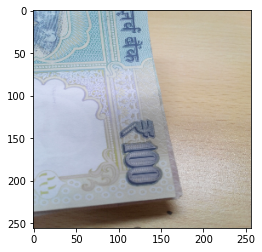

In [41]:
# Load an image file to test, resizing it to 256x256 pixels (as required by this model)
# to save time in training I resize images to 256x256 

import matplotlib.pyplot as plt
from tensorflow.python.keras.preprocessing import image

# example of test image 
img = image.load_img("/content/test/100_270.jpg", target_size=(256,256))
plt.imshow(img)

In [ ]:
pip install pydub

In [47]:
# import pydub (Manipulate audio with an simple and easy high level interface)
from pydub import AudioSegment
import IPython

def tts(class_label,class_likelihood):
    language='en'
    
    # if no currency detected or uploaded image is  bagkground
    if(class_label=="Background"):
        
        mytext=' sorry but i am detecting only  the'+class_label+', please hold the note under the camera.'
    else:
        mytext="This is  {} Rs note, and I am  {: .2f} % sure of it".format(class_label, class_likelihood*100)
        
    # gTTS() converts text into the audio supports multiple languages.    
    myobj = gTTS(text=mytext, lang=language, slow=False)
    
    #store audio result 
    file='result.mp3'
    myobj.save(file) 

#This will predict the all test images ..

In [49]:
import glob
# Find all *.jpg files in the directory
file_name_list = glob.glob('/content/test/*.jpg')
print(len(file_name_list))
for file_name in file_name_list:
    # print the file name 
    print(file_name)
    
    #predict the currency 
    prediction(file_name)

91
/content/test/100_3.jpg
/content/test/100_3.jpg
This is image is a 100 - Likelihood:  0.98
/content/test/100__437.jpg
/content/test/100__437.jpg
This is image is a 100 - Likelihood:  0.82
/content/test/500__374.jpg
/content/test/500__374.jpg
This is image is a 500 - Likelihood:  1.00
/content/test/50__274.jpg
/content/test/50__274.jpg
This is image is a 50 - Likelihood:  0.76
/content/test/10__443.jpg
/content/test/10__443.jpg
This is image is a 10 - Likelihood:  0.99
/content/test/500__37.jpg
/content/test/500__37.jpg
This is image is a 500 - Likelihood:  0.99
/content/test/200.__206.jpg
/content/test/200.__206.jpg
This is image is a 200 - Likelihood:  0.57
/content/test/20__295.jpg
/content/test/20__295.jpg
This is image is a 20 - Likelihood:  0.94
/content/test/100__386.jpg
/content/test/100__386.jpg
This is image is a 100 - Likelihood:  0.89
/content/test/200.__338.jpg
/content/test/200.__338.jpg
This is image is a 200 - Likelihood:  1.00
/content/test/200.__254.jpg
/content/tes

#Predict and display currency notes

/content/test/200.__170.jpg
This is image is a 200 - Likelihood:  0.99


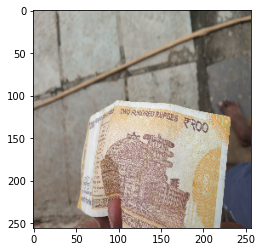

In [58]:
#predict the single image file
file_to_predict="/content/test/200.__170.jpg"

# display currency image 
img = image.load_img(file_to_predict, target_size=(256,256))
plt.imshow(img)

#predict the currecy 

prediction(file_to_predict)

#Predict the value of currency in voice form

In [59]:
path='./result.mp3' 
    
IPython.display.Audio(path)